# Individual fl_latency vs contrast

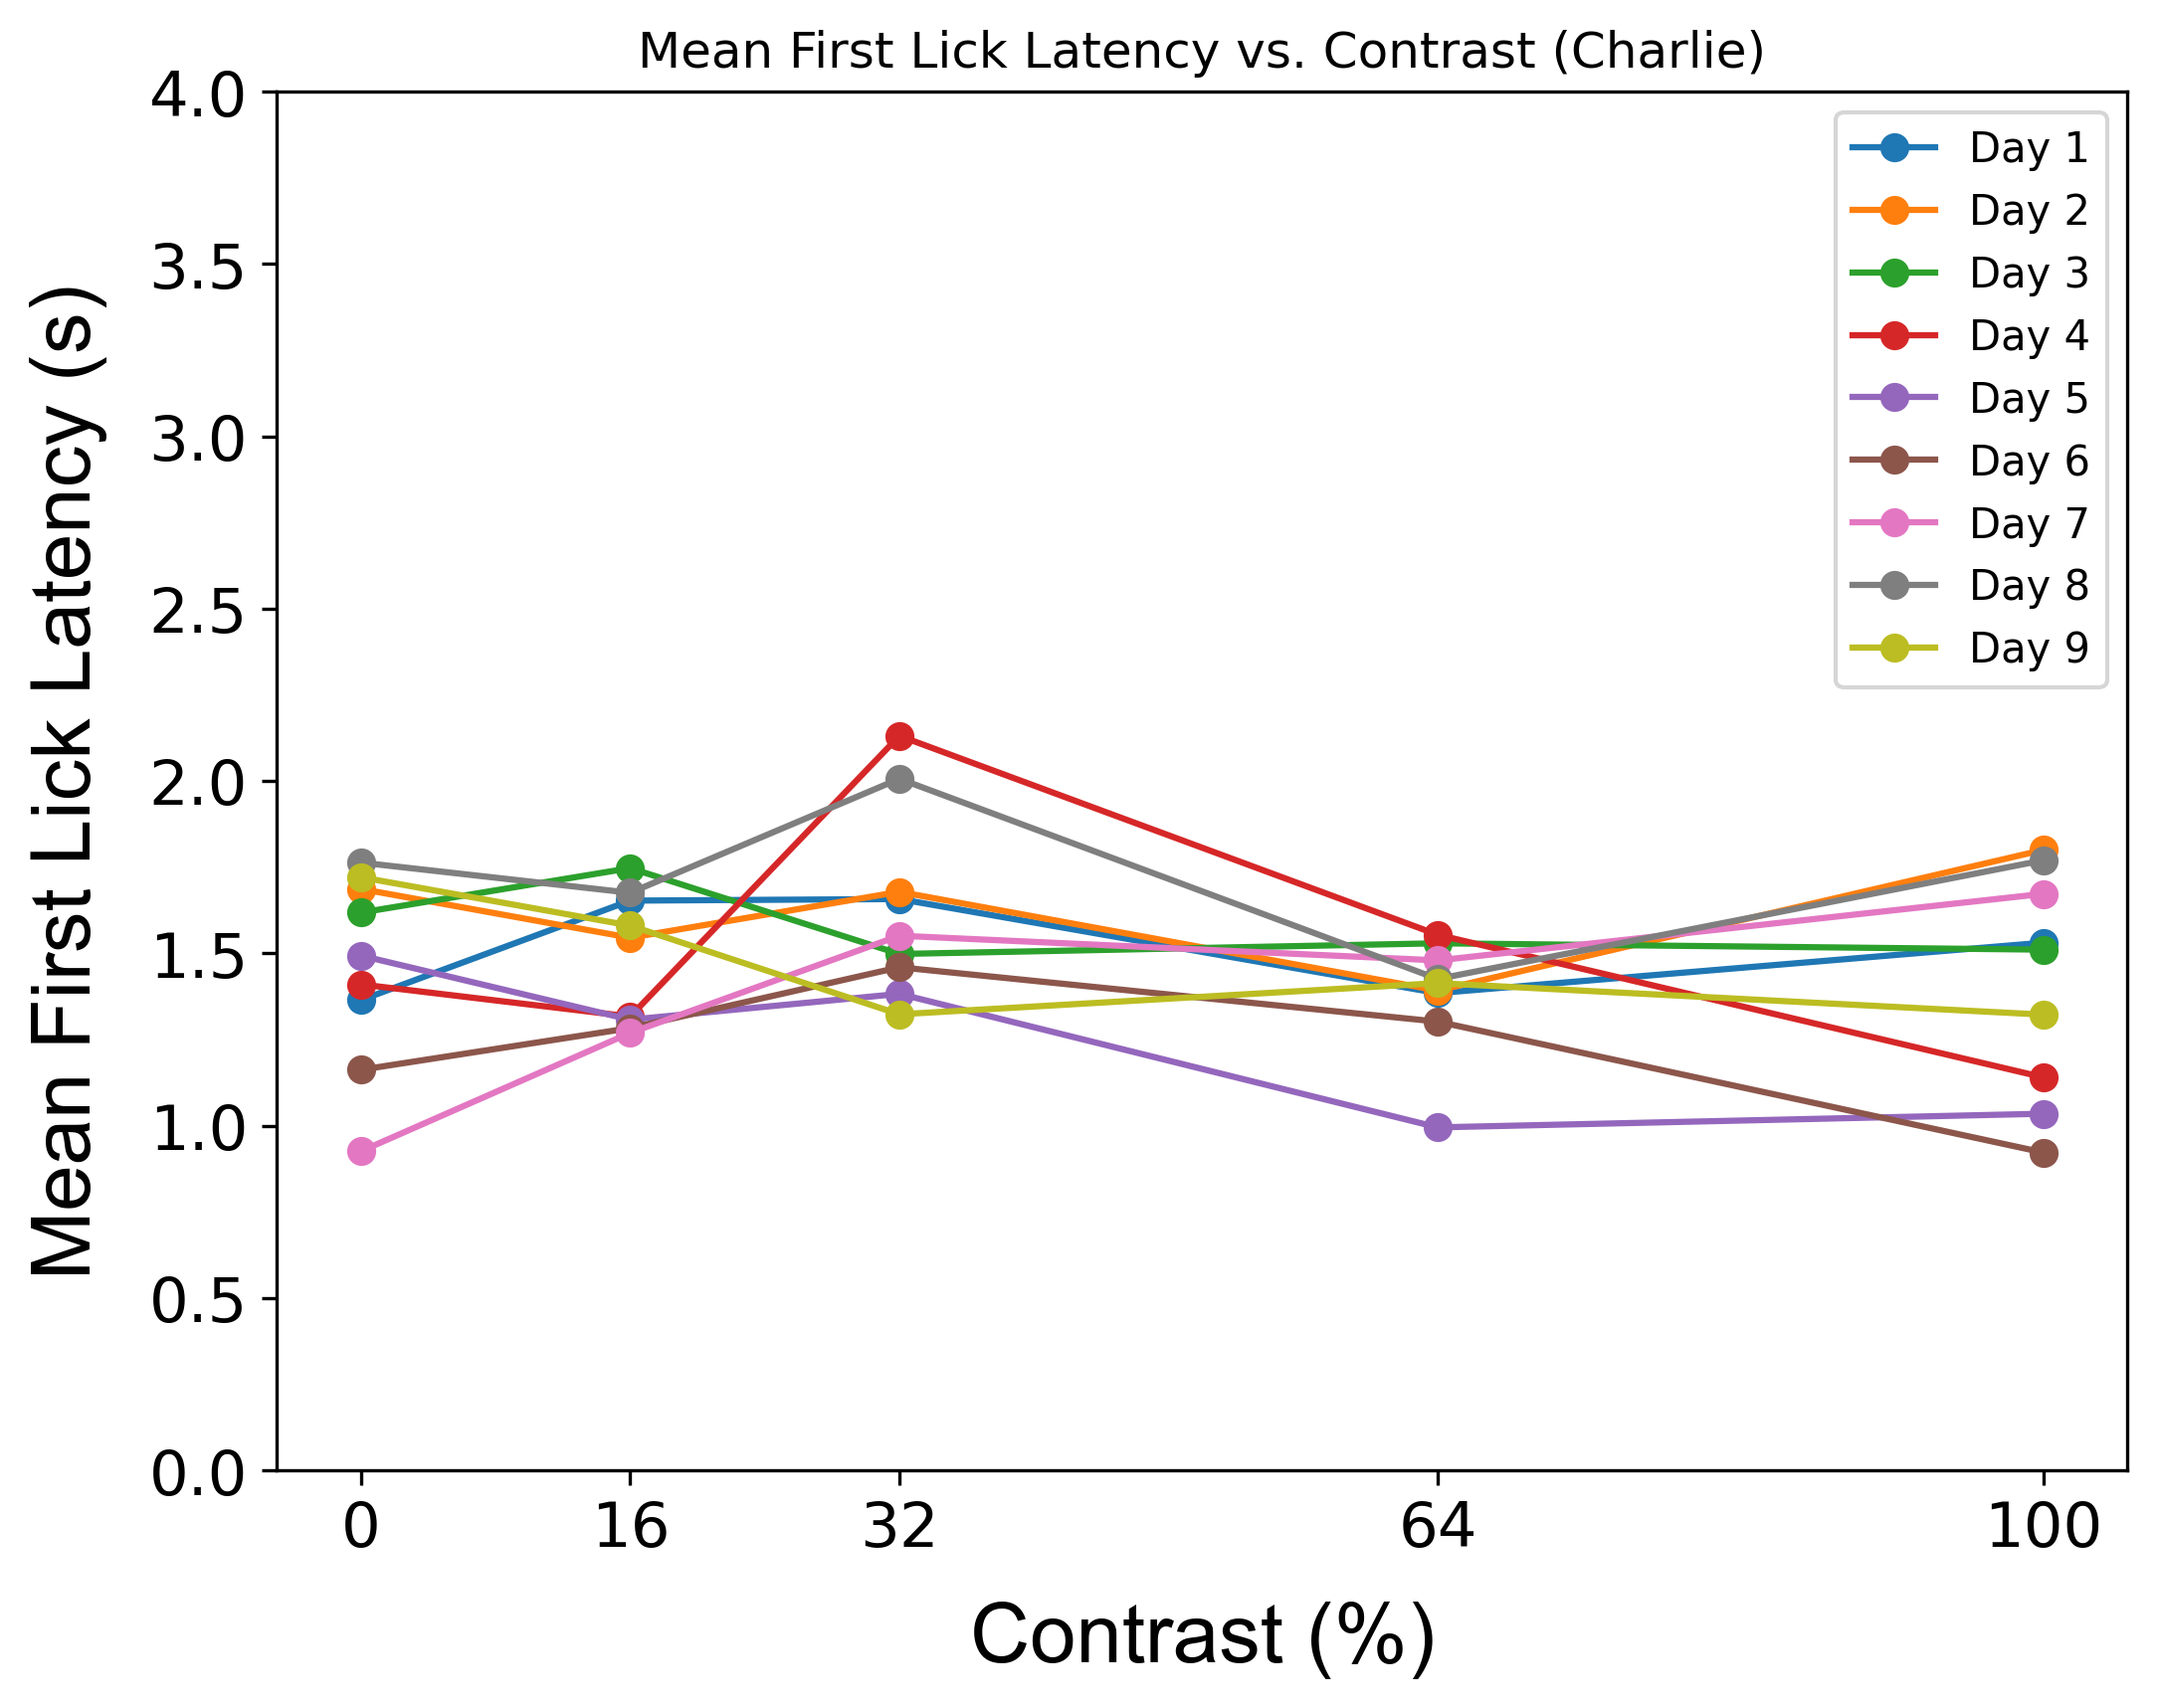

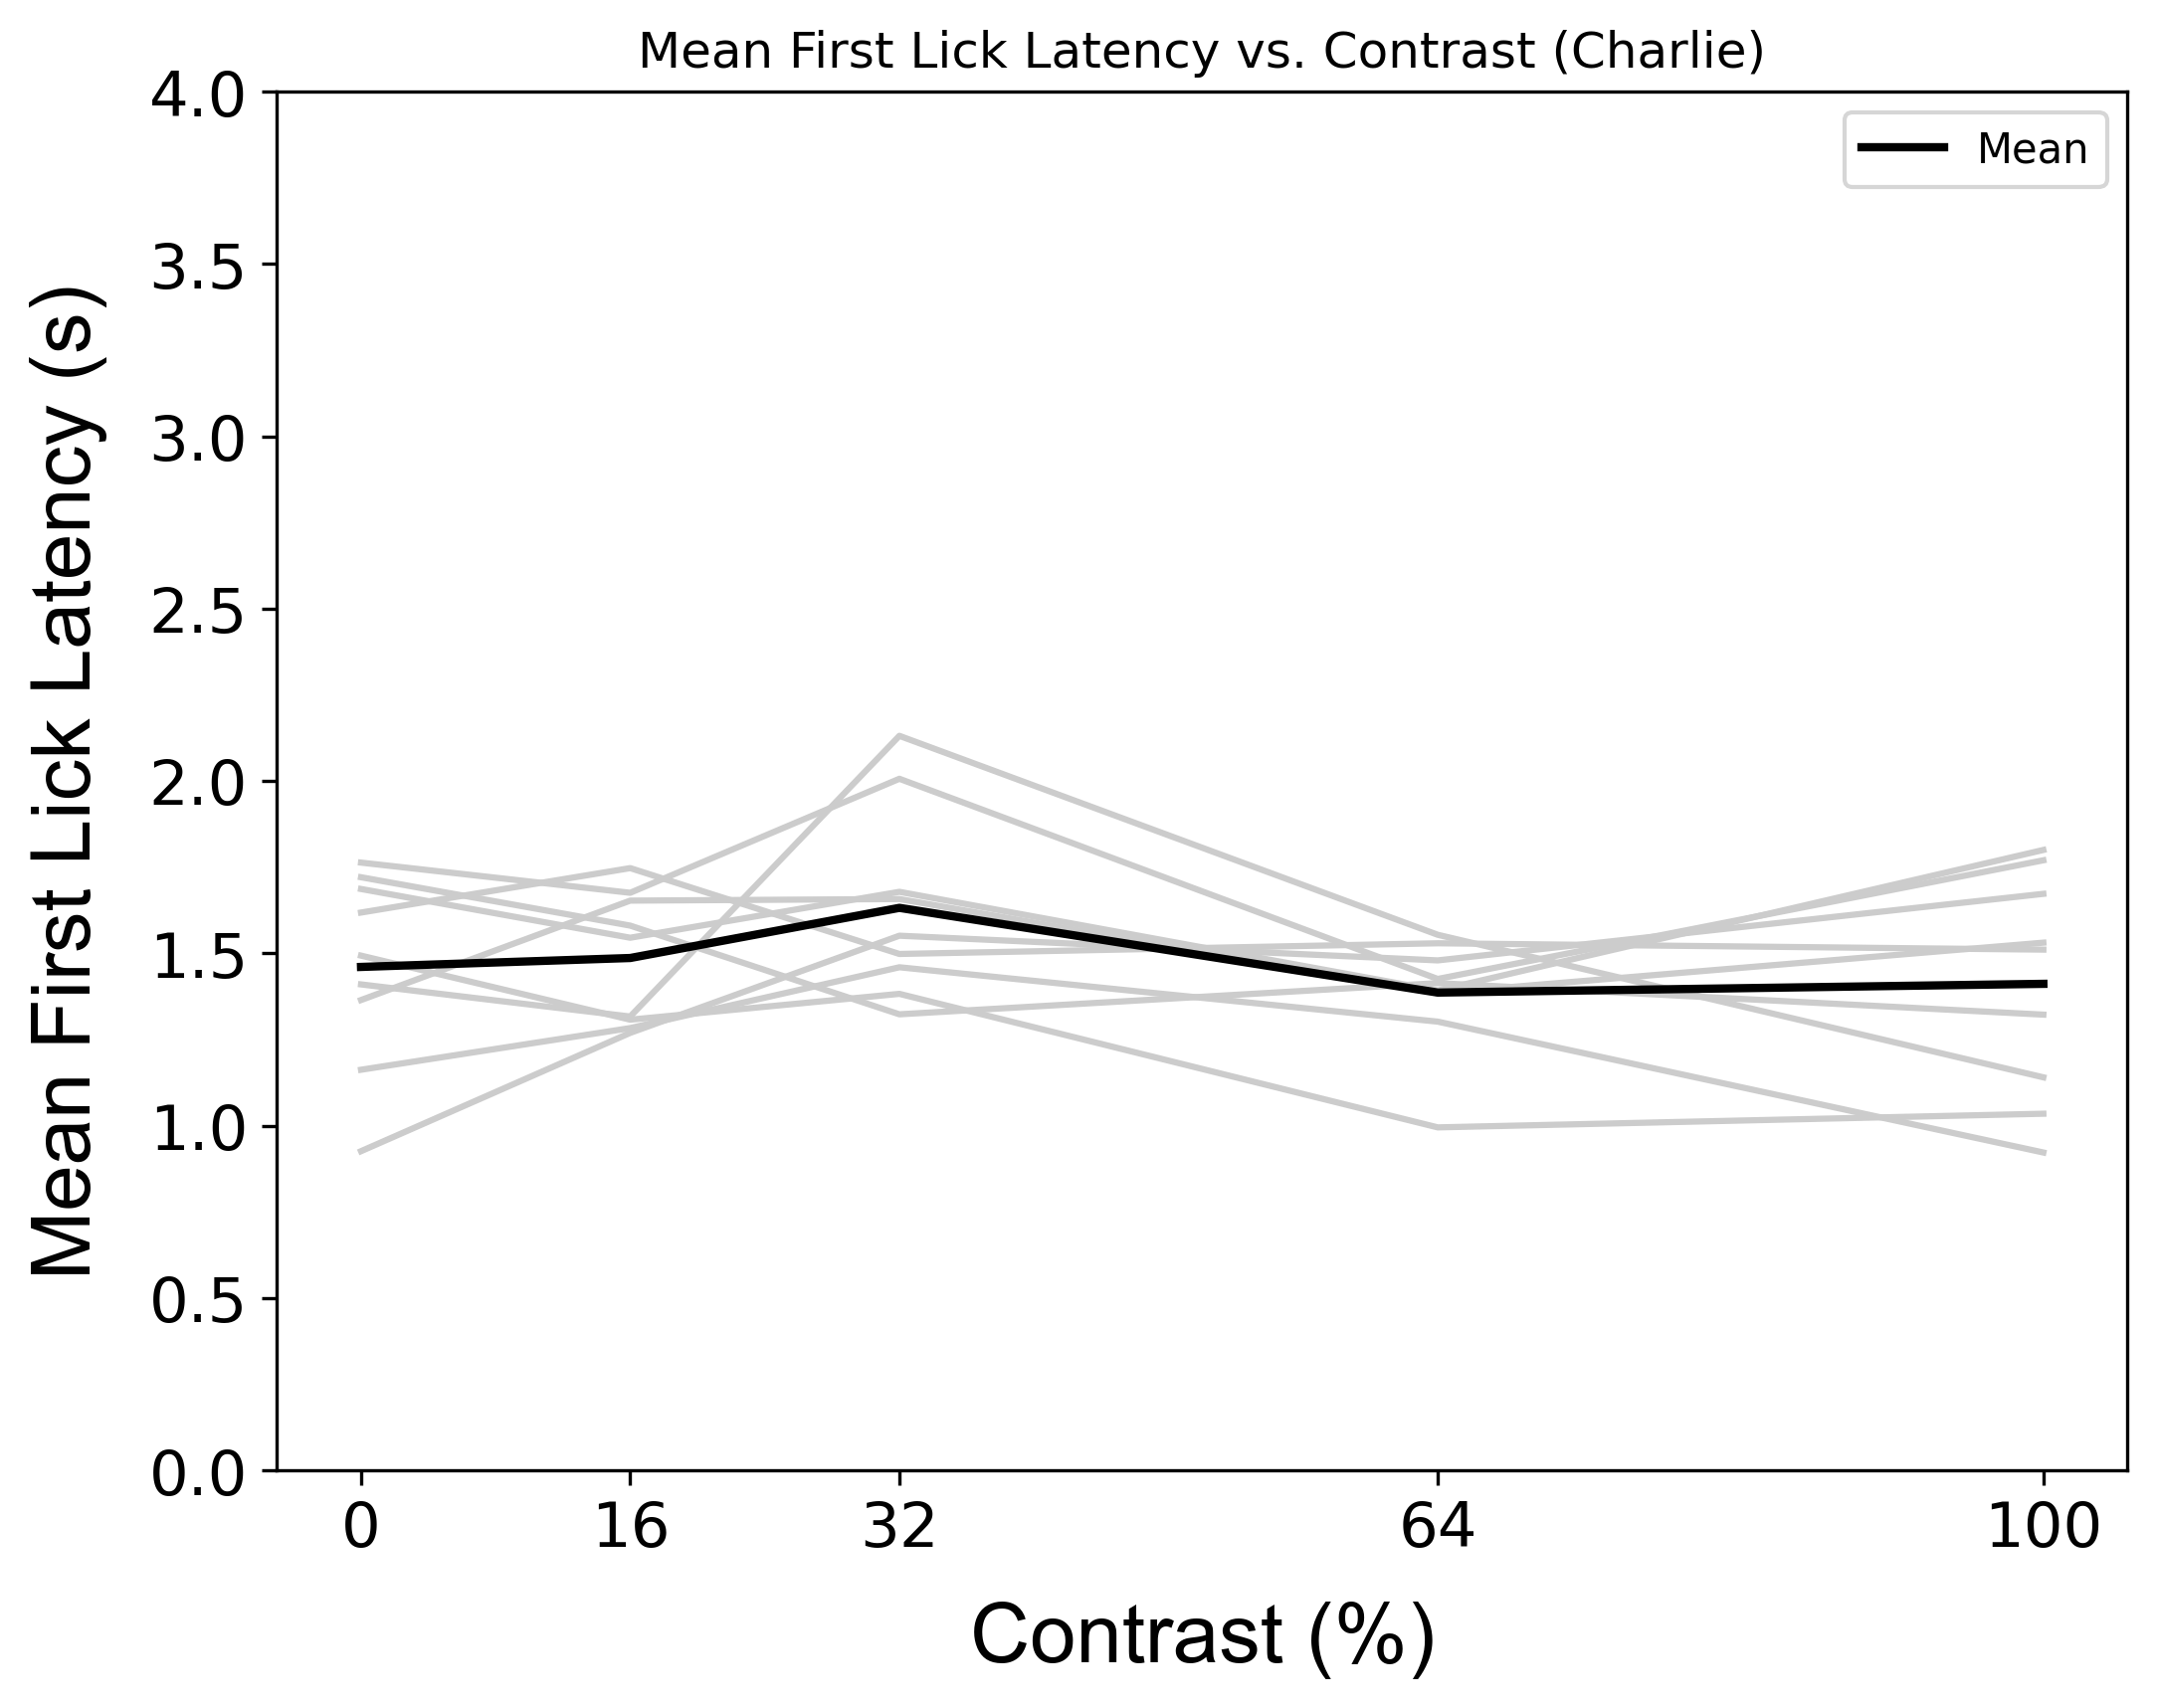

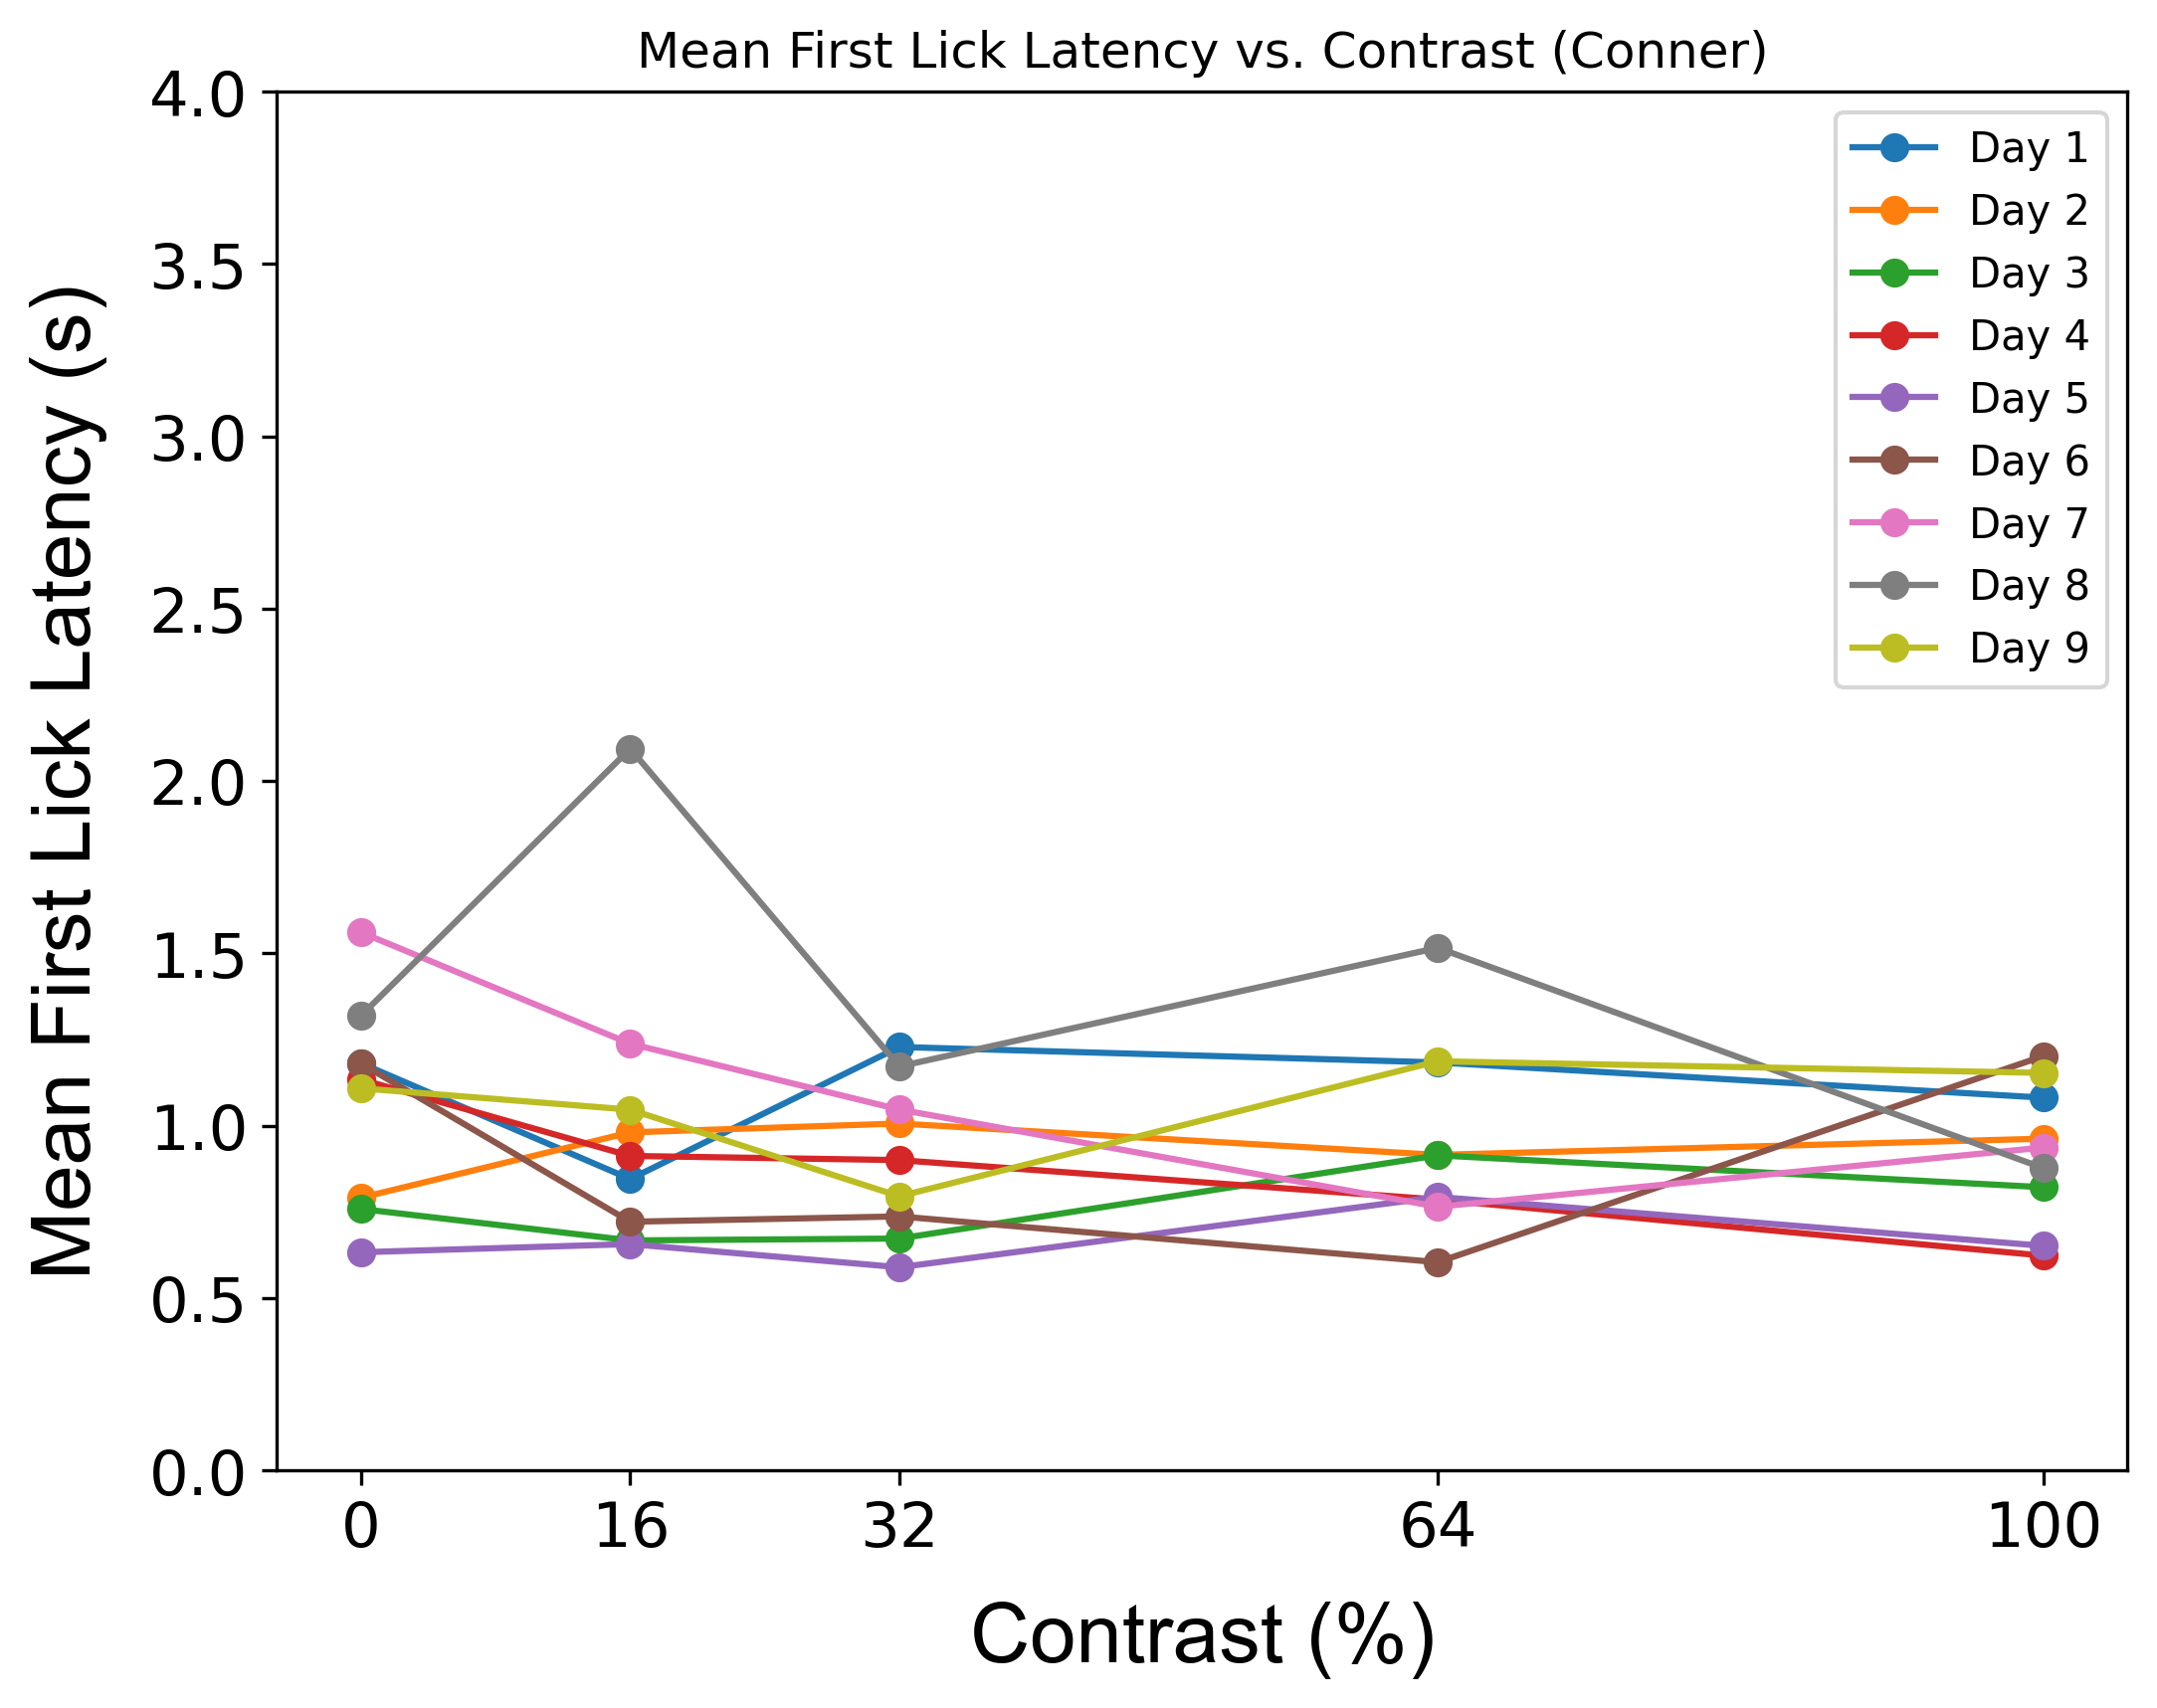

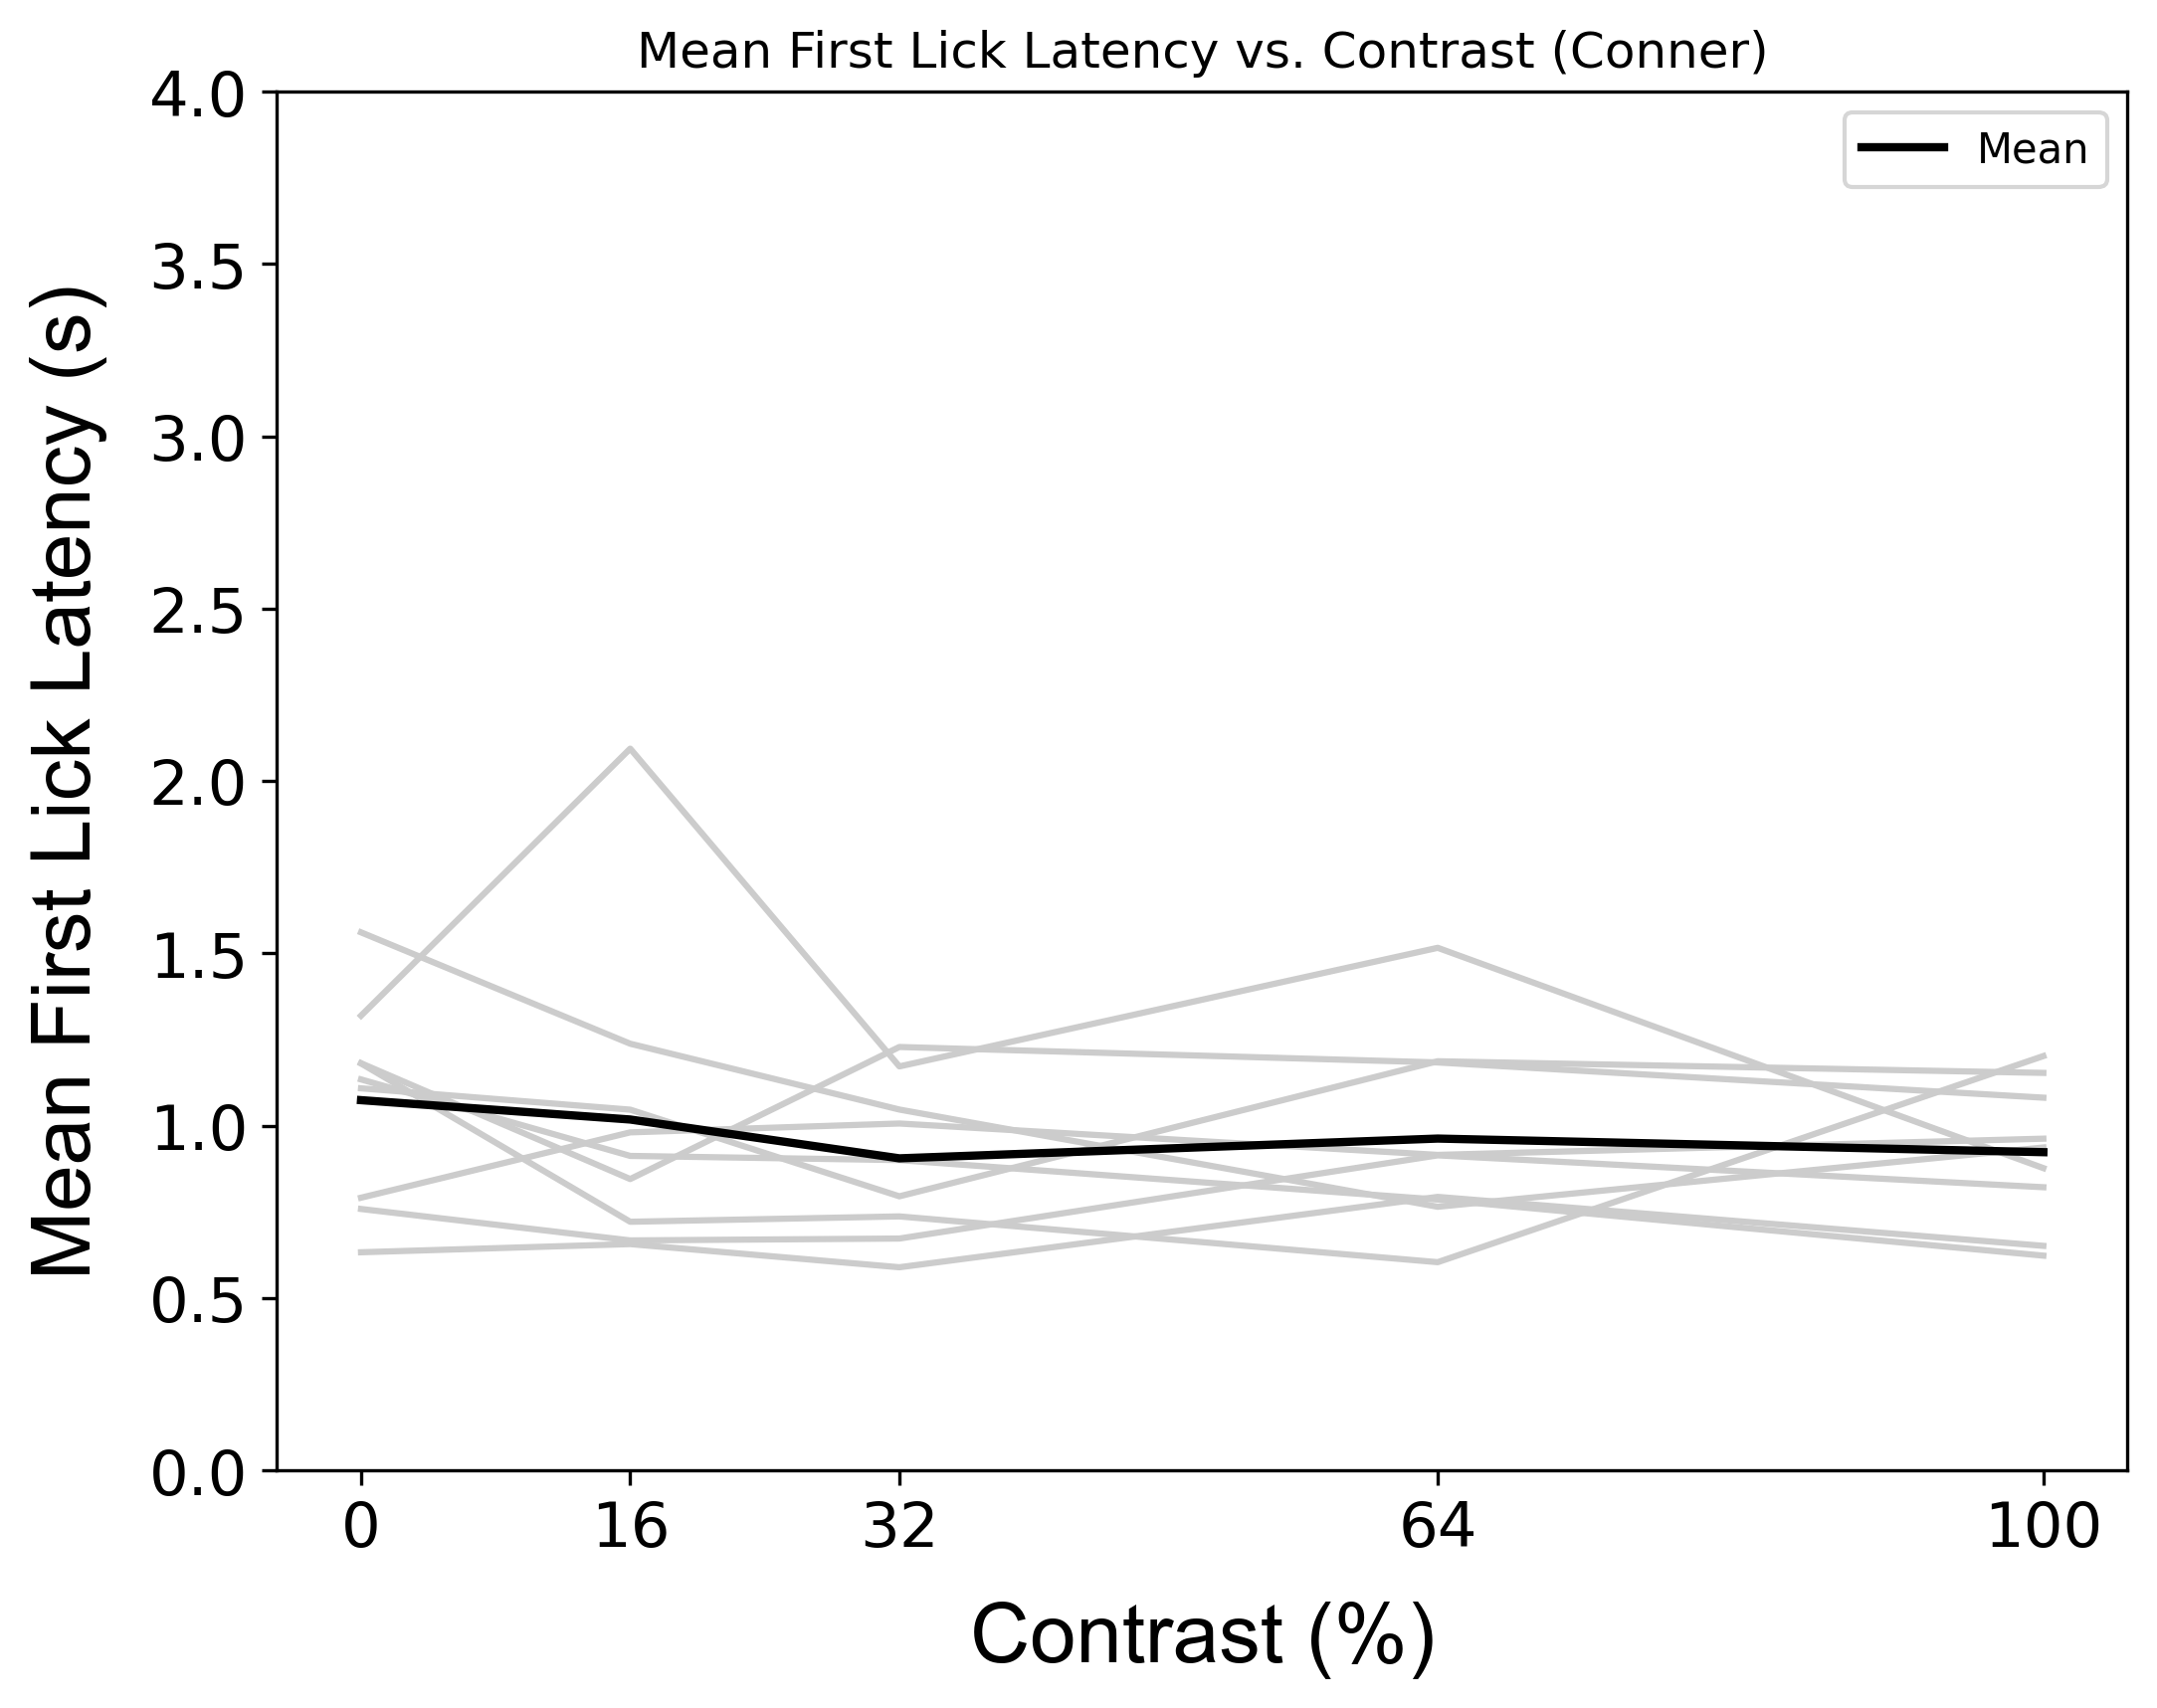

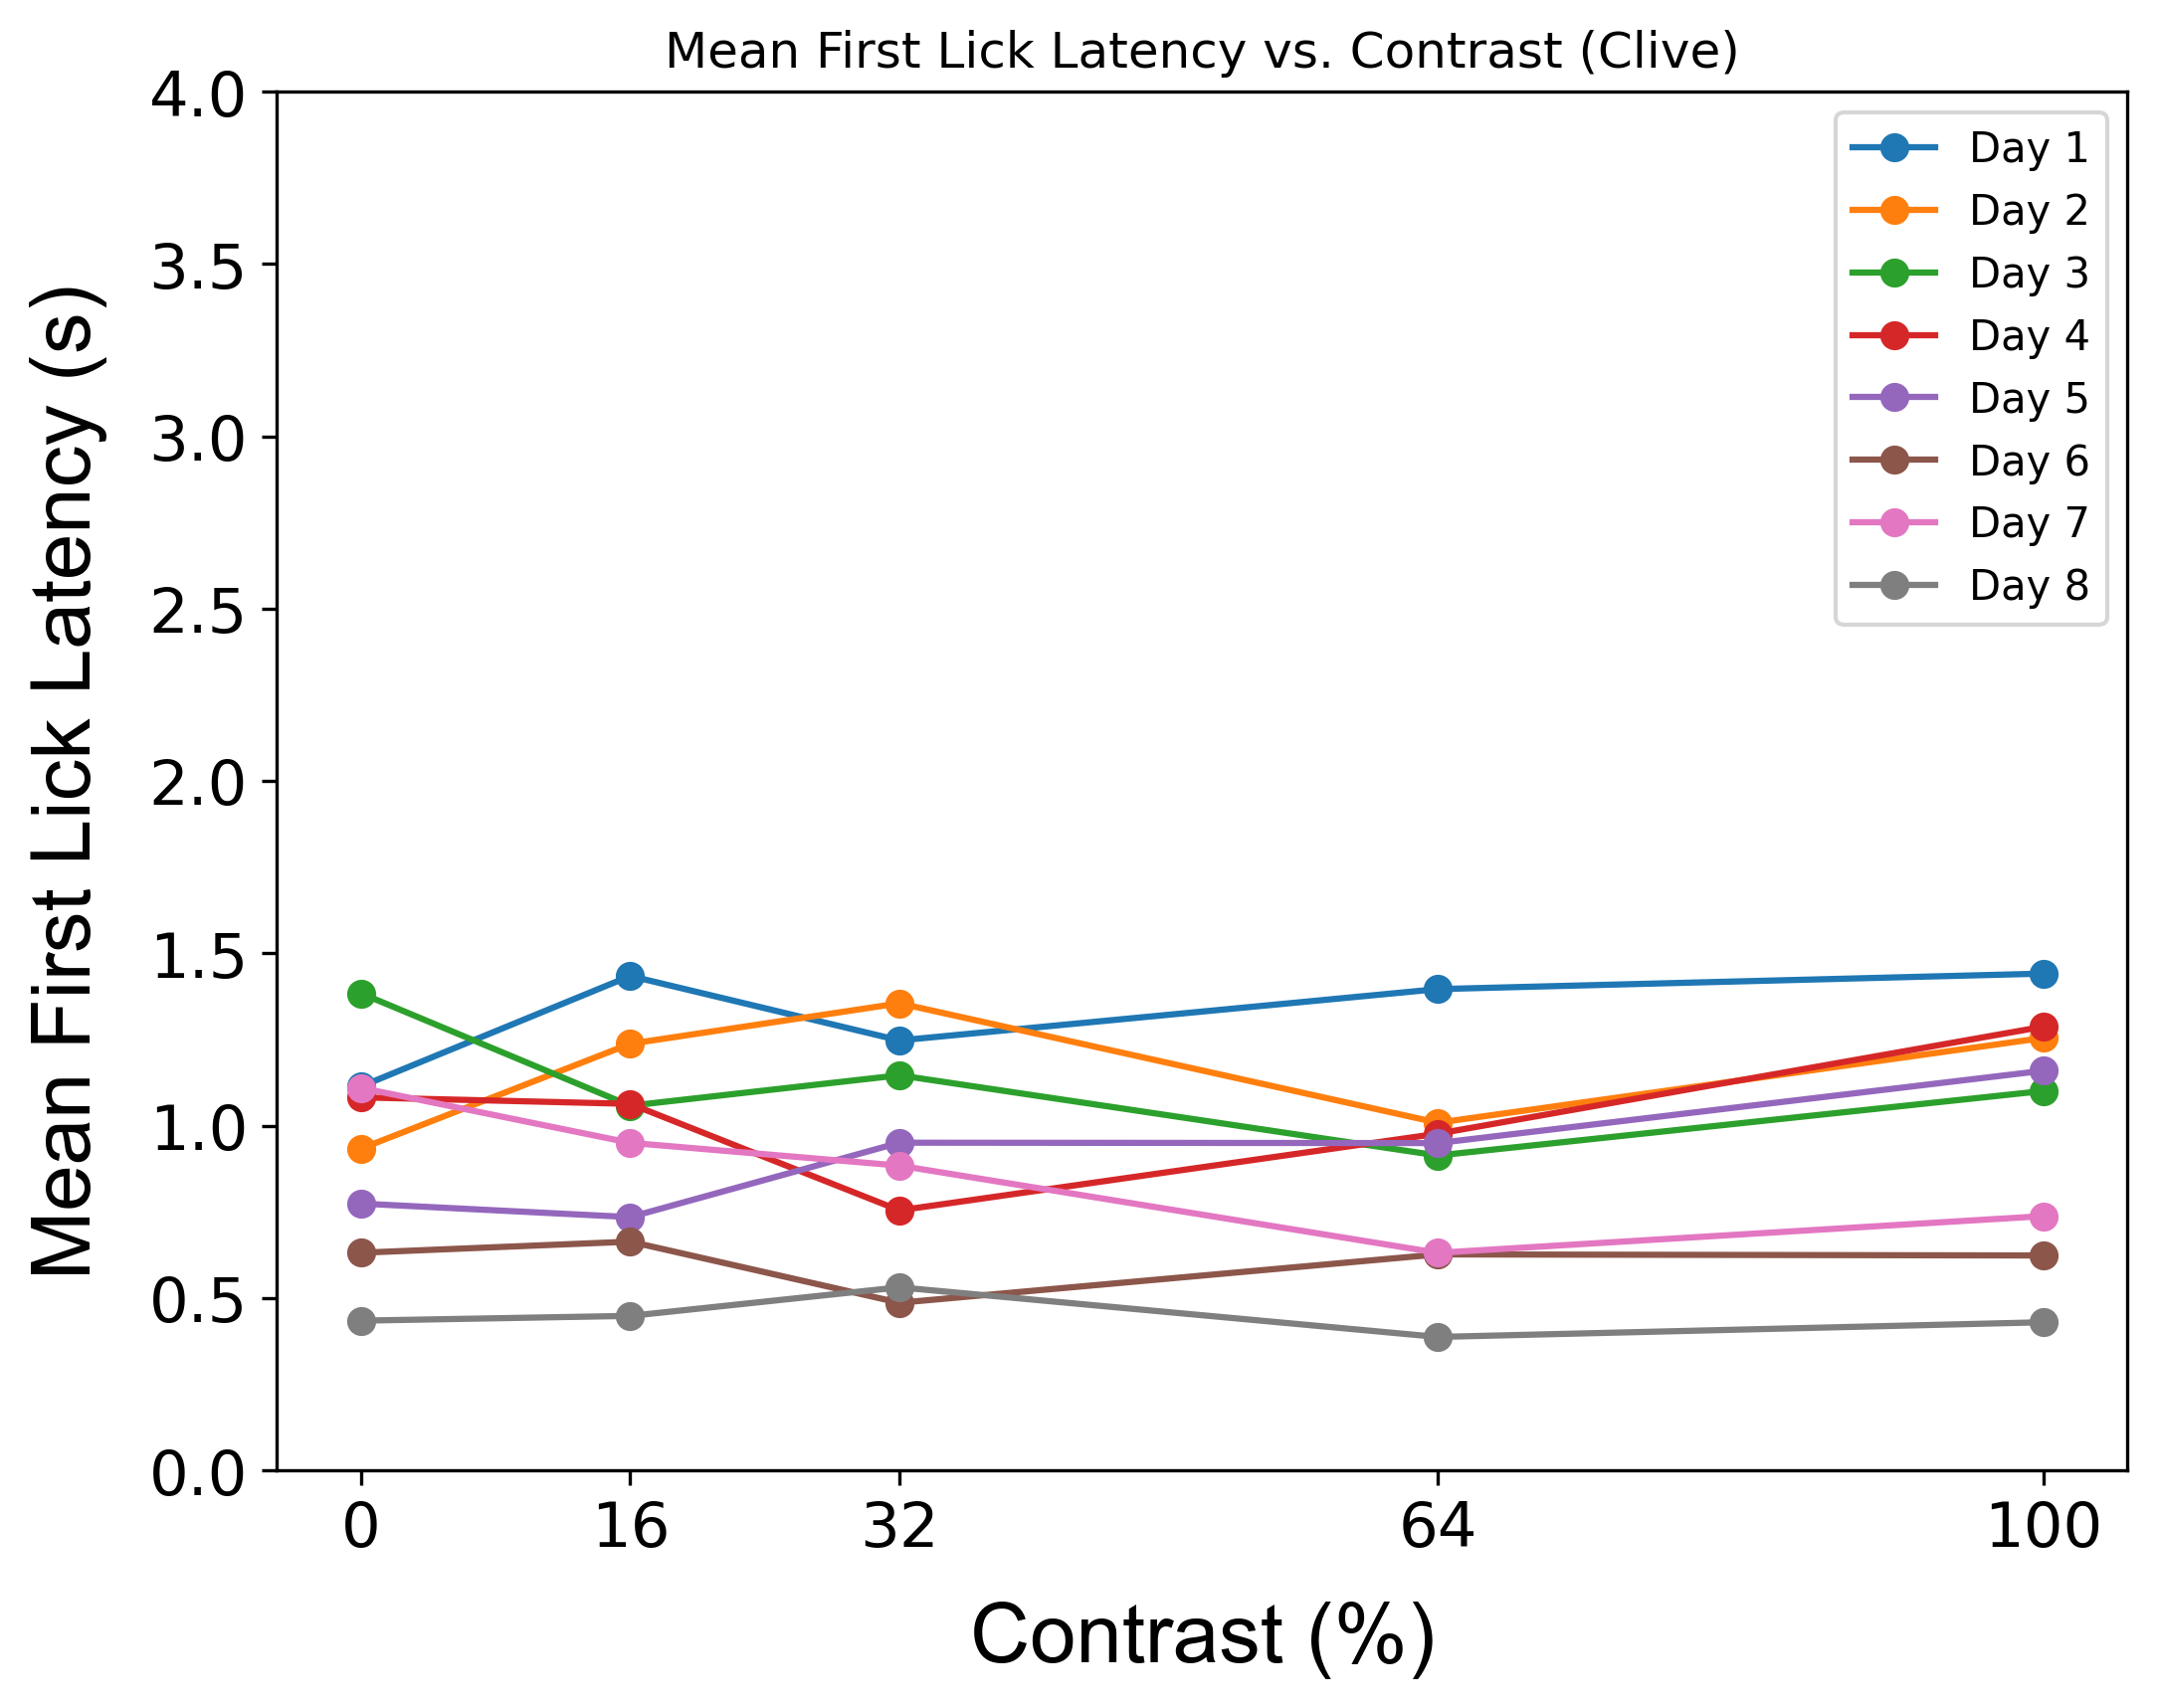

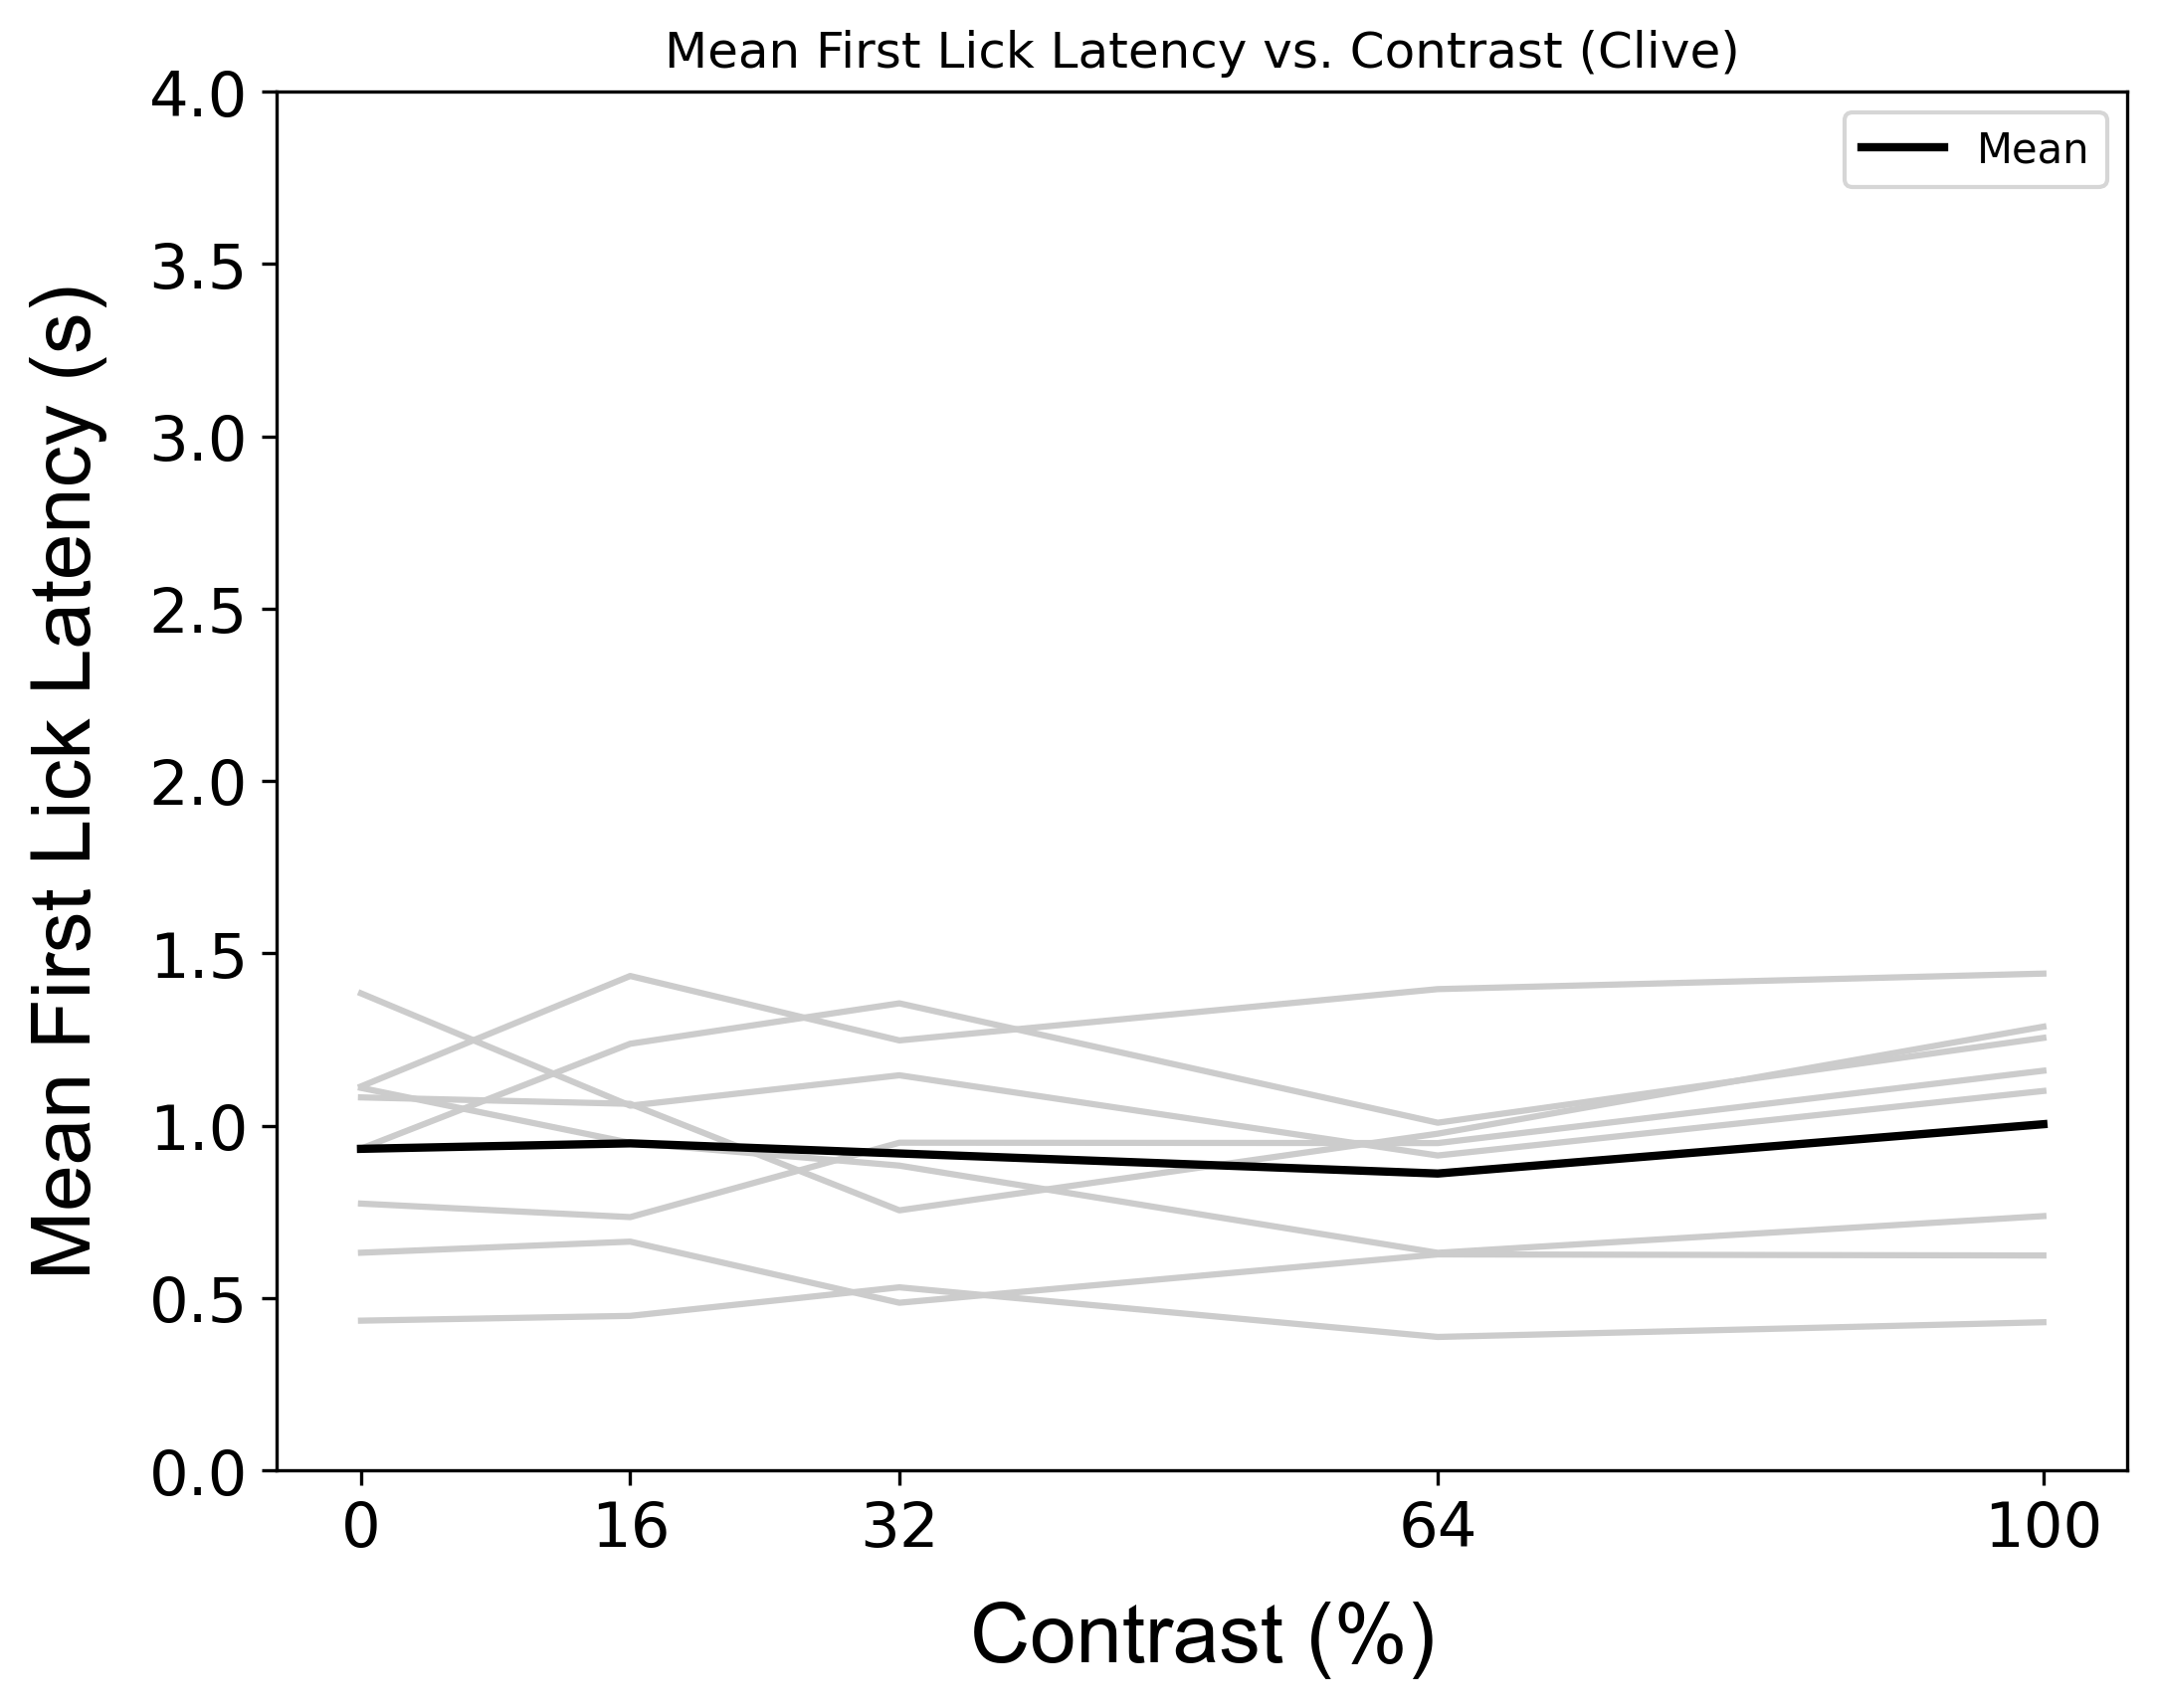

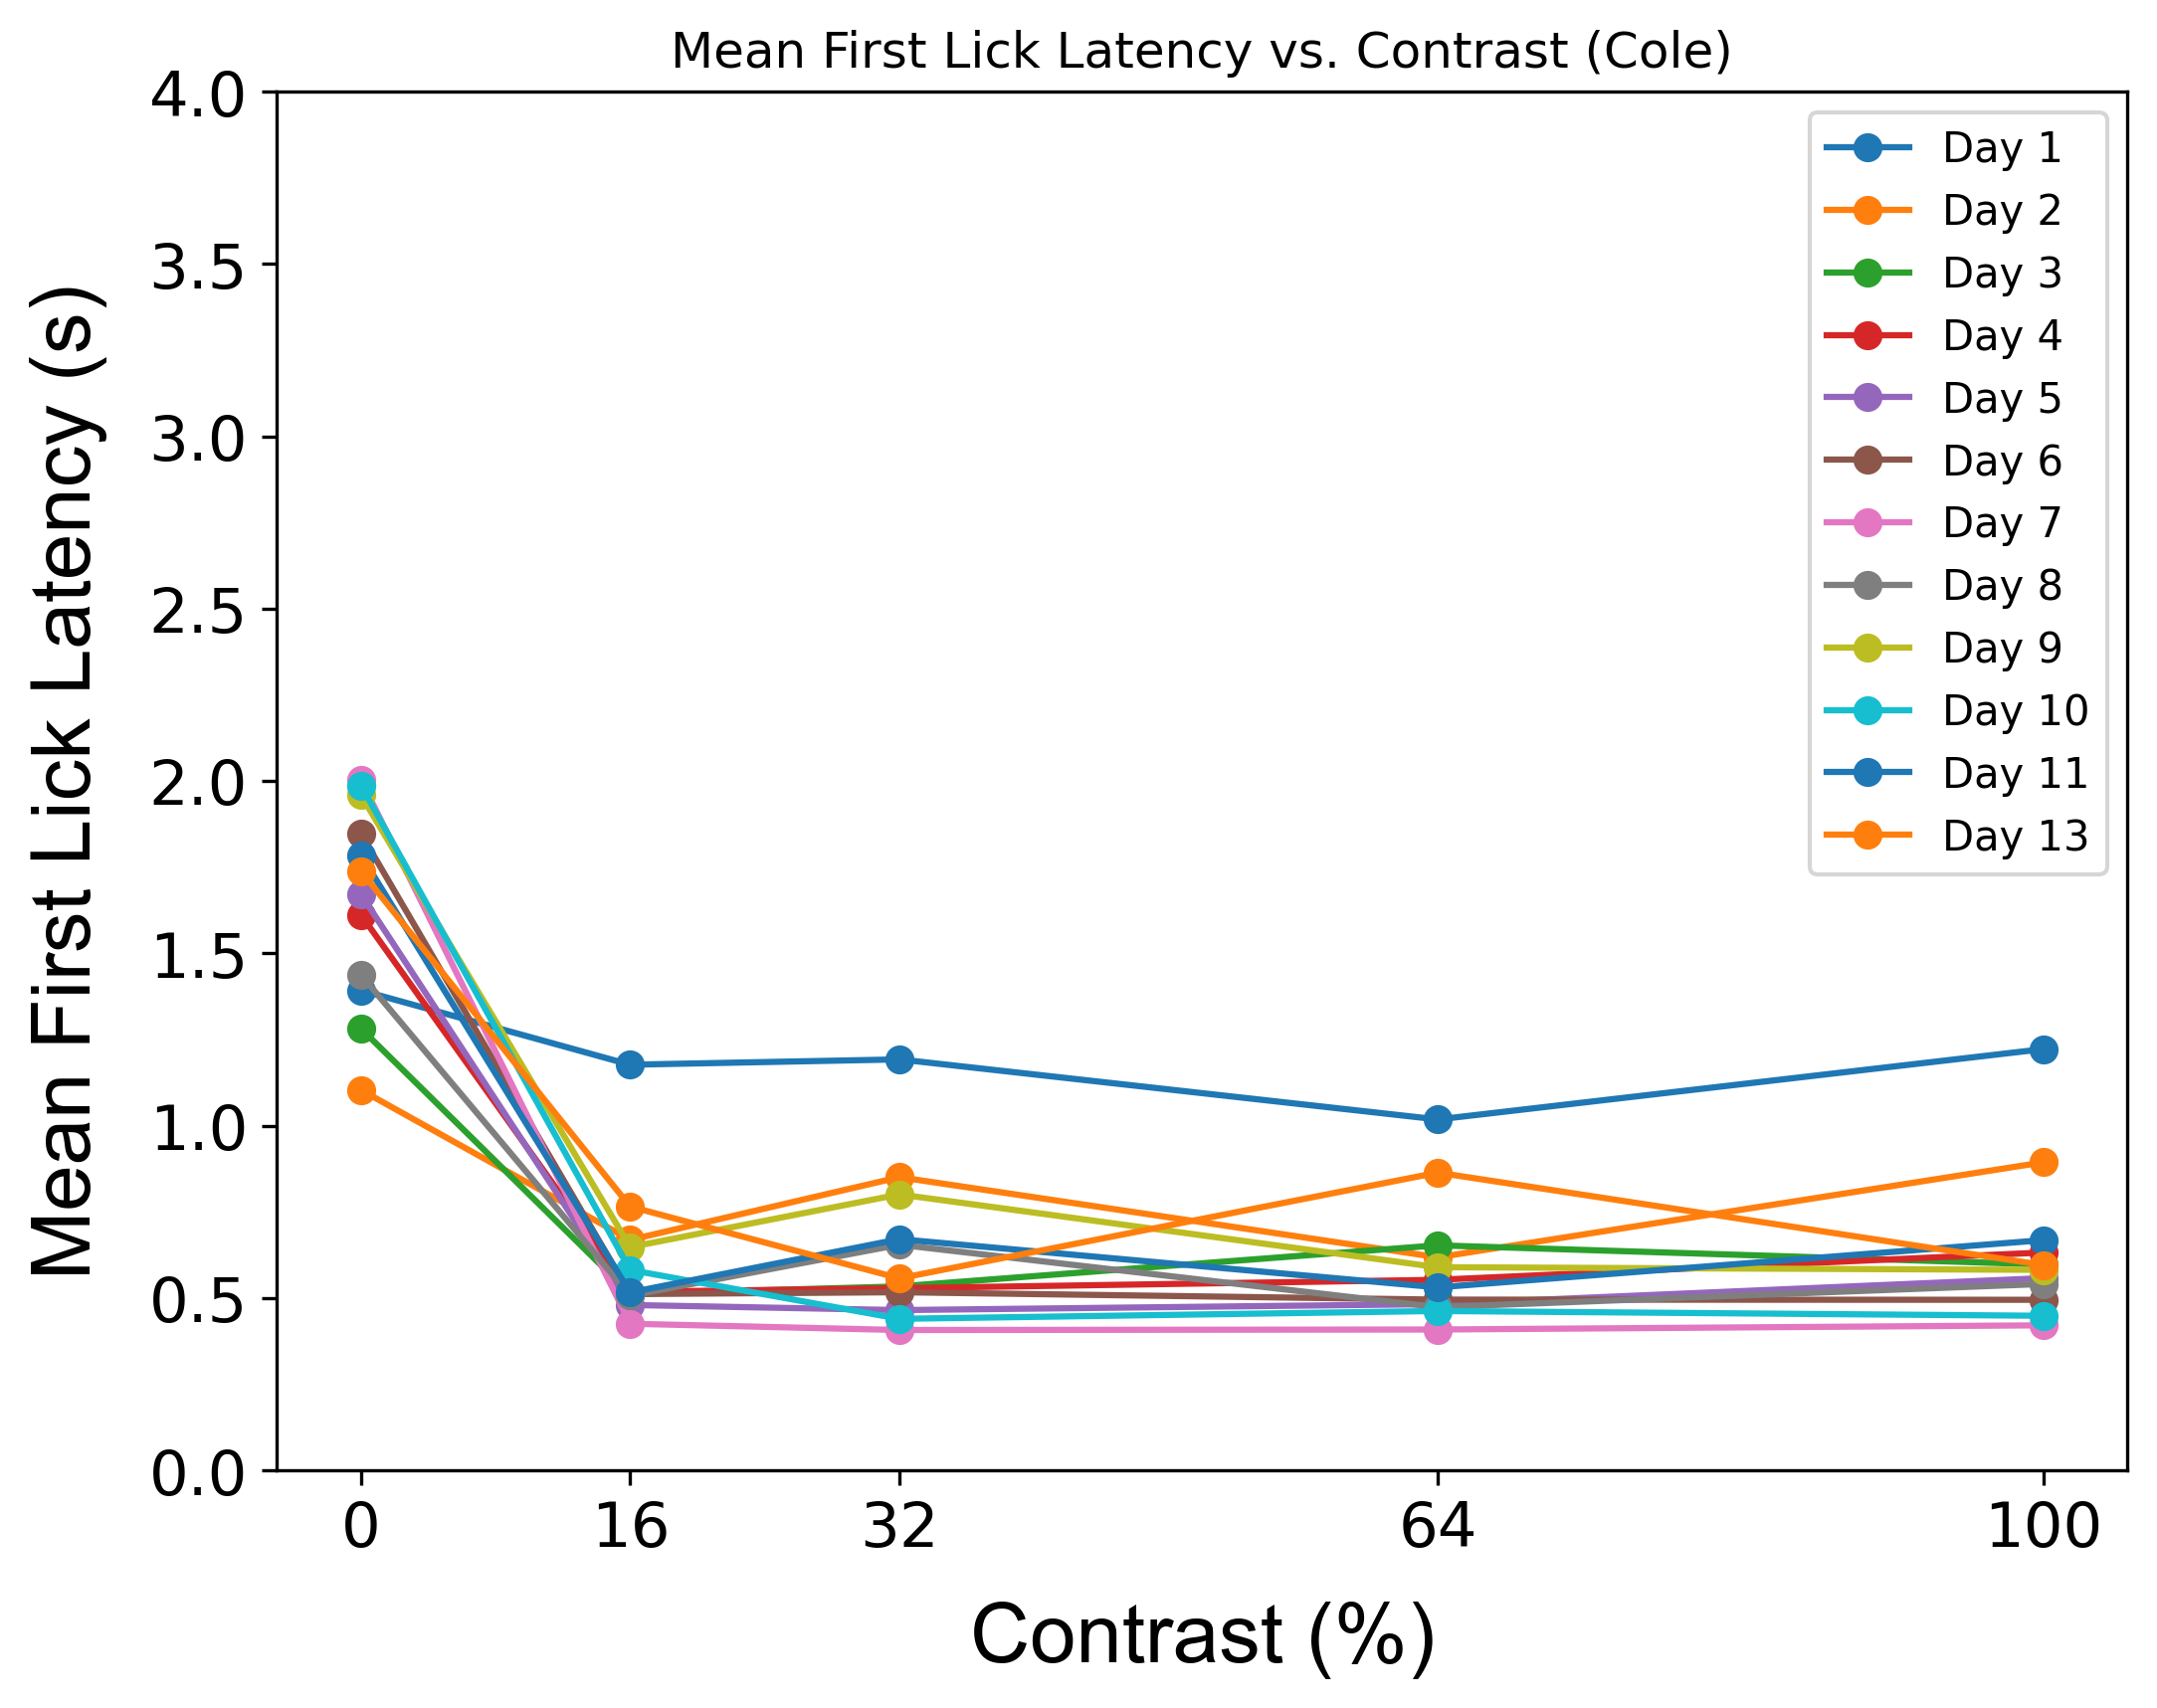

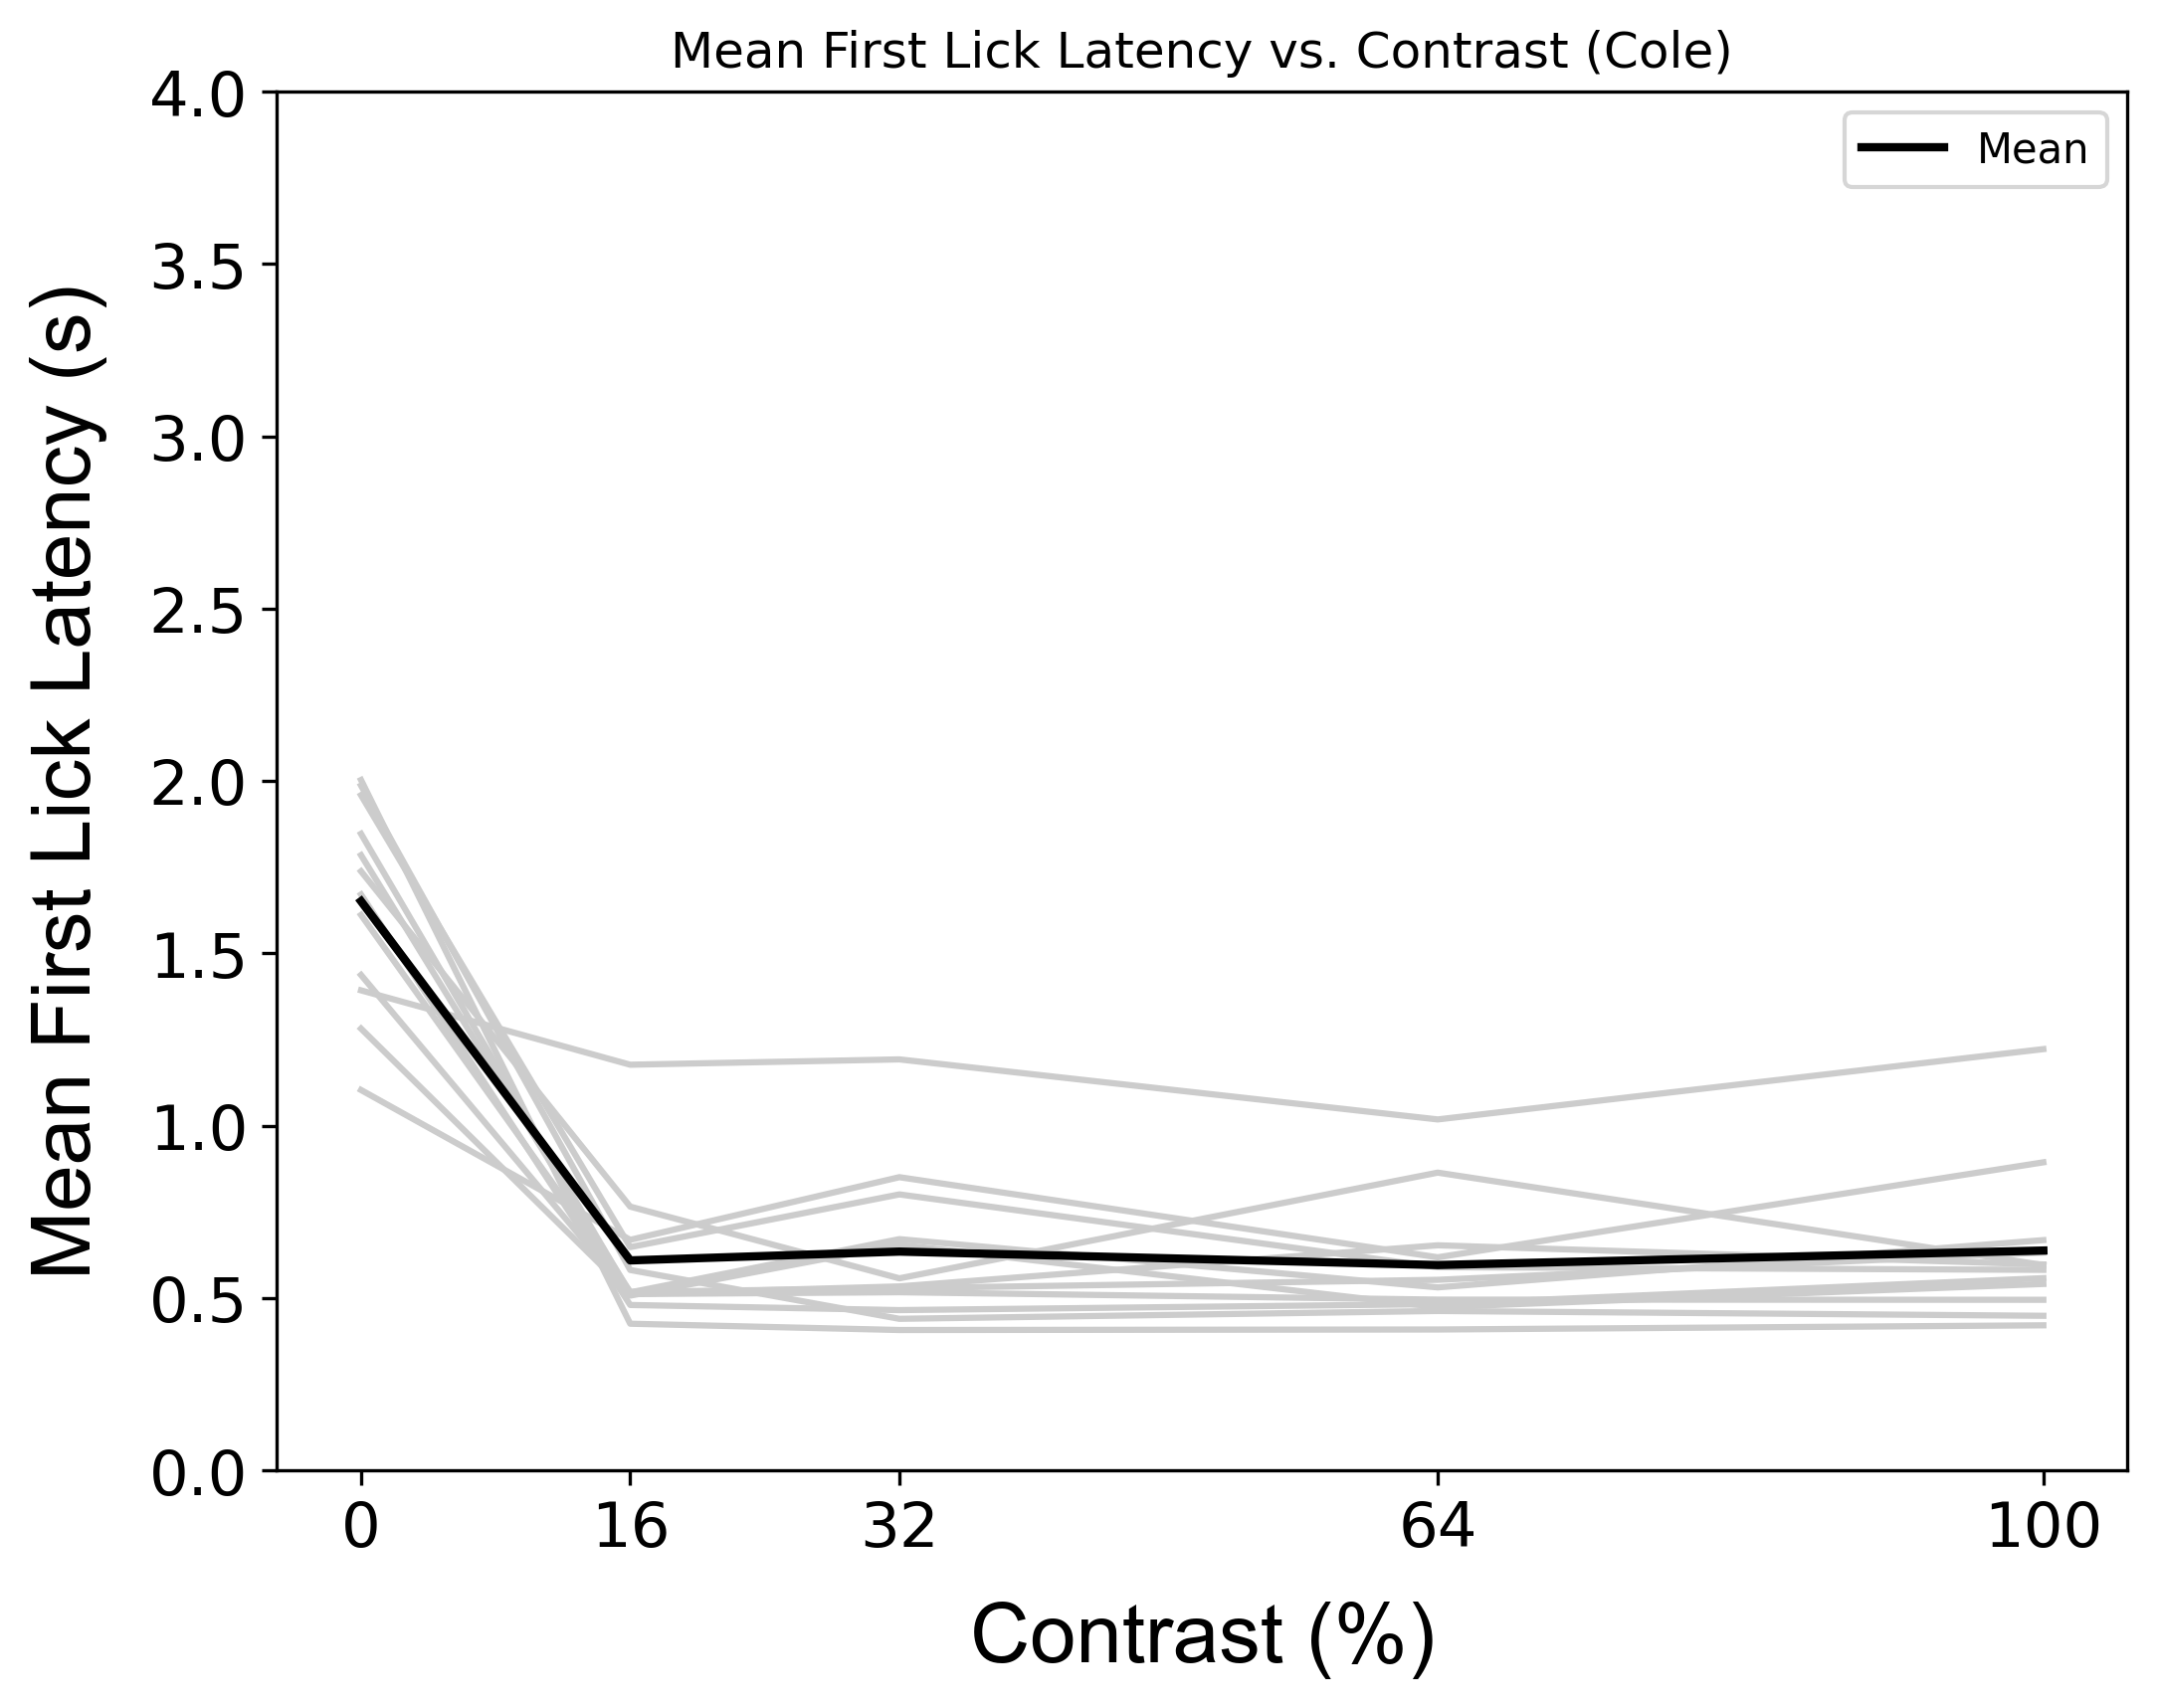

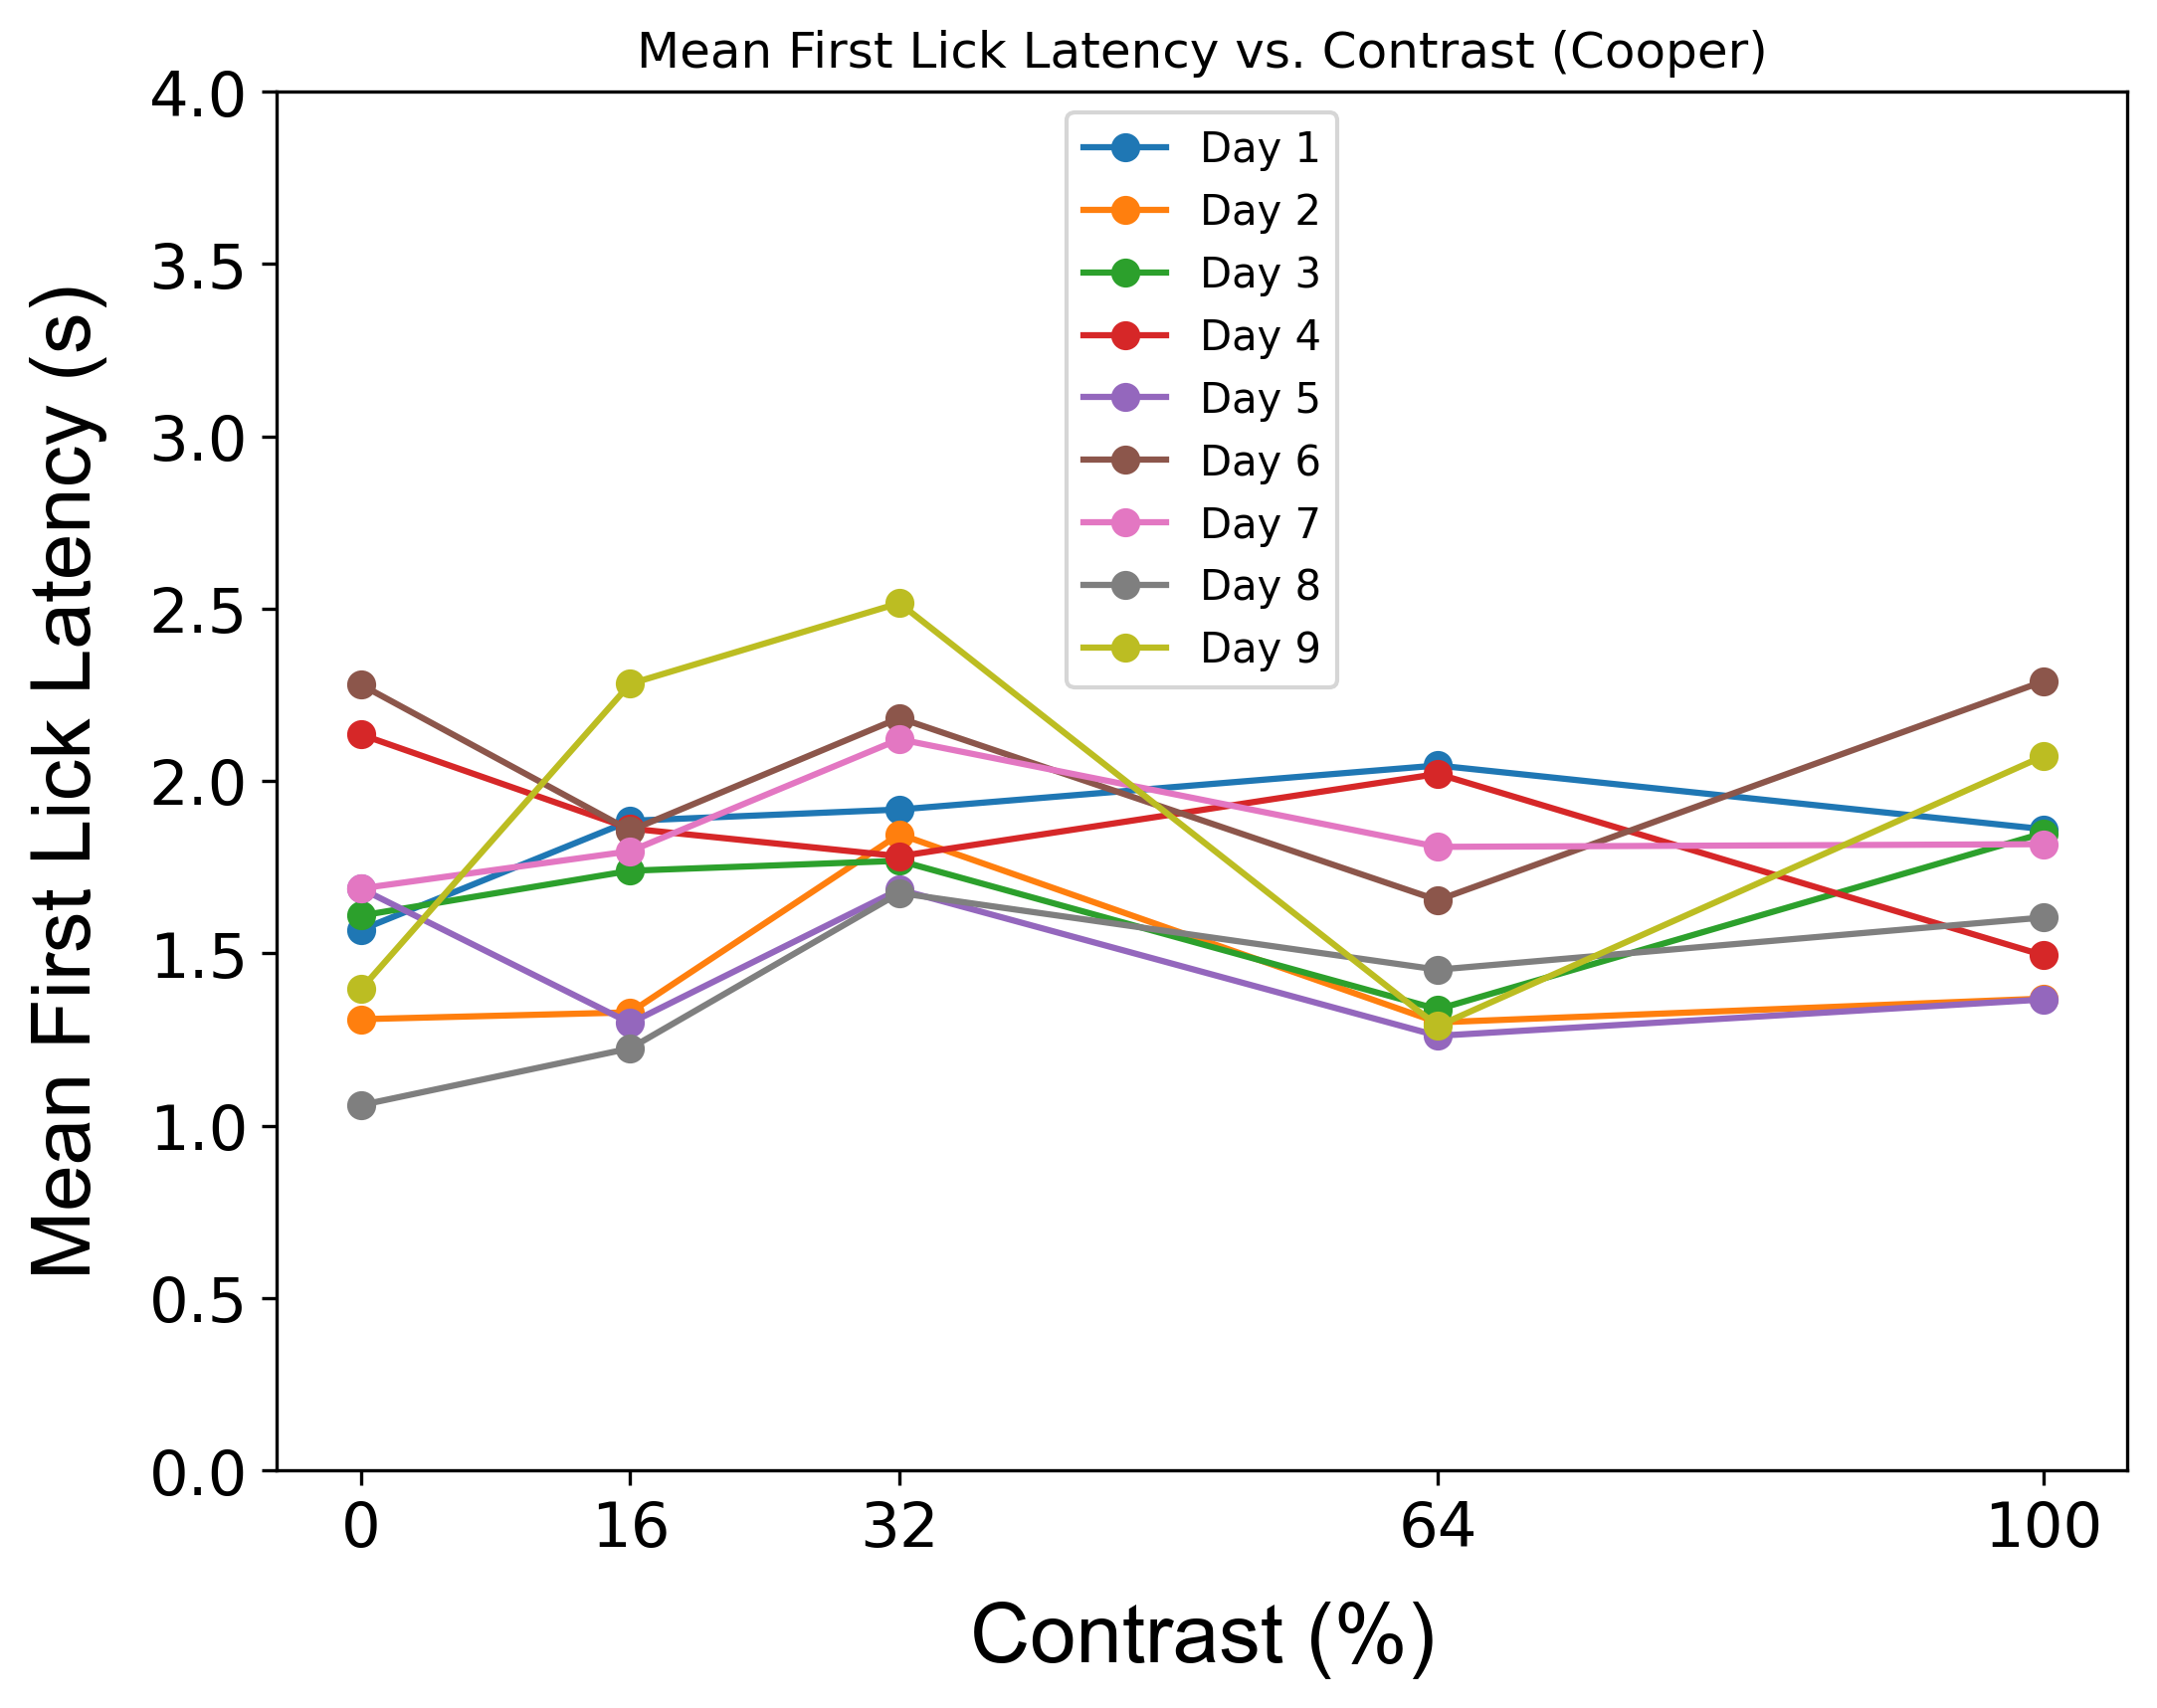

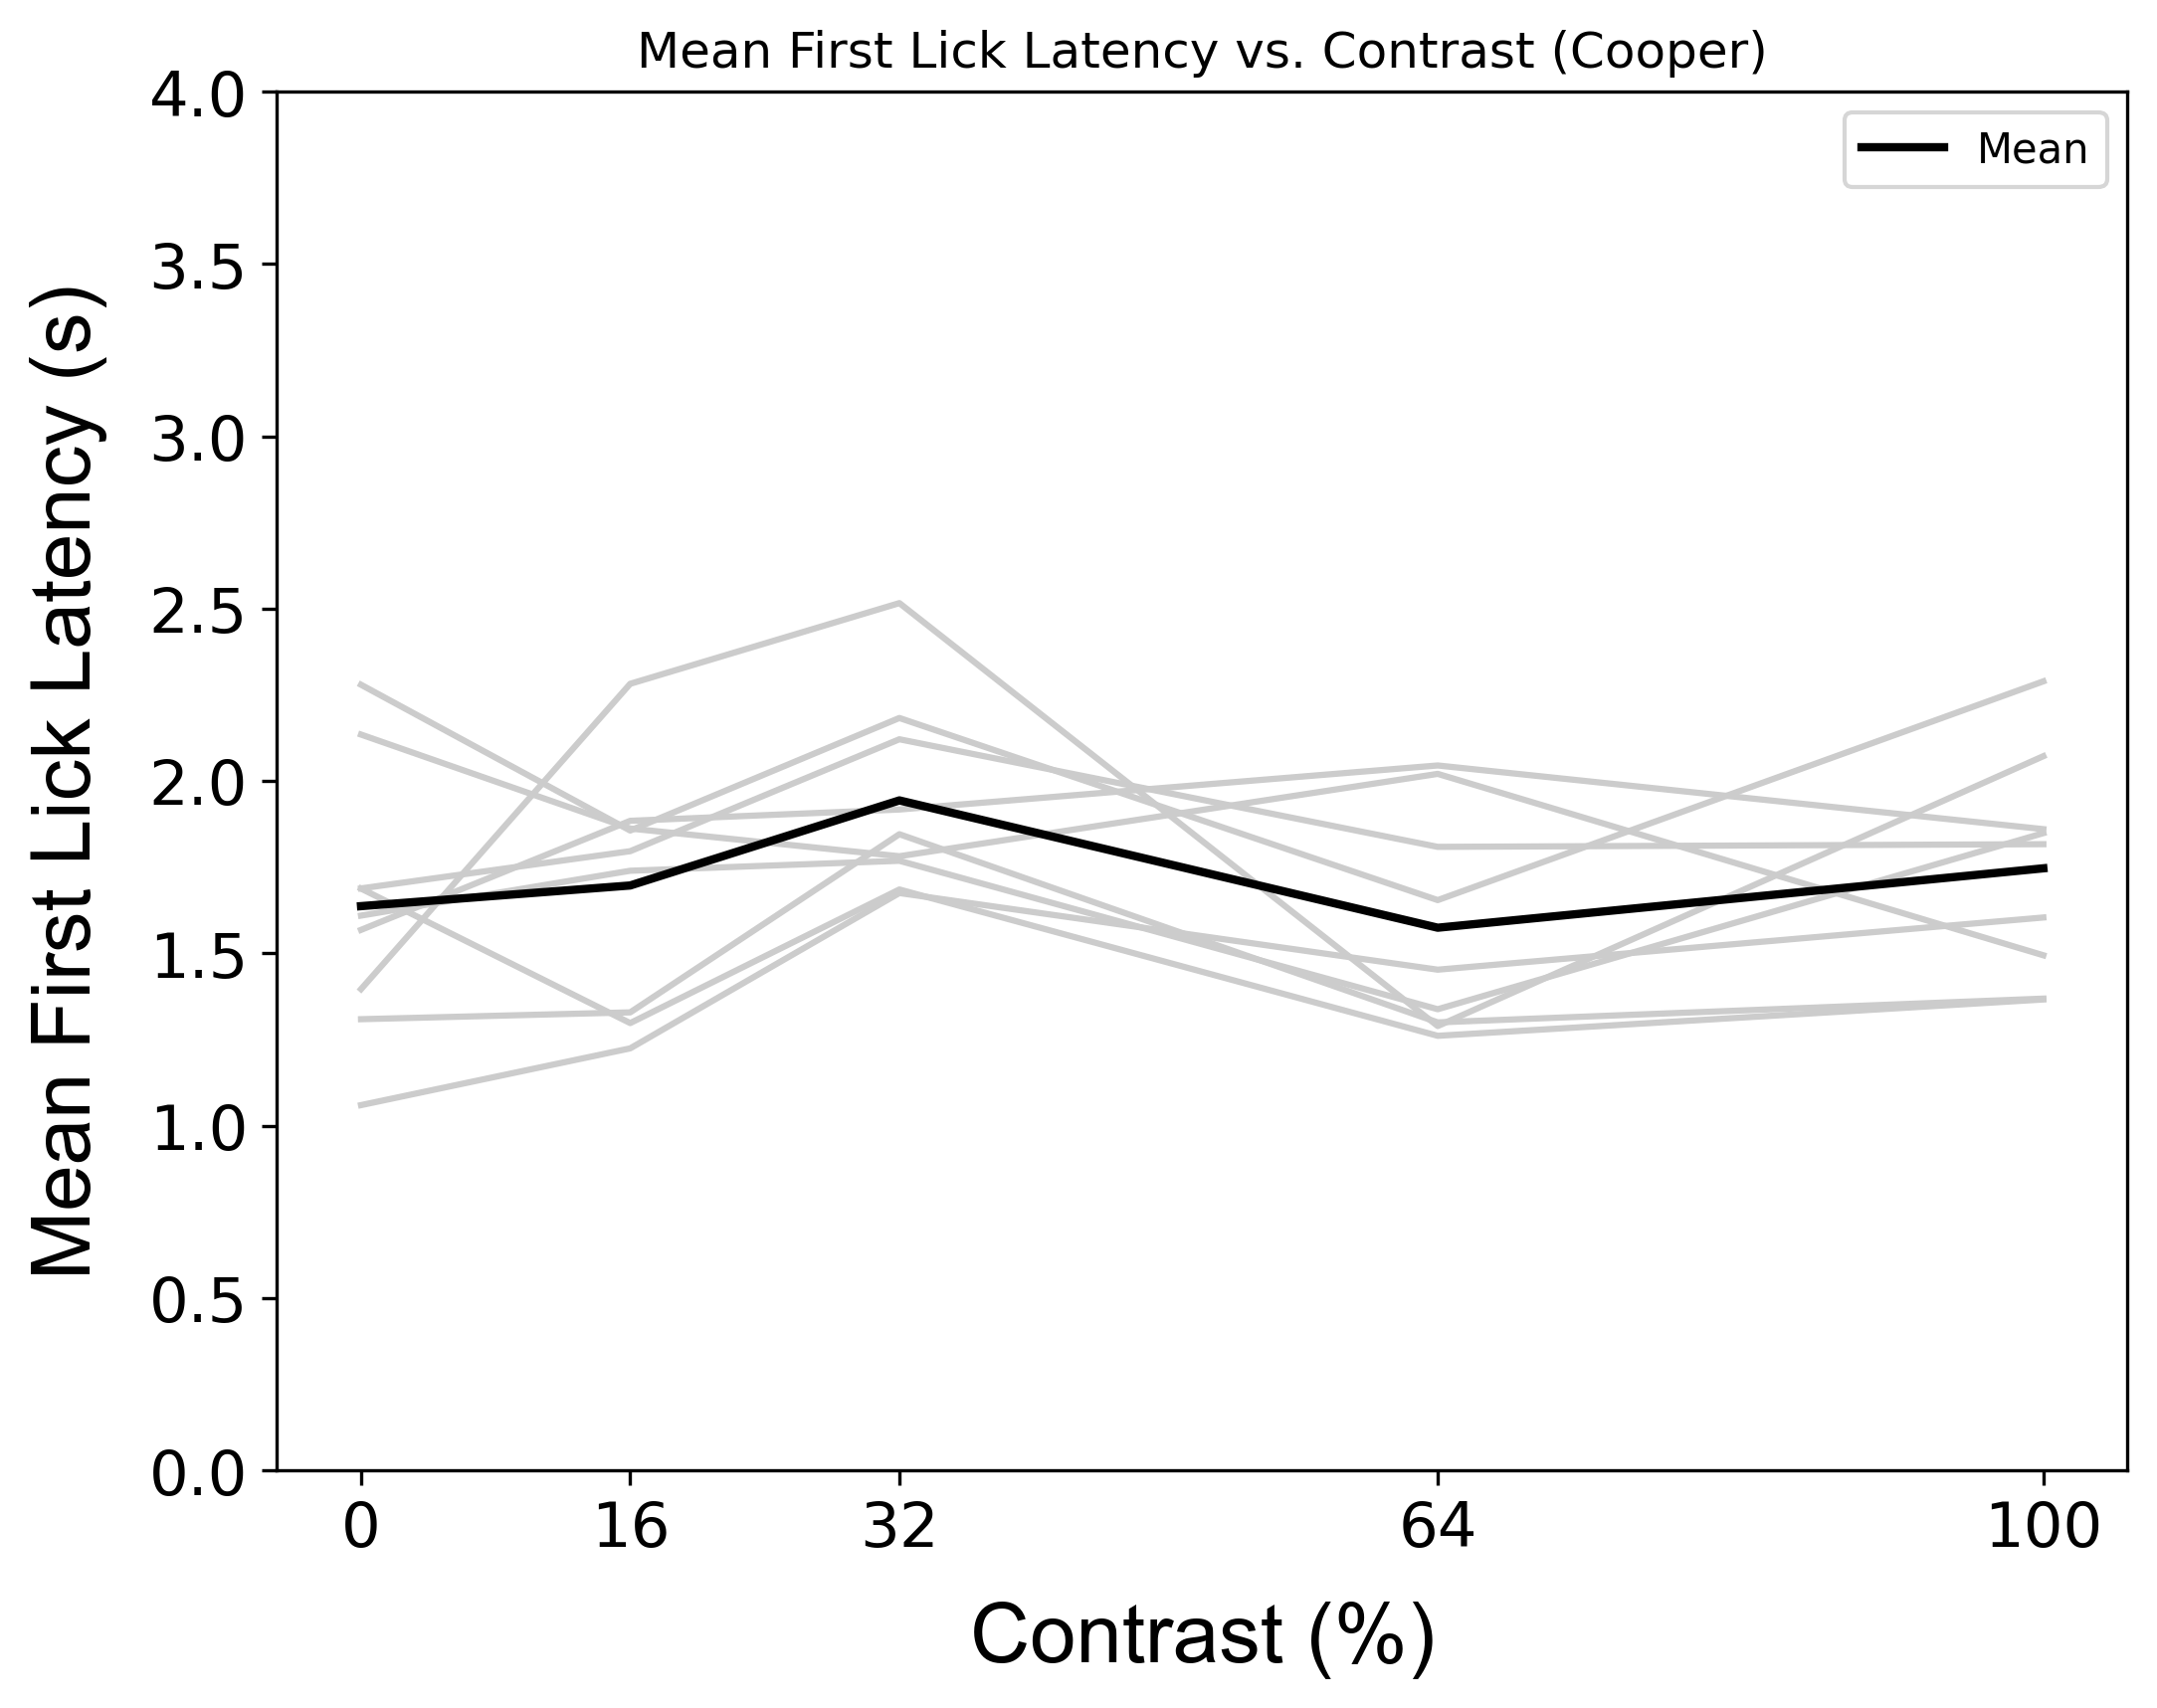

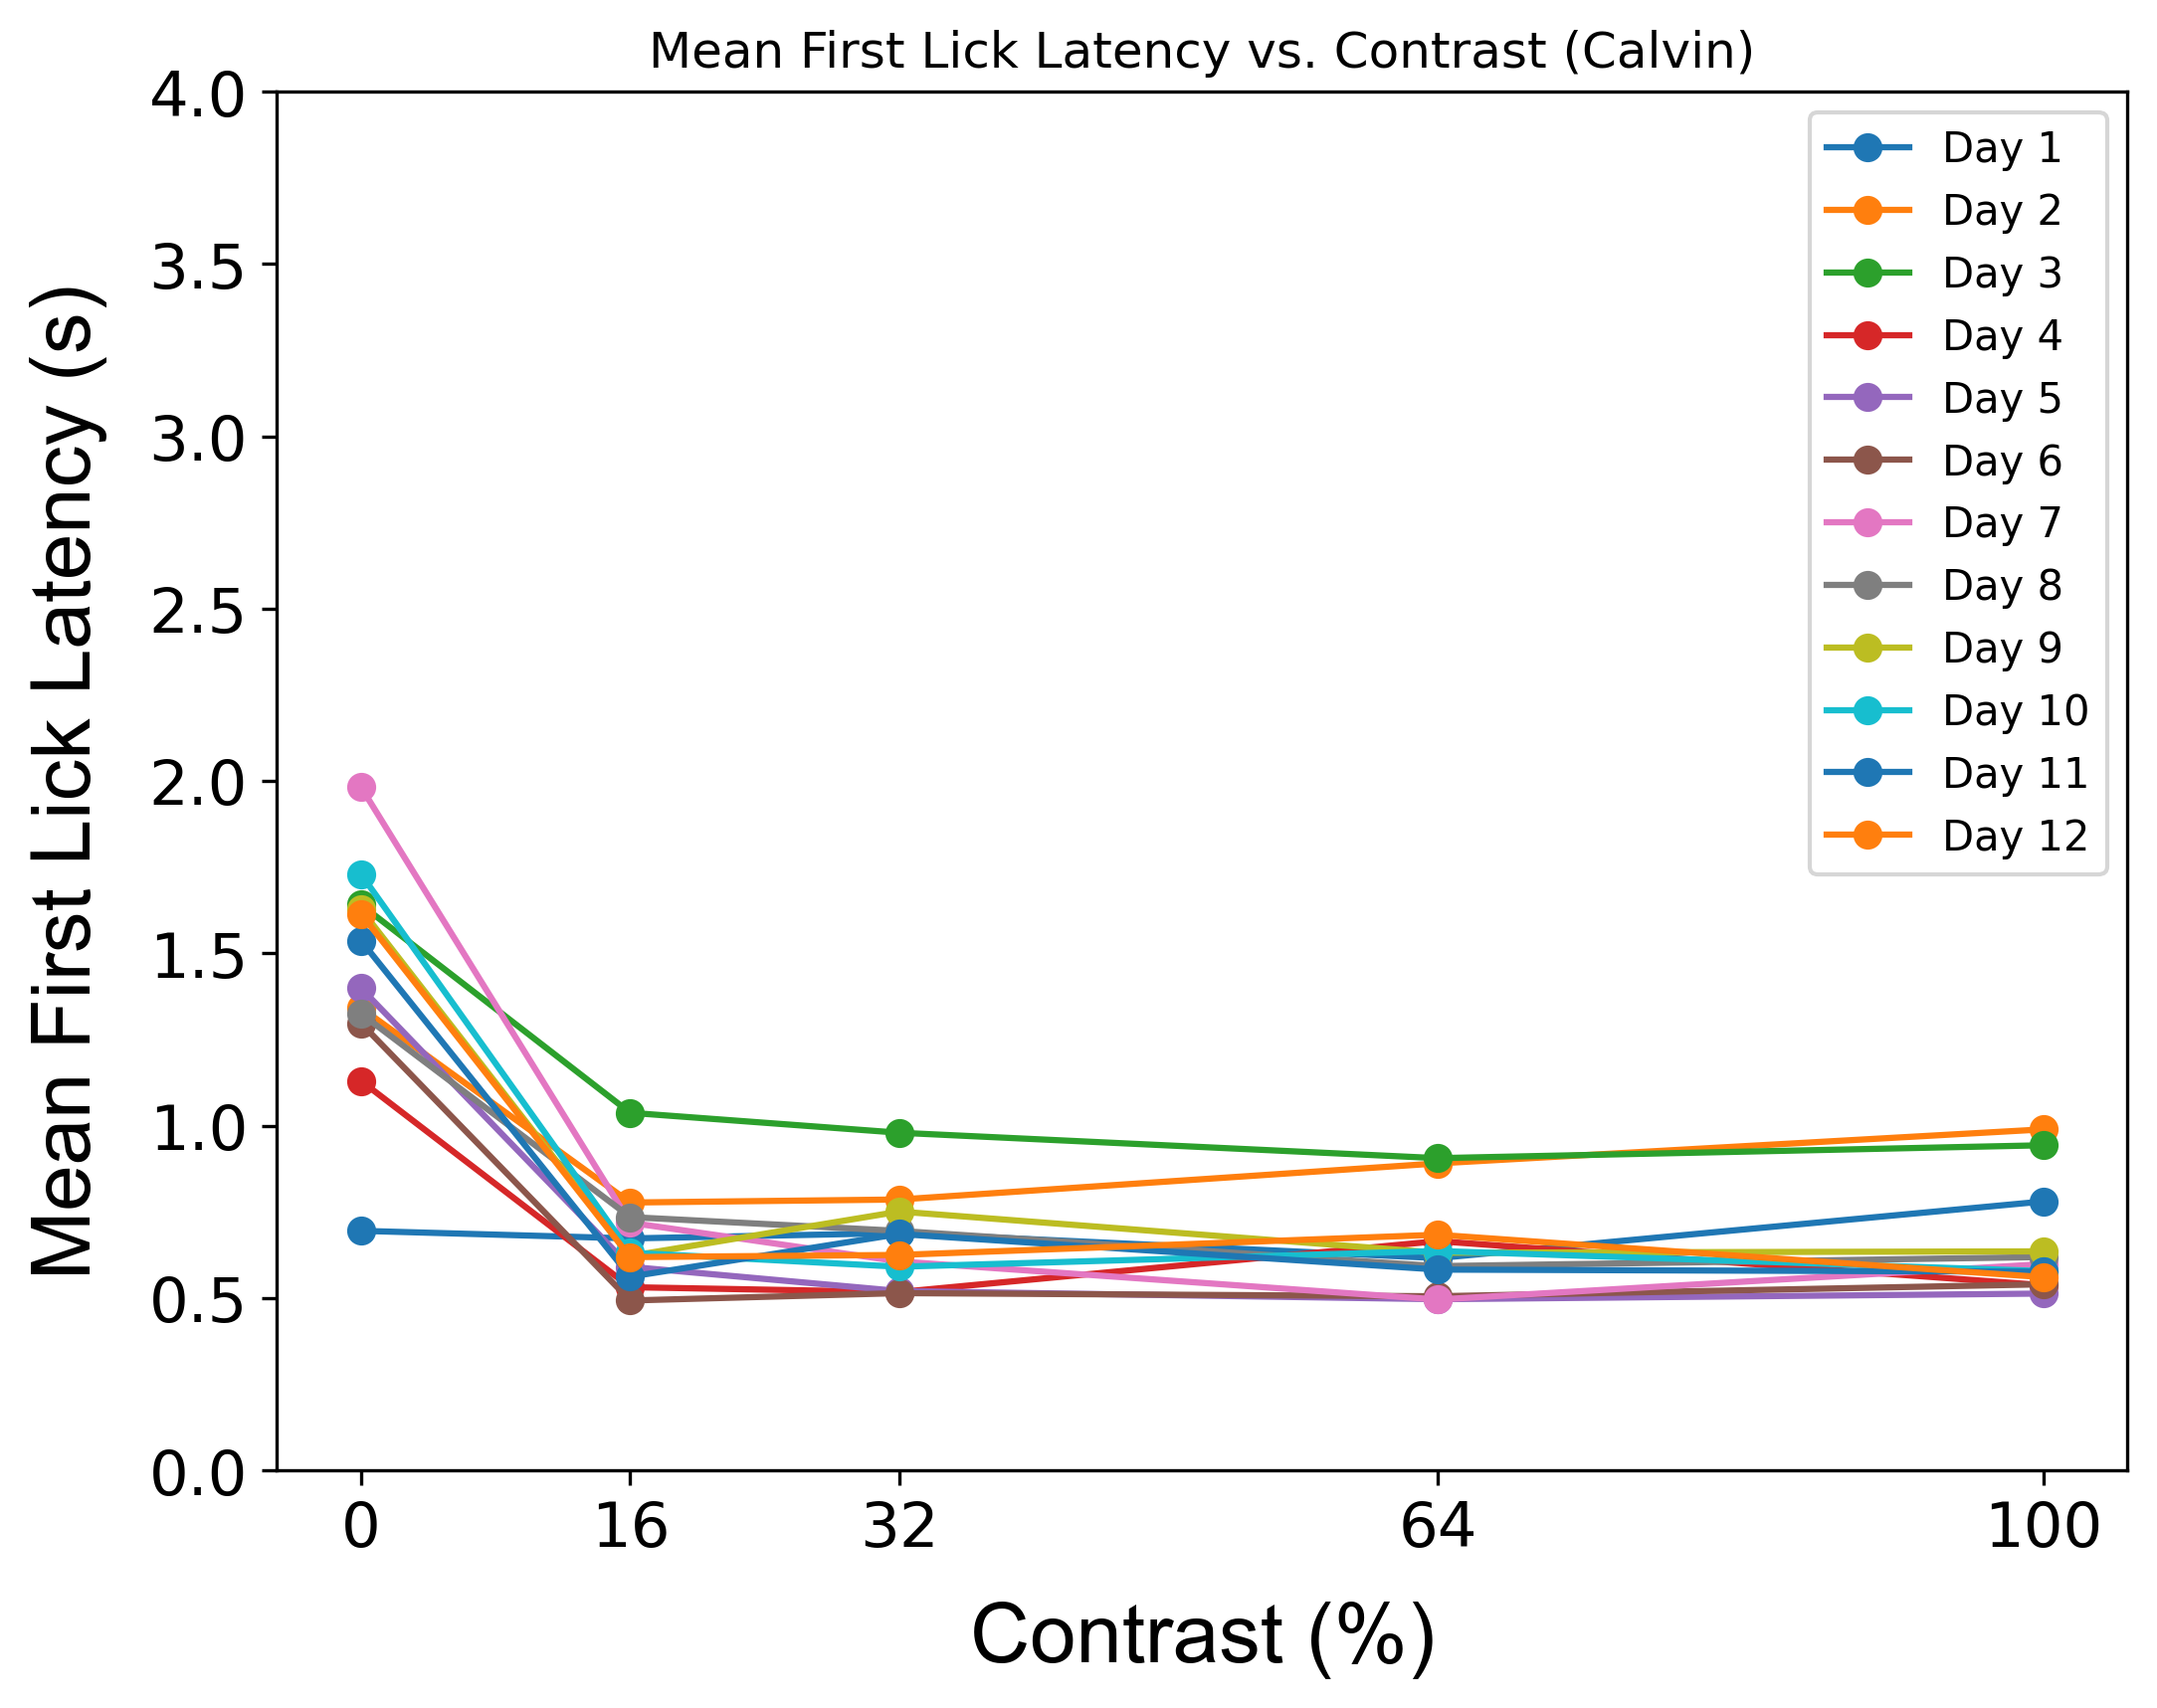

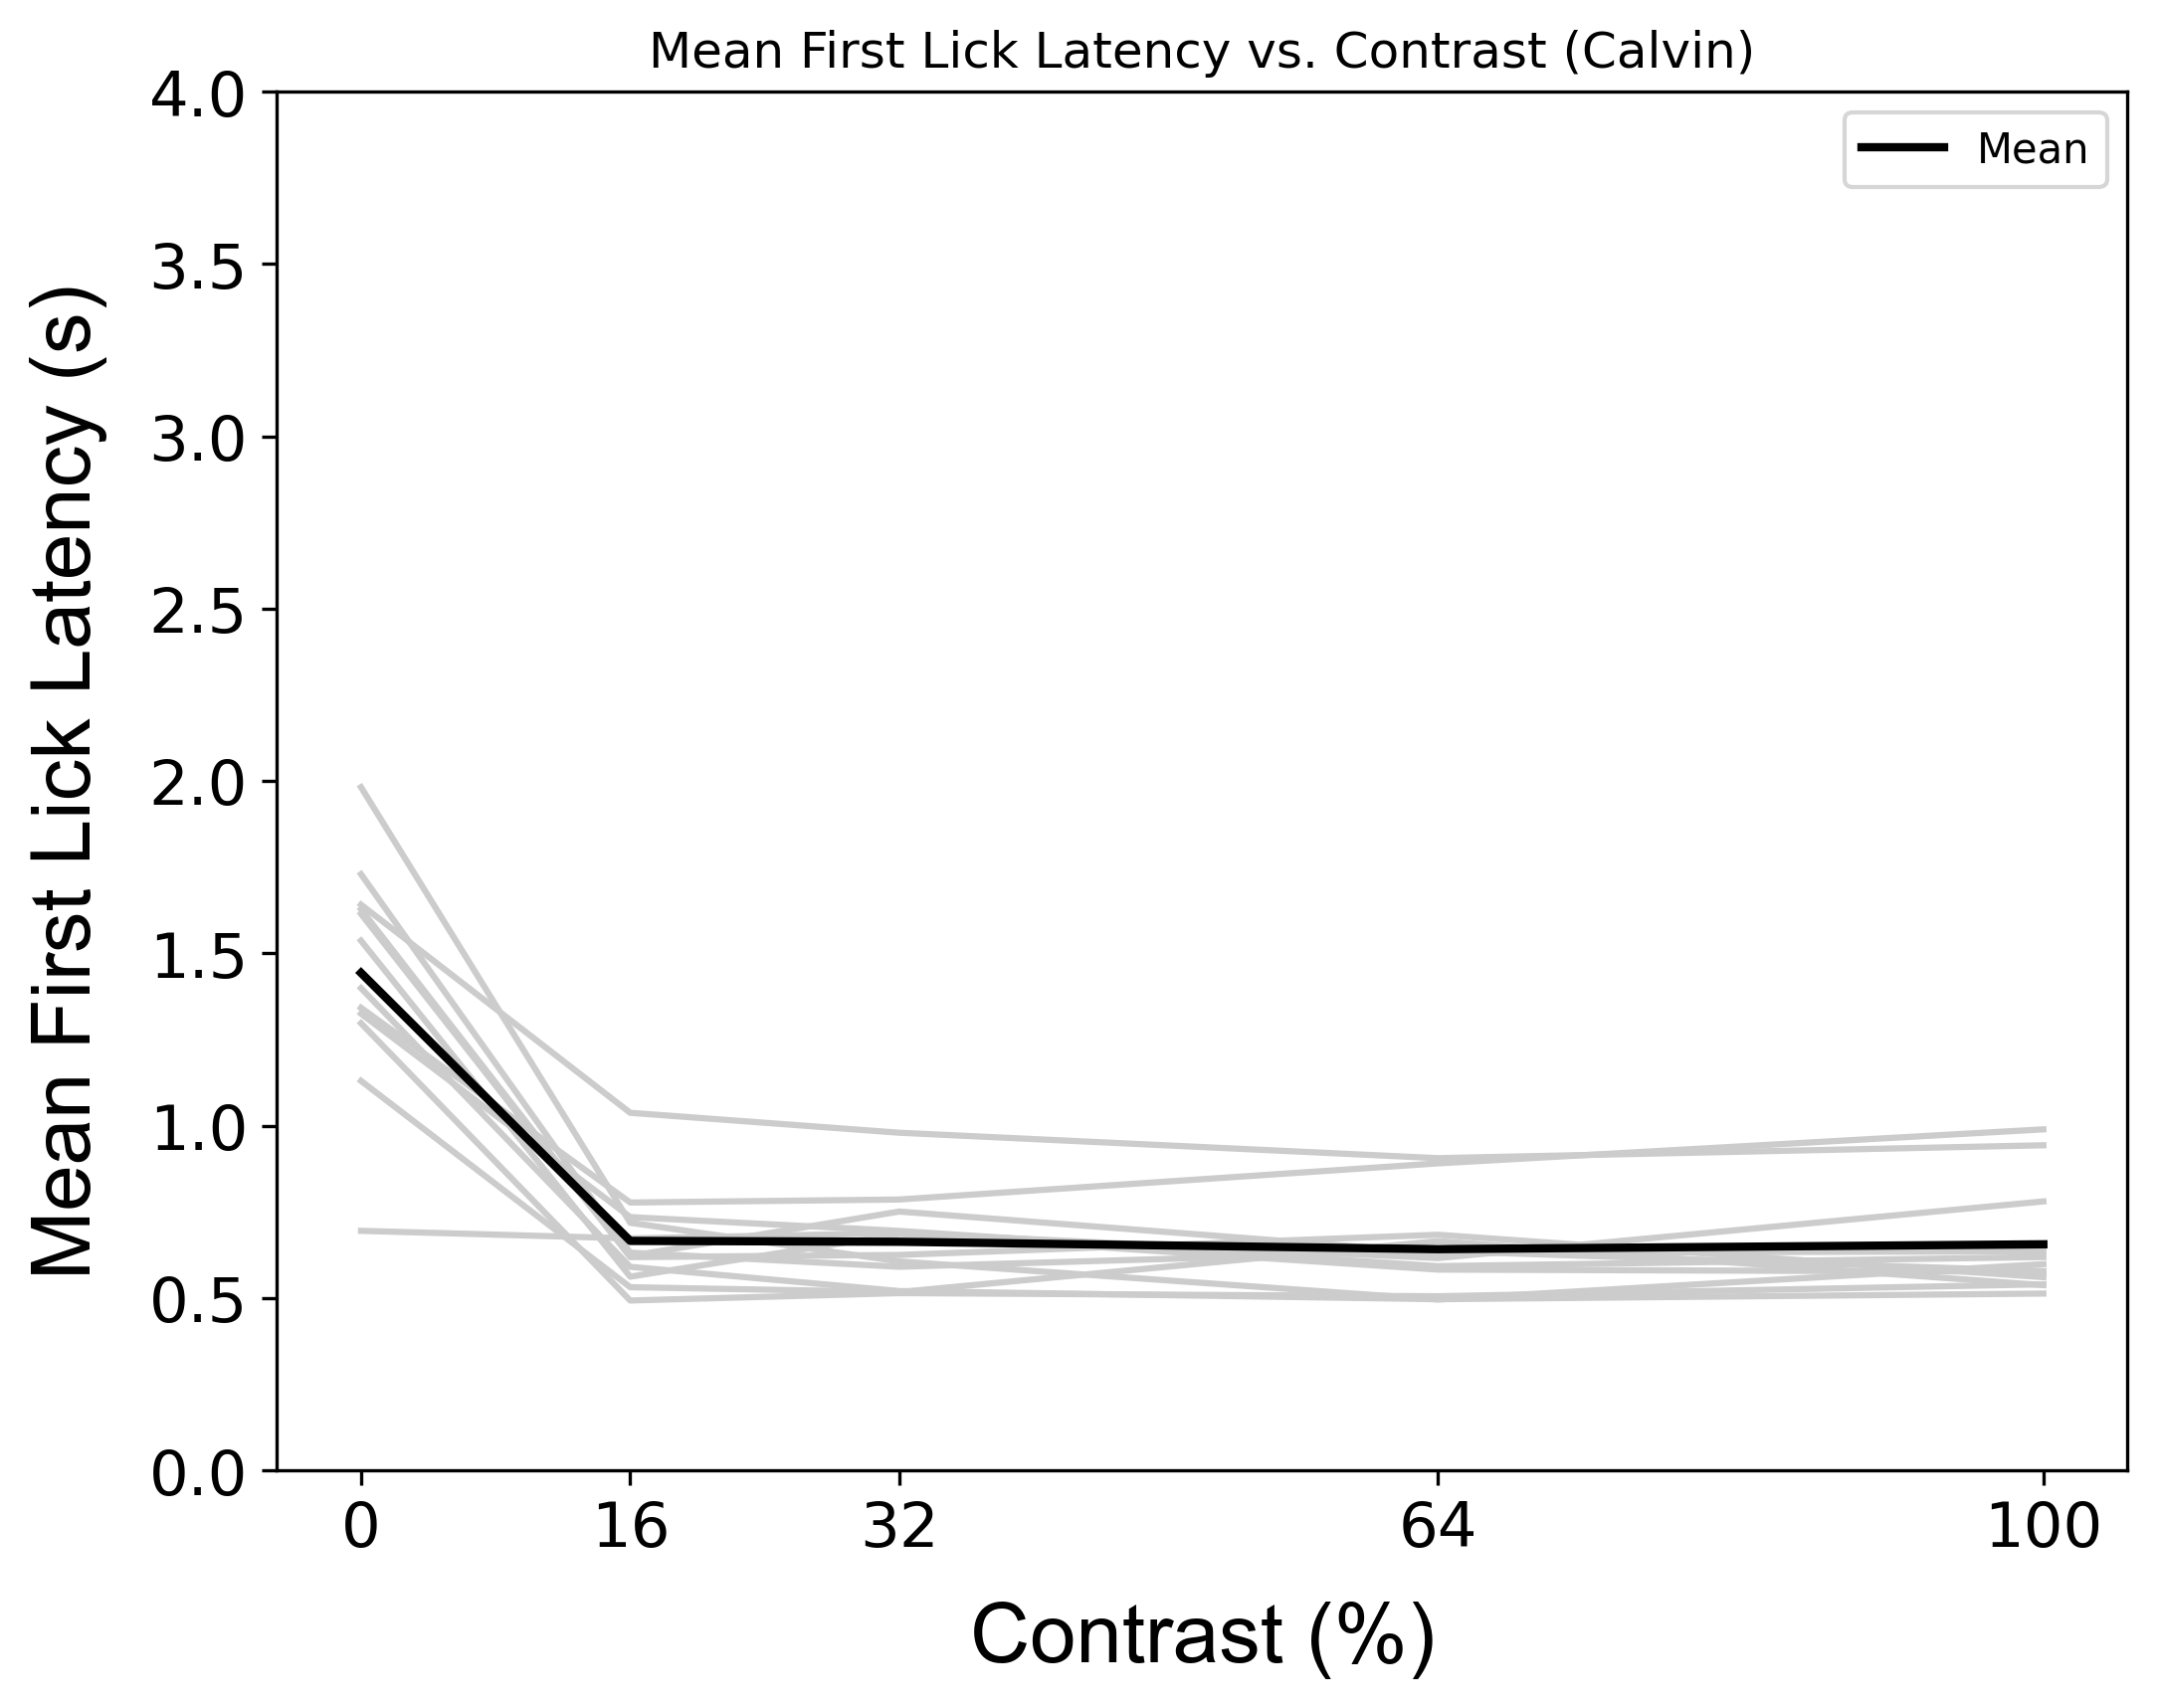

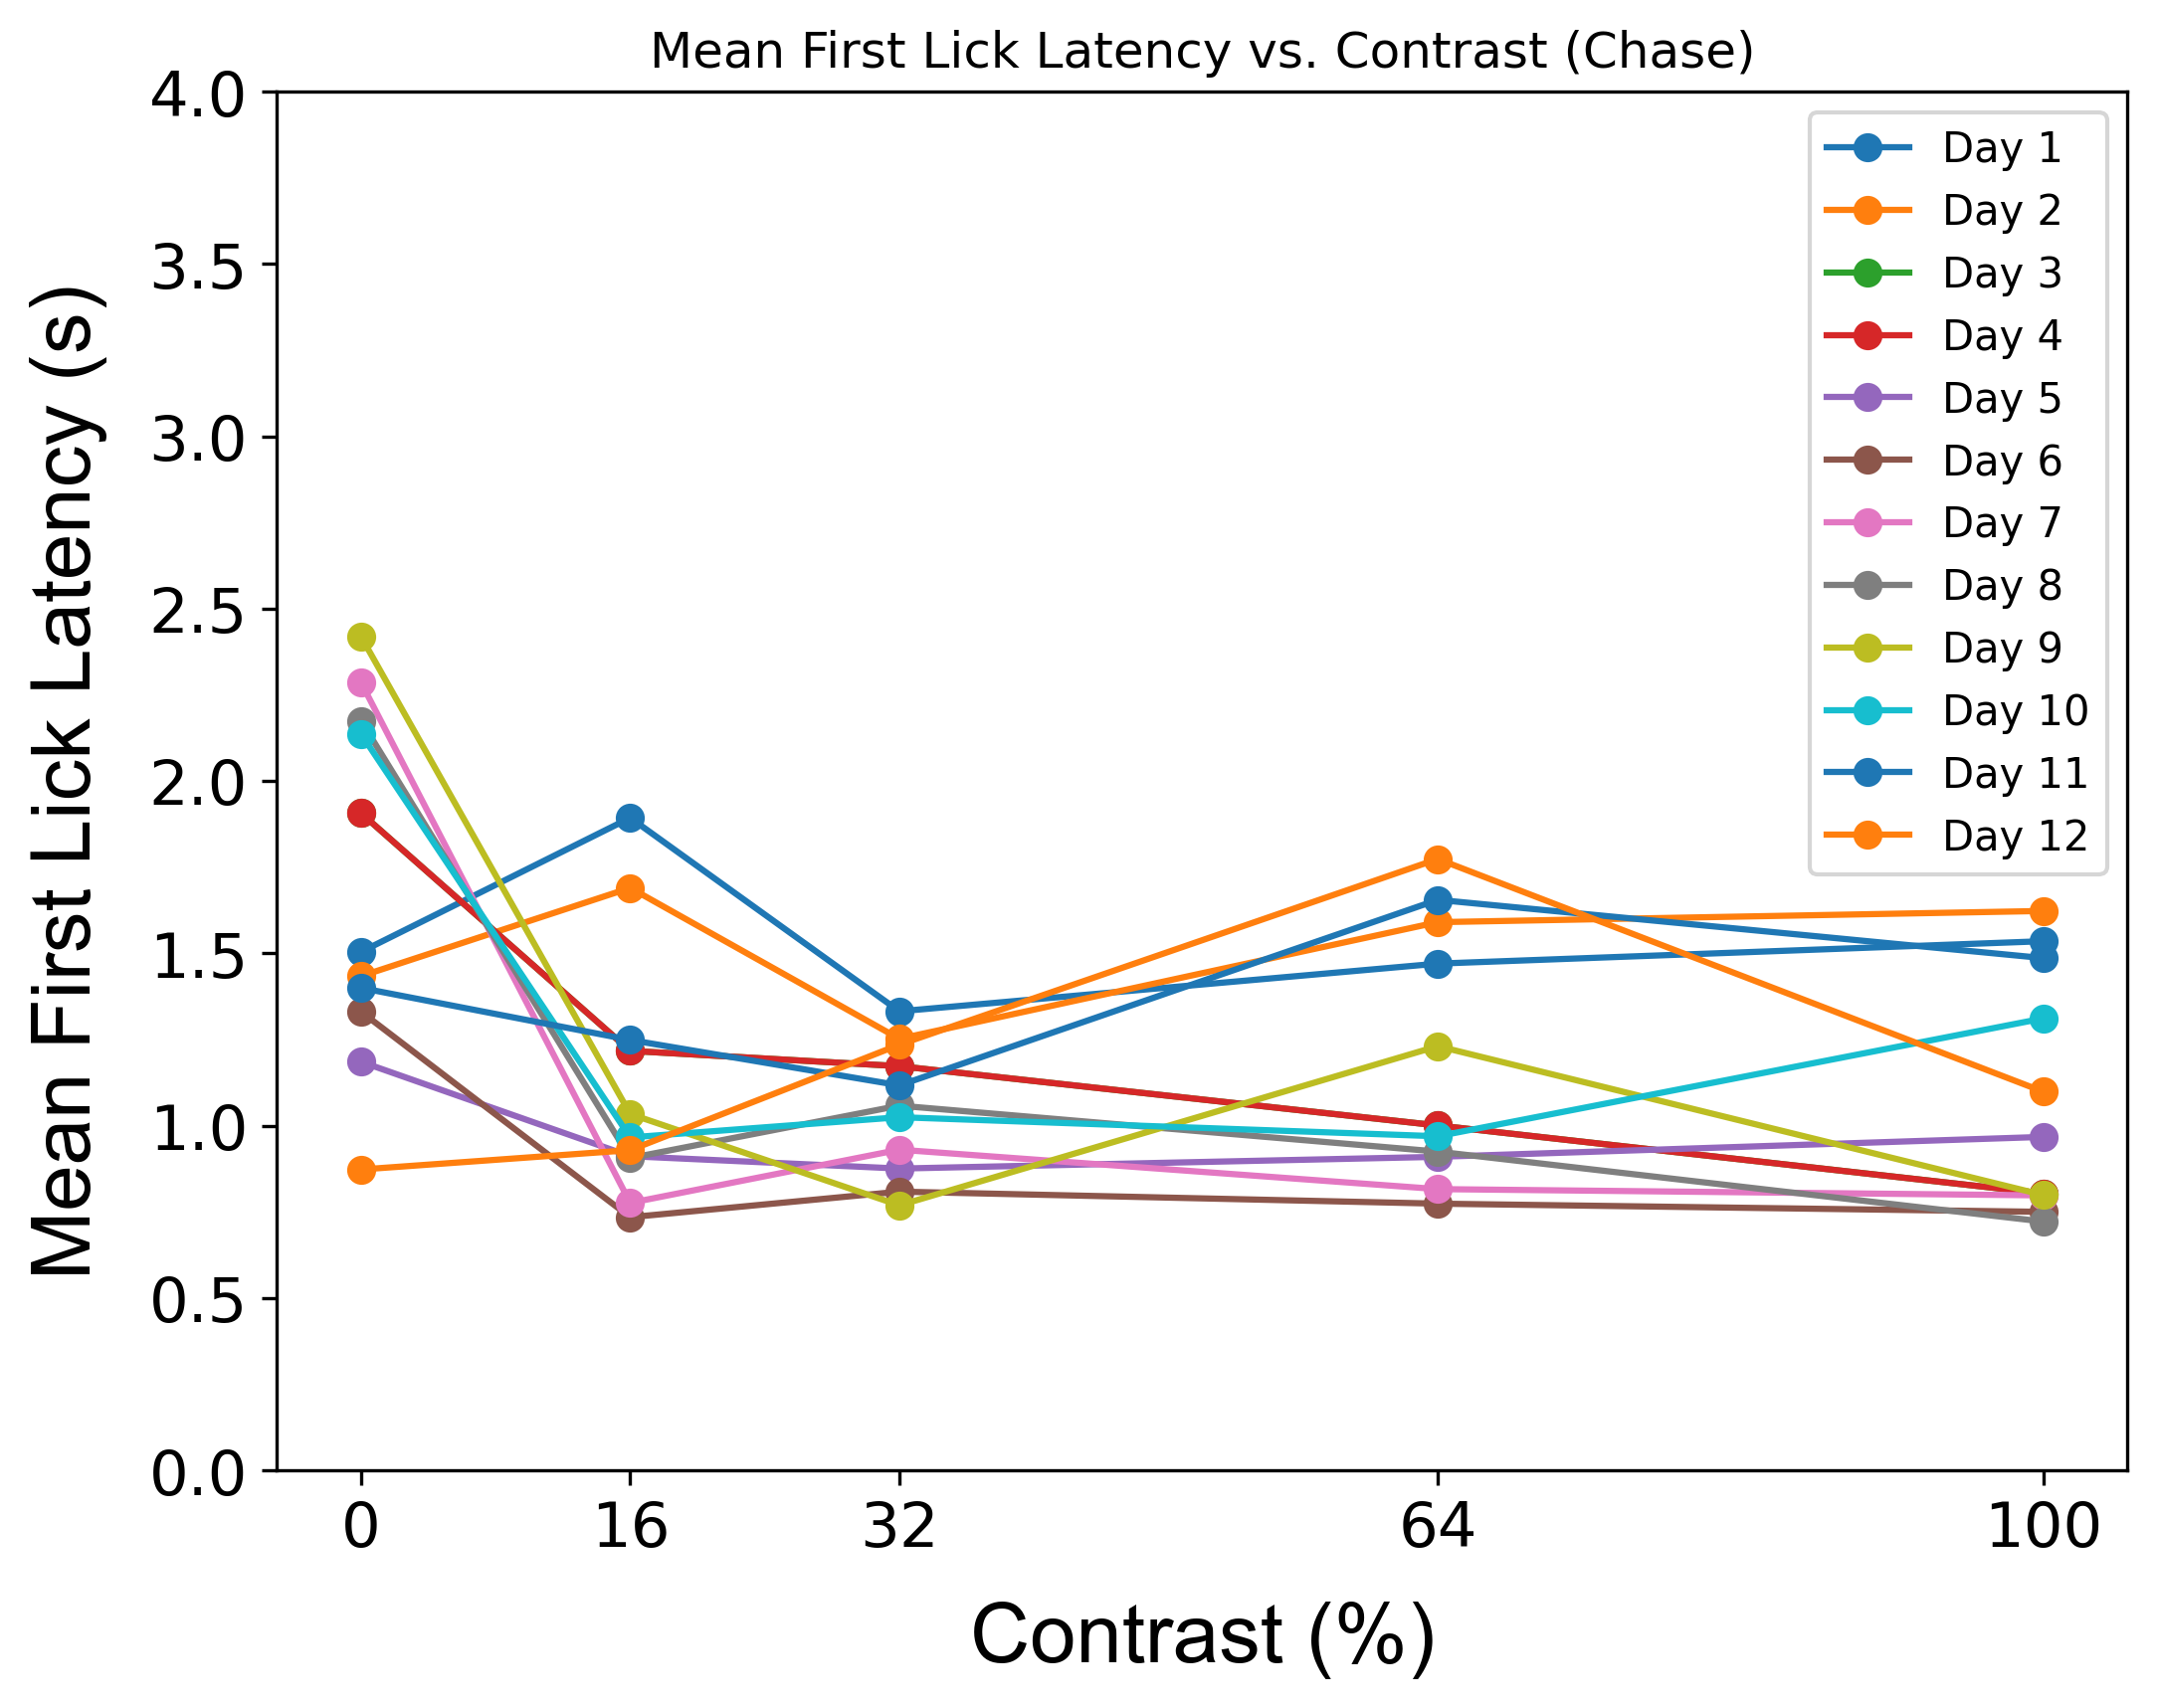

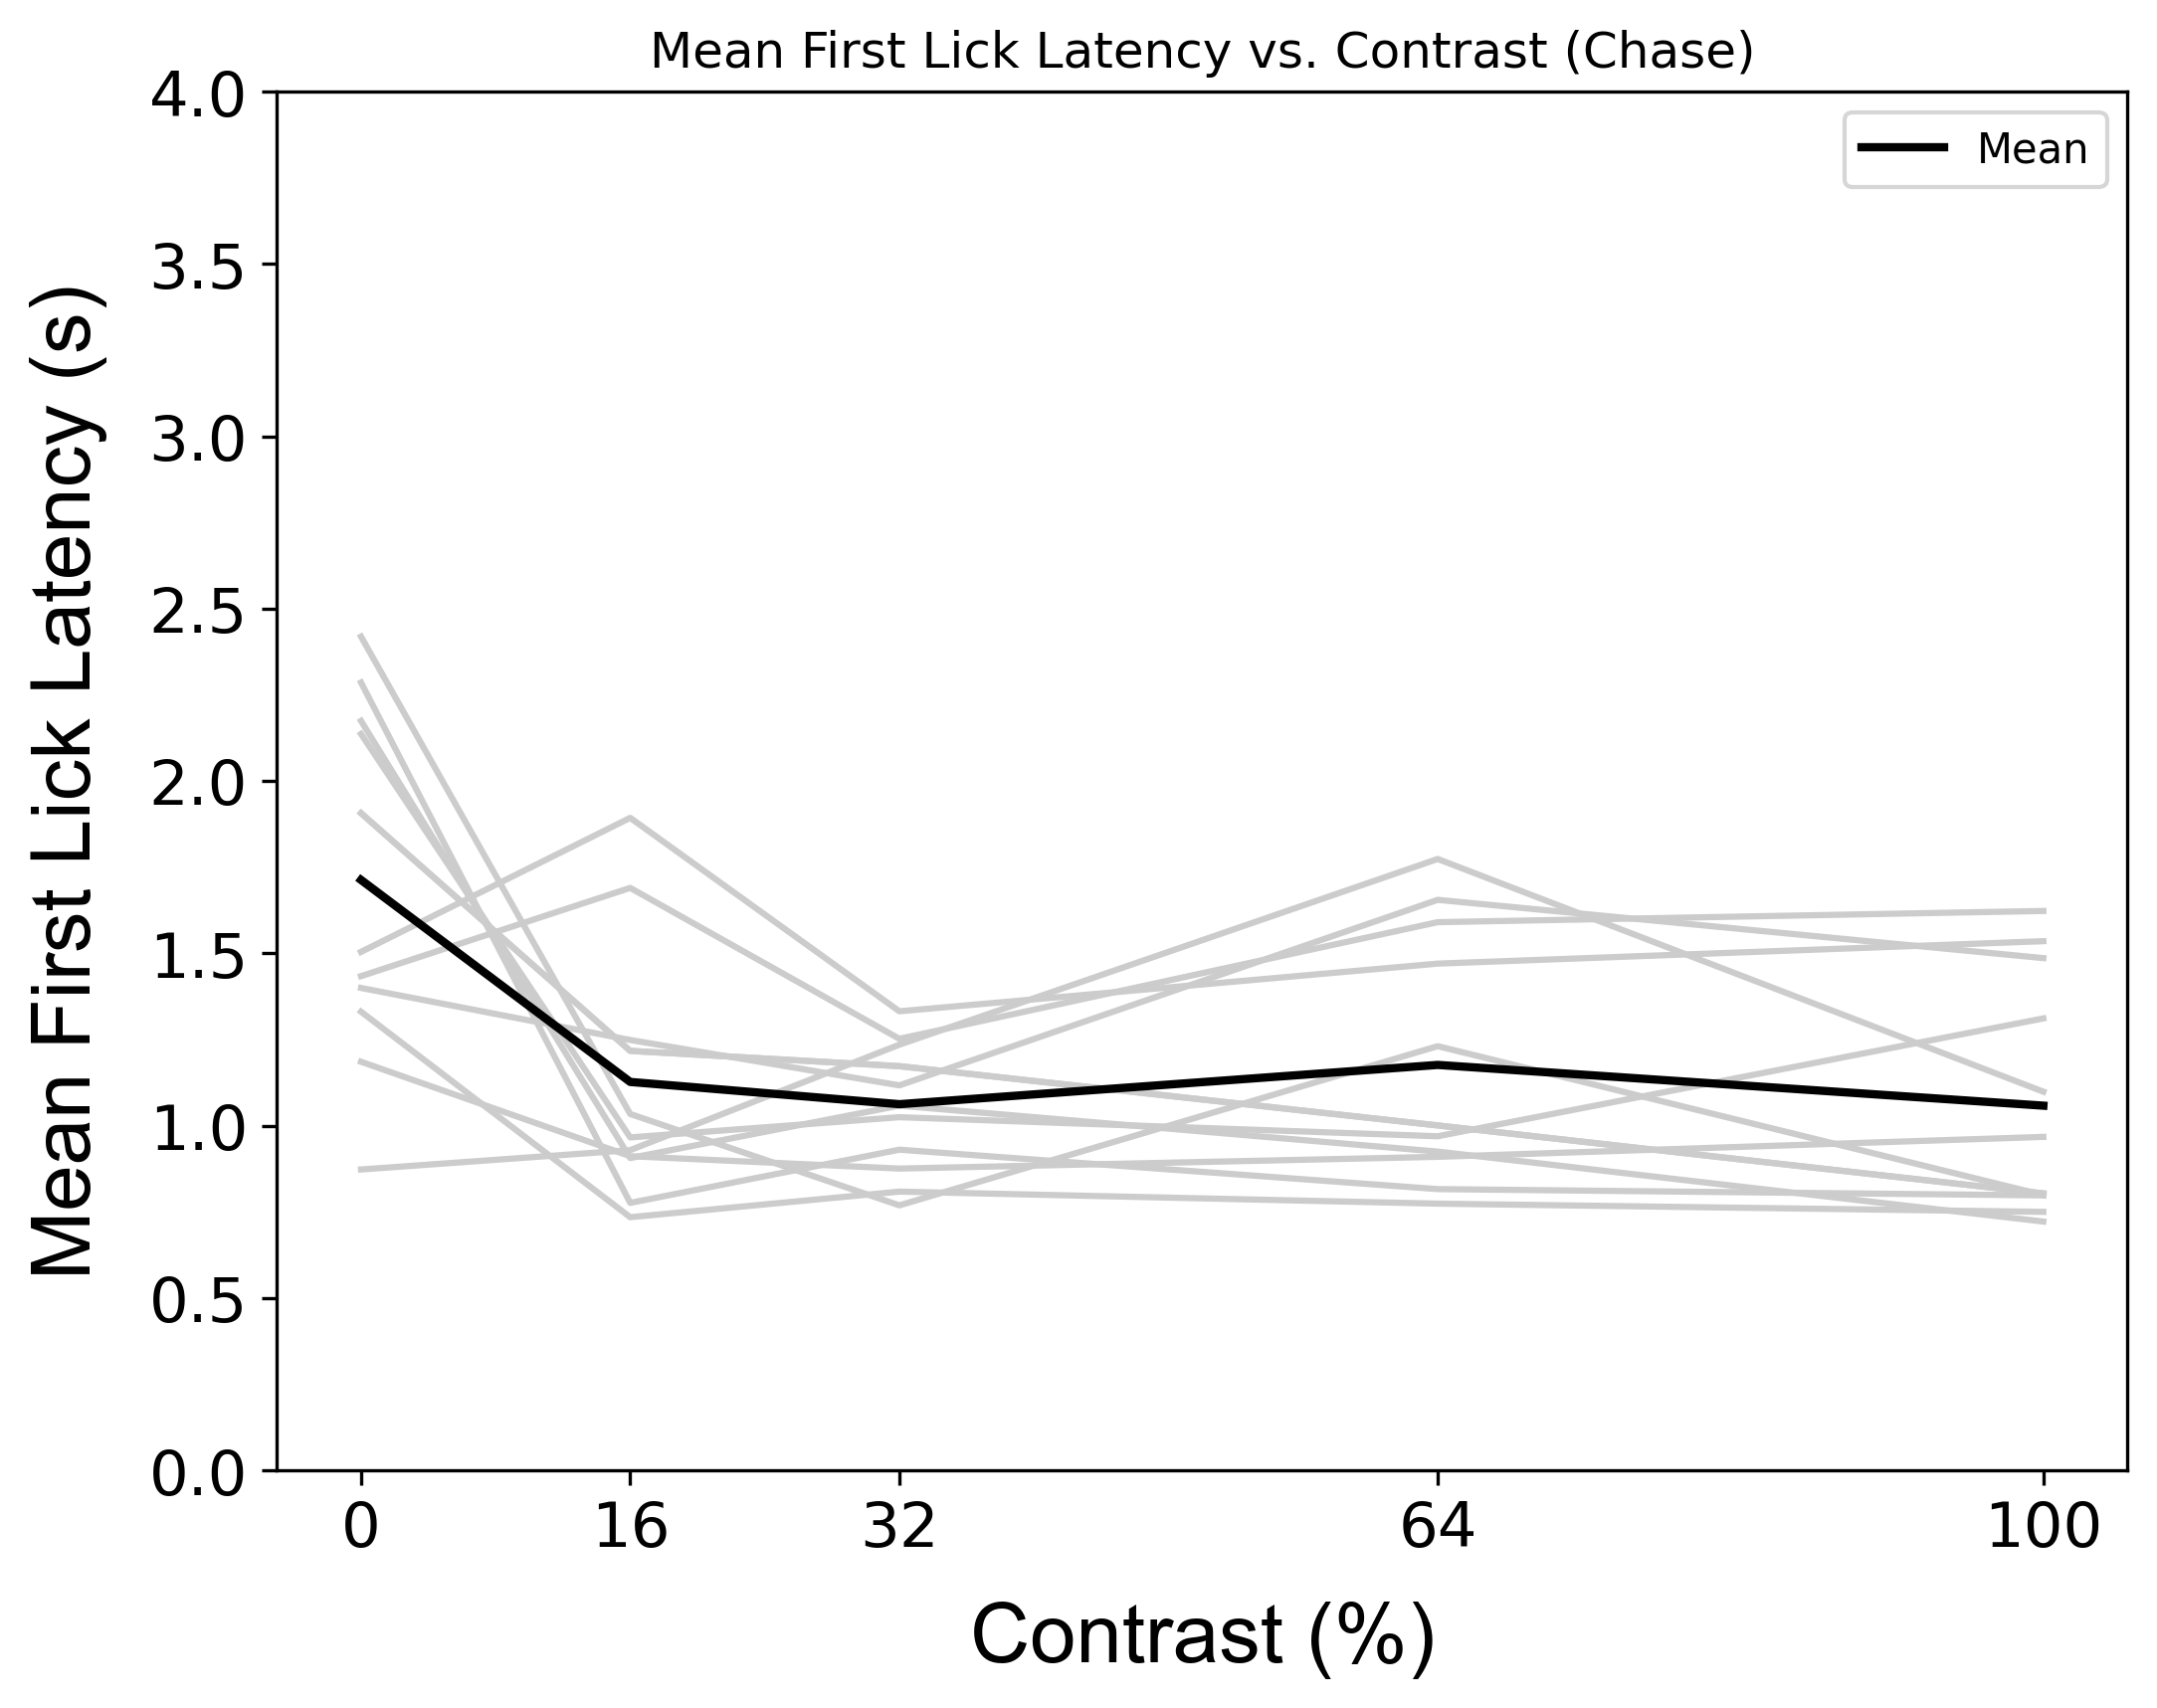

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# fl_latency vs contrast
names = ['Charlie', 'Conner','Clive','Cole', 'Cooper', 'Calvin', 'Chase']

individual_contrast = []
individual_mean = []

mean_fll_dict = {}

for name in names:
    # Directory where CSV files are located
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Trial_table'

    # Initialize dictionaries to store contrast and fl_latency for each day
    contrasts_dict = {}
    fl_latencies_dict = {}

    # Iterate over CSV files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            
            # Extract day number from filename
            day = int(filename.split('_')[3].replace('Day', ''))
            
            # Read CSV file
            df = pd.read_csv(file_path)

            # include the delay period before Vstim
            df['fl_latency']= df['fl_latency'] + 0.25
            
            # Calculate mean fl_latency for each stim_contrast
            mean_fl_latencies = df.groupby('stim_contrast')['fl_latency'].mean()
            
            # Store contrast and fl_latency for the day
            contrasts_dict[day] = mean_fl_latencies.index
            fl_latencies_dict[day] = mean_fl_latencies.values

    # Plotting
    fig, ax = plt.subplots(dpi=300)
    fig.set_size_inches(8, 6)

    # Sort the keys of contrasts_dict for the legend
    sorted_days = sorted(contrasts_dict.keys())


    # Plot individual lines
    for day in sorted_days:
        contrasts = contrasts_dict[day]
        fl_latencies = fl_latencies_dict[day]
        ax.plot(contrasts, fl_latencies, marker='o', linestyle='-', label=f'Day {day}')

    ax.set_ylim(0,4)

    ax.set_title(f'Mean First Lick Latency vs. Contrast ({name})')
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_ylabel('Mean First Lick Latency (s)', labelpad=10, size=20, family='Arial')
    ax.set_xlabel('Contrast (%)', labelpad=10, size=20, family='Arial')

    # Set contrast values as x-axis ticks and labels
    ax.set_xticks(list(contrasts_dict.values())[0])  # Use contrast values from the first day
    ax.set_xticklabels([f'{val*100:.0f}' for val in list(contrasts_dict.values())[0]])  # Convert to percentage

    ax.legend()


    # Plotting
    fig, ax = plt.subplots(dpi=300)
    fig.set_size_inches(8, 6)

    # Sort the keys of contrasts_dict for the legend
    sorted_days = sorted(contrasts_dict.keys())

    # Plot individual lines for each day
    for day in sorted_days:
        contrasts = contrasts_dict[day]
        fl_latencies = fl_latencies_dict[day]
        color = (0.8, 0.8, 0.8)
        ax.plot(contrasts, fl_latencies, linestyle='-', color=color)  # Lighter lines

    # Plot black mean line
    mean_contrasts = pd.concat([pd.Series(contrasts) for contrasts in contrasts_dict.values()]).unique()
    mean_fl_latencies = pd.concat([pd.Series(fl_latencies) for fl_latencies in fl_latencies_dict.values()]).groupby(level=0).mean()
    ax.plot(mean_contrasts, mean_fl_latencies, color='black', linewidth=2, linestyle='-', label='Mean')  # Black mean line

    # individual_contrast.append(mean_contrasts)
    # individual_mean.append(mean_fl_latencies)

    ax.set_ylim(0,4)

    ax.set_title(f'Mean First Lick Latency vs. Contrast ({name})')
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_ylabel('Mean First Lick Latency (s)', labelpad=10, size=20, family='Arial')
    ax.set_xlabel('Contrast (%)', labelpad=10, size=20, family='Arial')

    # Set contrast values as x-axis ticks and labels
    ax.set_xticks(list(contrasts_dict.values())[0])  # Use contrast values from the first day
    ax.set_xticklabels([f'{val*100:.0f}' for val in list(contrasts_dict.values())[0]])  # Convert to percentage

    ax.legend()

    mean_fll_dict[name] = [mean_contrasts, mean_fl_latencies]




# Group fl_latency vs contrast

[1.41613817 1.07898616 1.10881464 1.02843919 1.06262862]
[0.27915012 0.37076759 0.45880861 0.34162481 0.37003748]


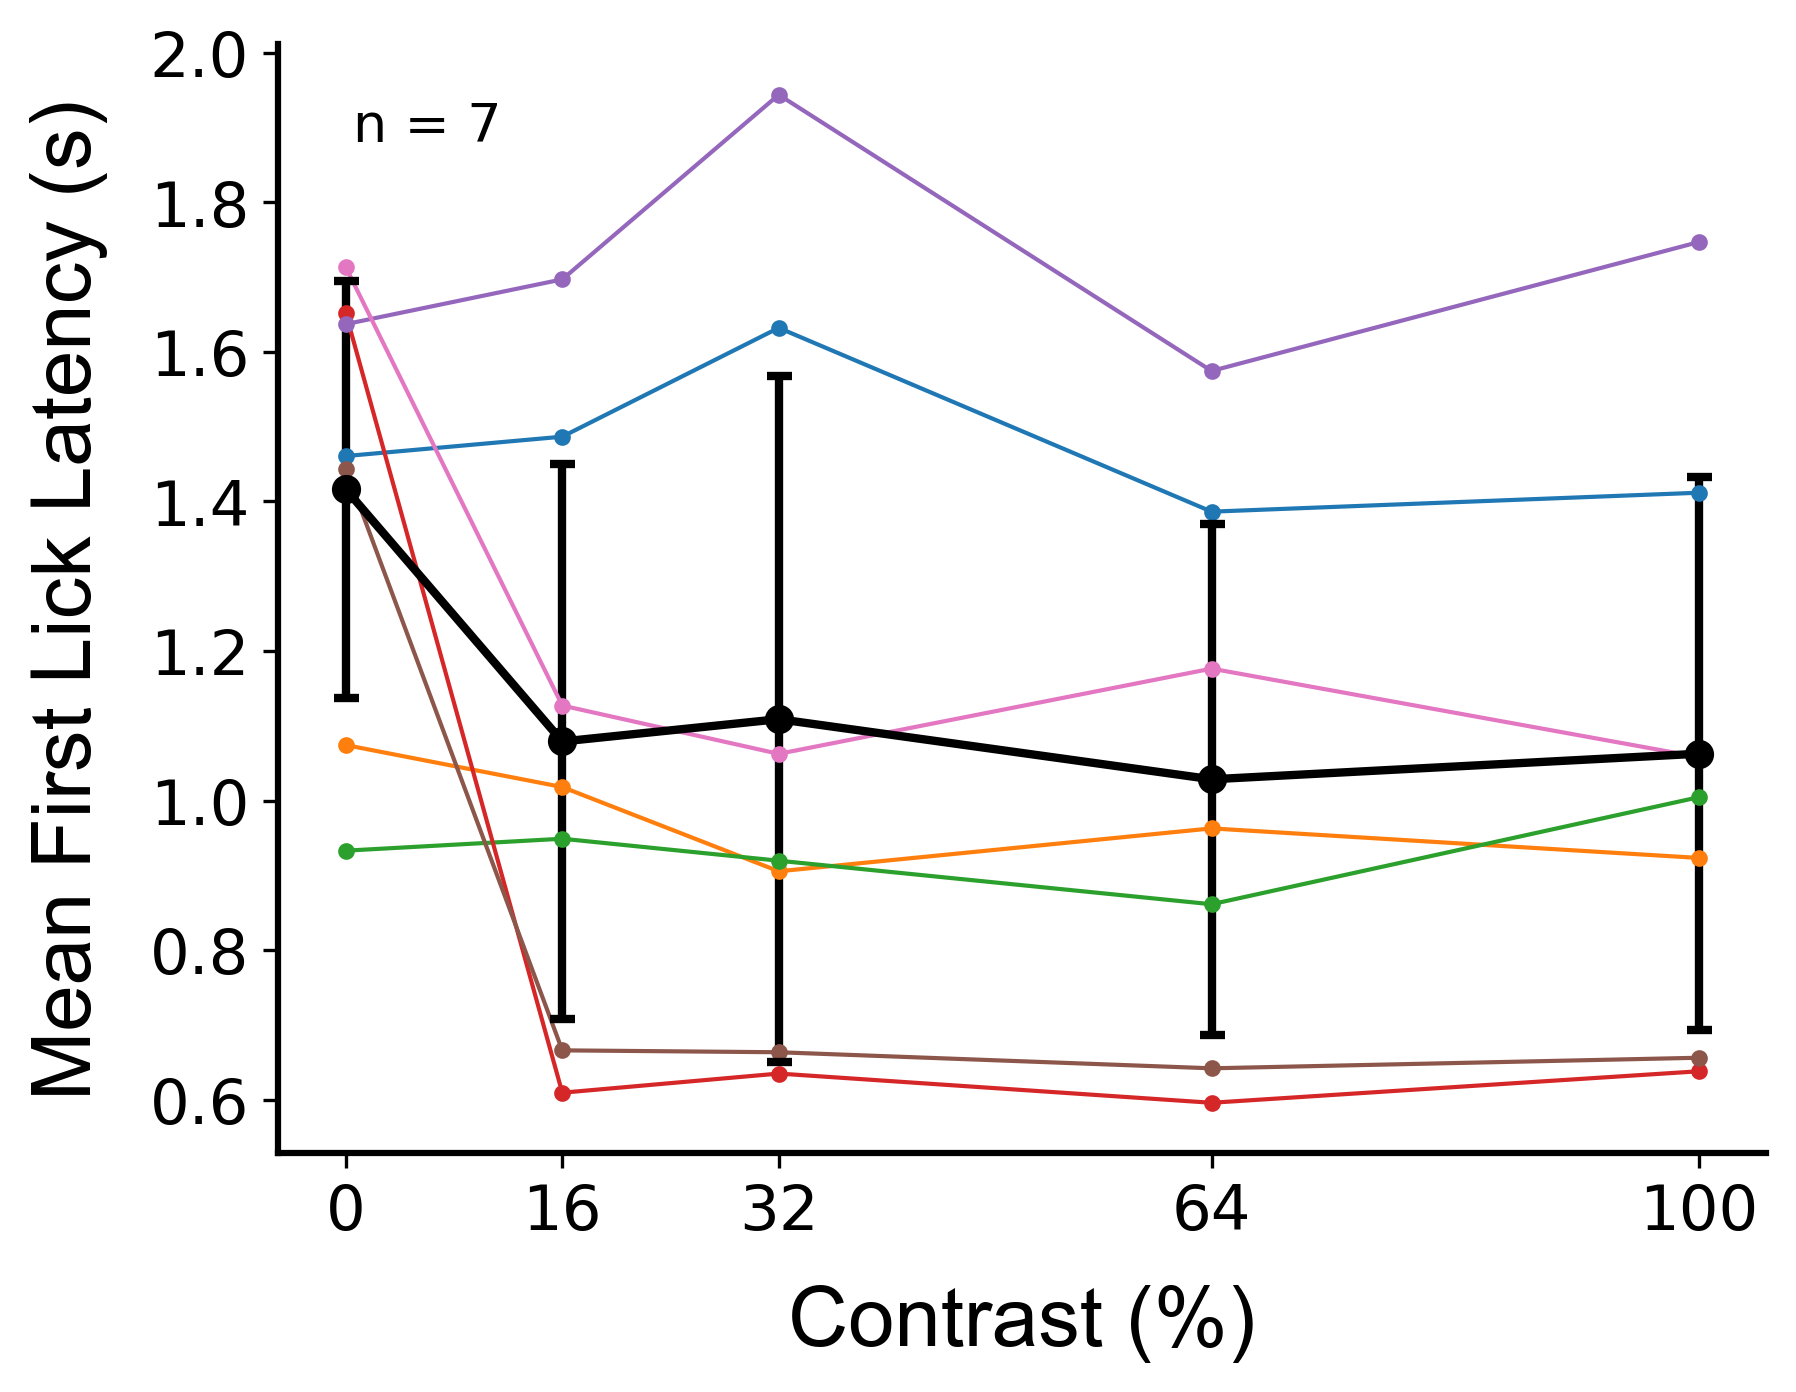

In [12]:
# Plot the overall aROC across mice
fig, ax = plt.subplots(dpi=300)
# fig.set_size_inches(6,6)

for name, (contrast, fll) in mean_fll_dict.items():

    ax.plot(contrast, fll, linewidth=1, linestyle='-', marker='o', markersize=3, label=name)

# Calculate mean and standard deviation
mean_contrast = np.mean([values[0] for values in mean_fll_dict.values()], axis=0)
mean_fll = np.mean([values[1] for values in mean_fll_dict.values()], axis=0)
std_fll = np.std([values[1] for values in mean_fll_dict.values()], axis=0)

# Plot mean line
ax.plot(mean_contrast, mean_fll, linewidth=2, linestyle='-', color='black', label='Mean fll')

# Plot error bars
ax.errorbar(mean_contrast, mean_fll, yerr=std_fll, fmt='o', color='black', capsize=3, capthick=2, elinewidth=2)

# ax.set_ylim(0.5,1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_title('Mean aROC vs. Contrast')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# ax.set_title(f'Mean First Lick Latency vs. Contrast ({name})')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylabel('Mean First Lick Latency (s)', labelpad=10, size=20, family='Arial')
ax.set_xlabel('Contrast (%)', labelpad=10, size=20, family='Arial')

# Set contrast values as x-axis ticks and labels
ax.set_xticks(list(contrasts_dict.values())[0])  # Use contrast values from the first day
ax.set_xticklabels([f'{val*100:.0f}' for val in list(contrasts_dict.values())[0]])  # Convert to percentage

ax.text(0.05, 0.95, f'n = 7', fontsize=13, ha='left', va='top', transform=ax.transAxes)

print(mean_fll)
print(std_fll)

# Individual aROC vs Contrast

{'Cole': [(0.0, 0.16, 0.32, 0.64, 1.0), (0.5, 0.7822399457051079, 0.7813406618032238, 0.7790323707284256, 0.7805435427422064)], 'Calvin': [(0.0, 0.16, 0.32, 0.64, 1.0), (0.5, 0.7529806292624439, 0.7595116323950885, 0.7578078008713754, 0.7530309555275035)], 'Chase': [(0.0, 0.16, 0.32, 0.64, 1.0), (0.5, 0.7181209762439368, 0.7186035256783881, 0.684776643354594, 0.694941021442247)]}


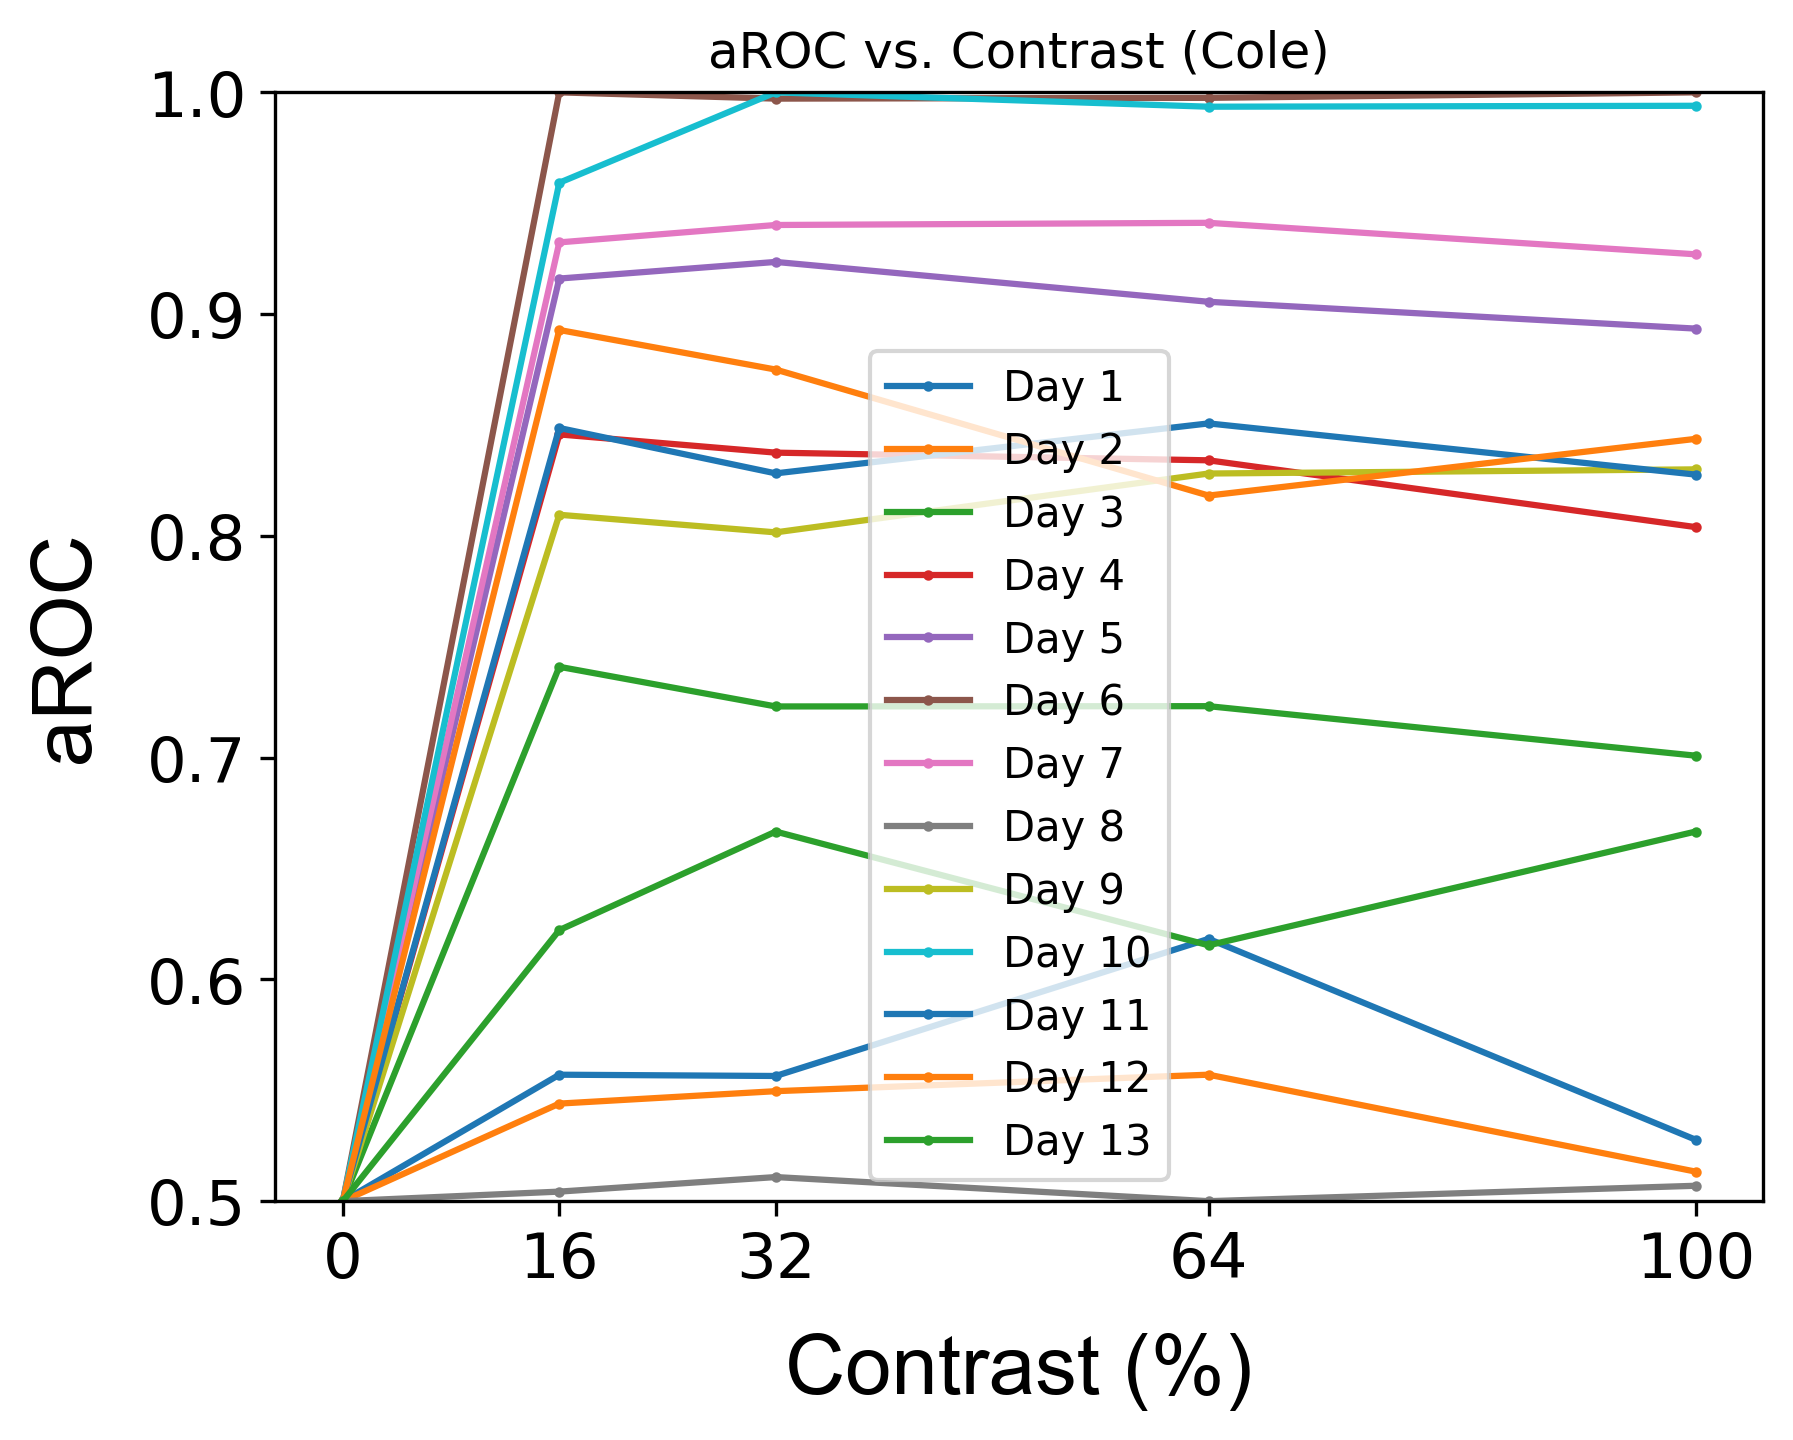

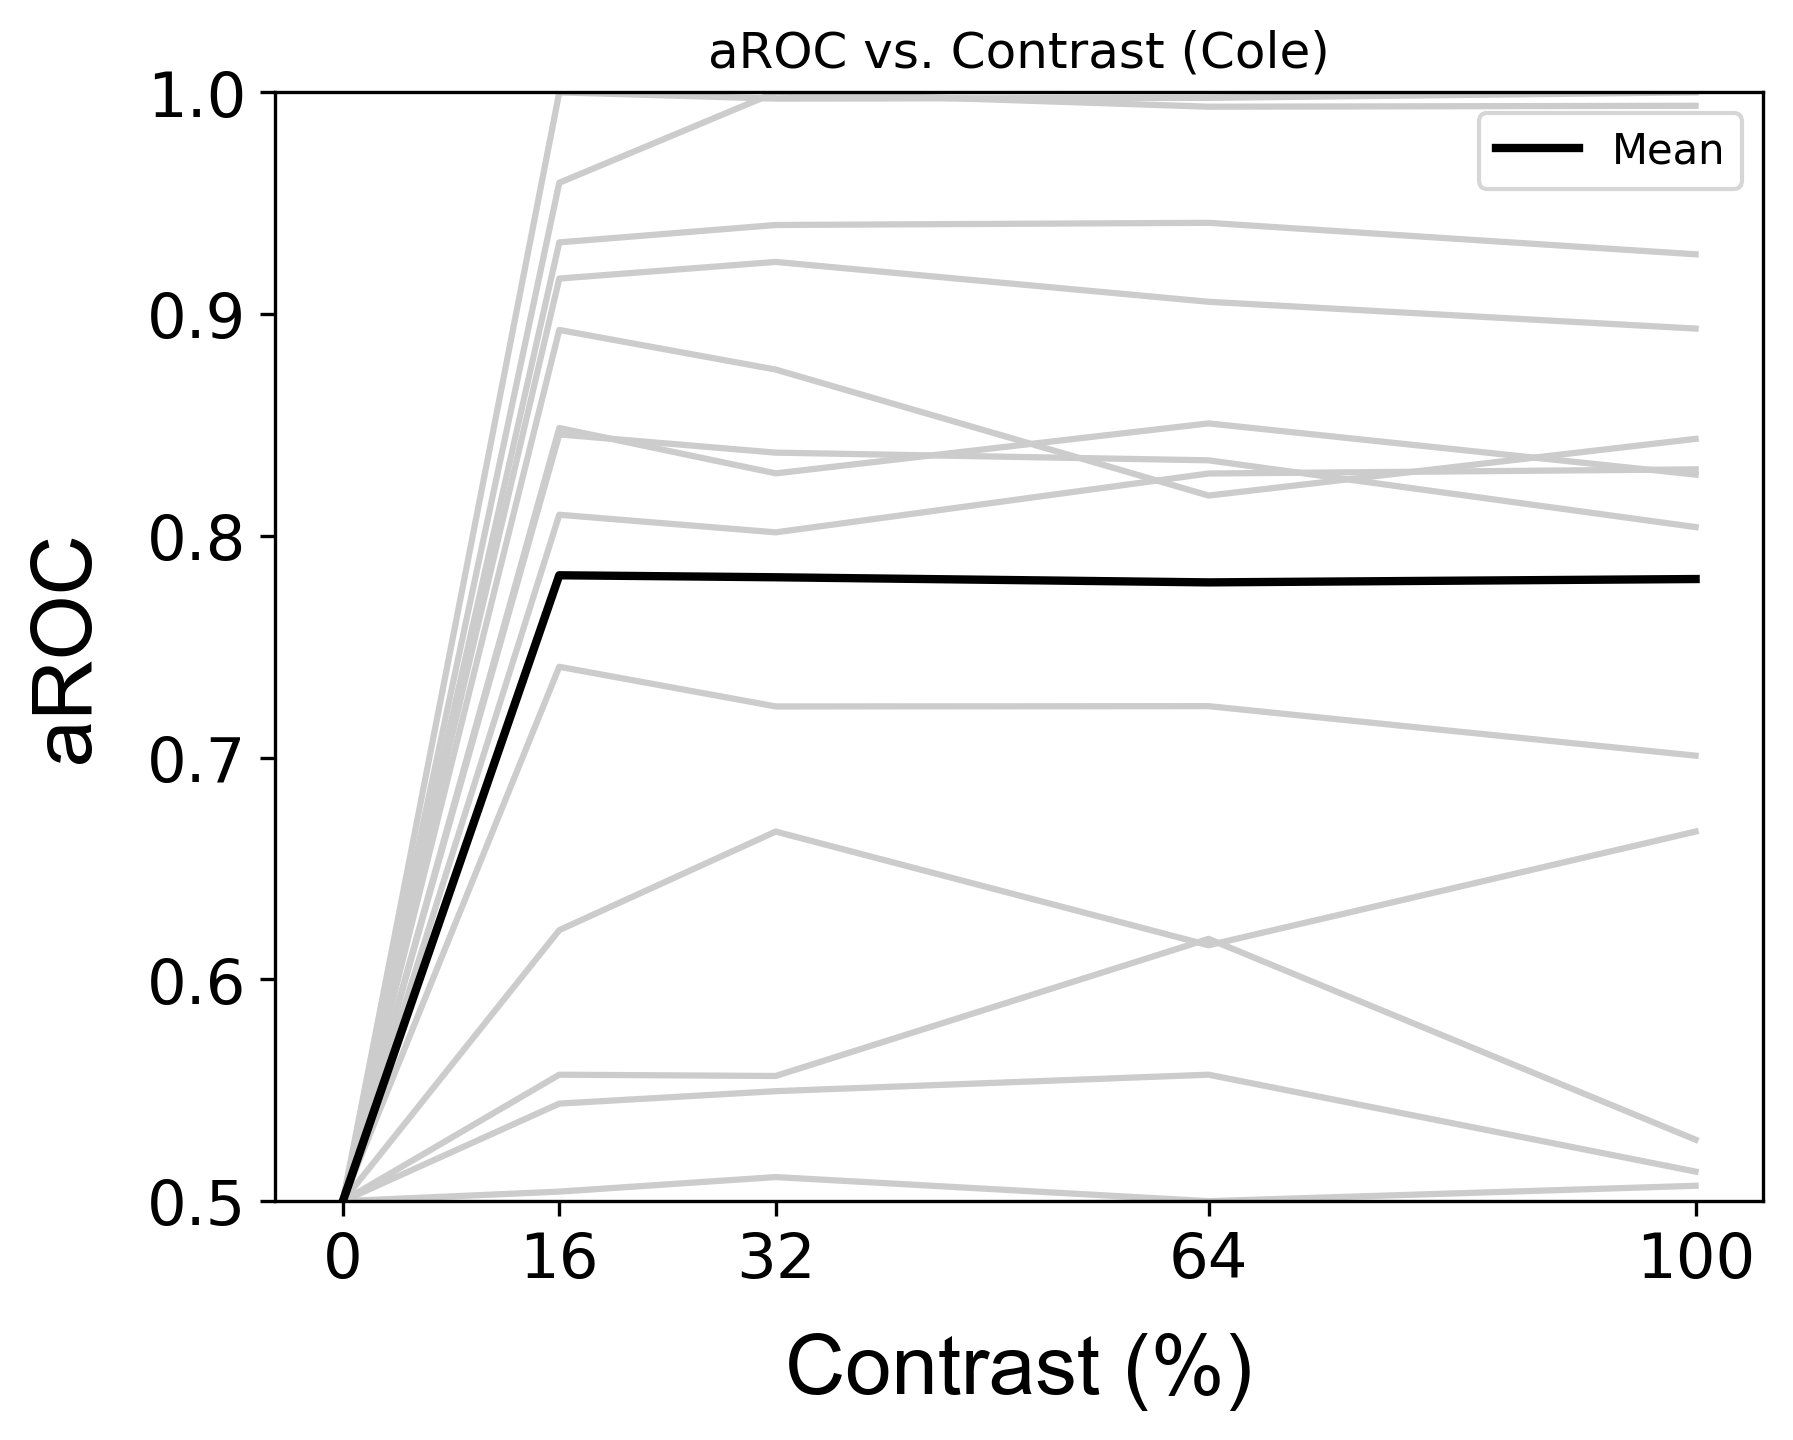

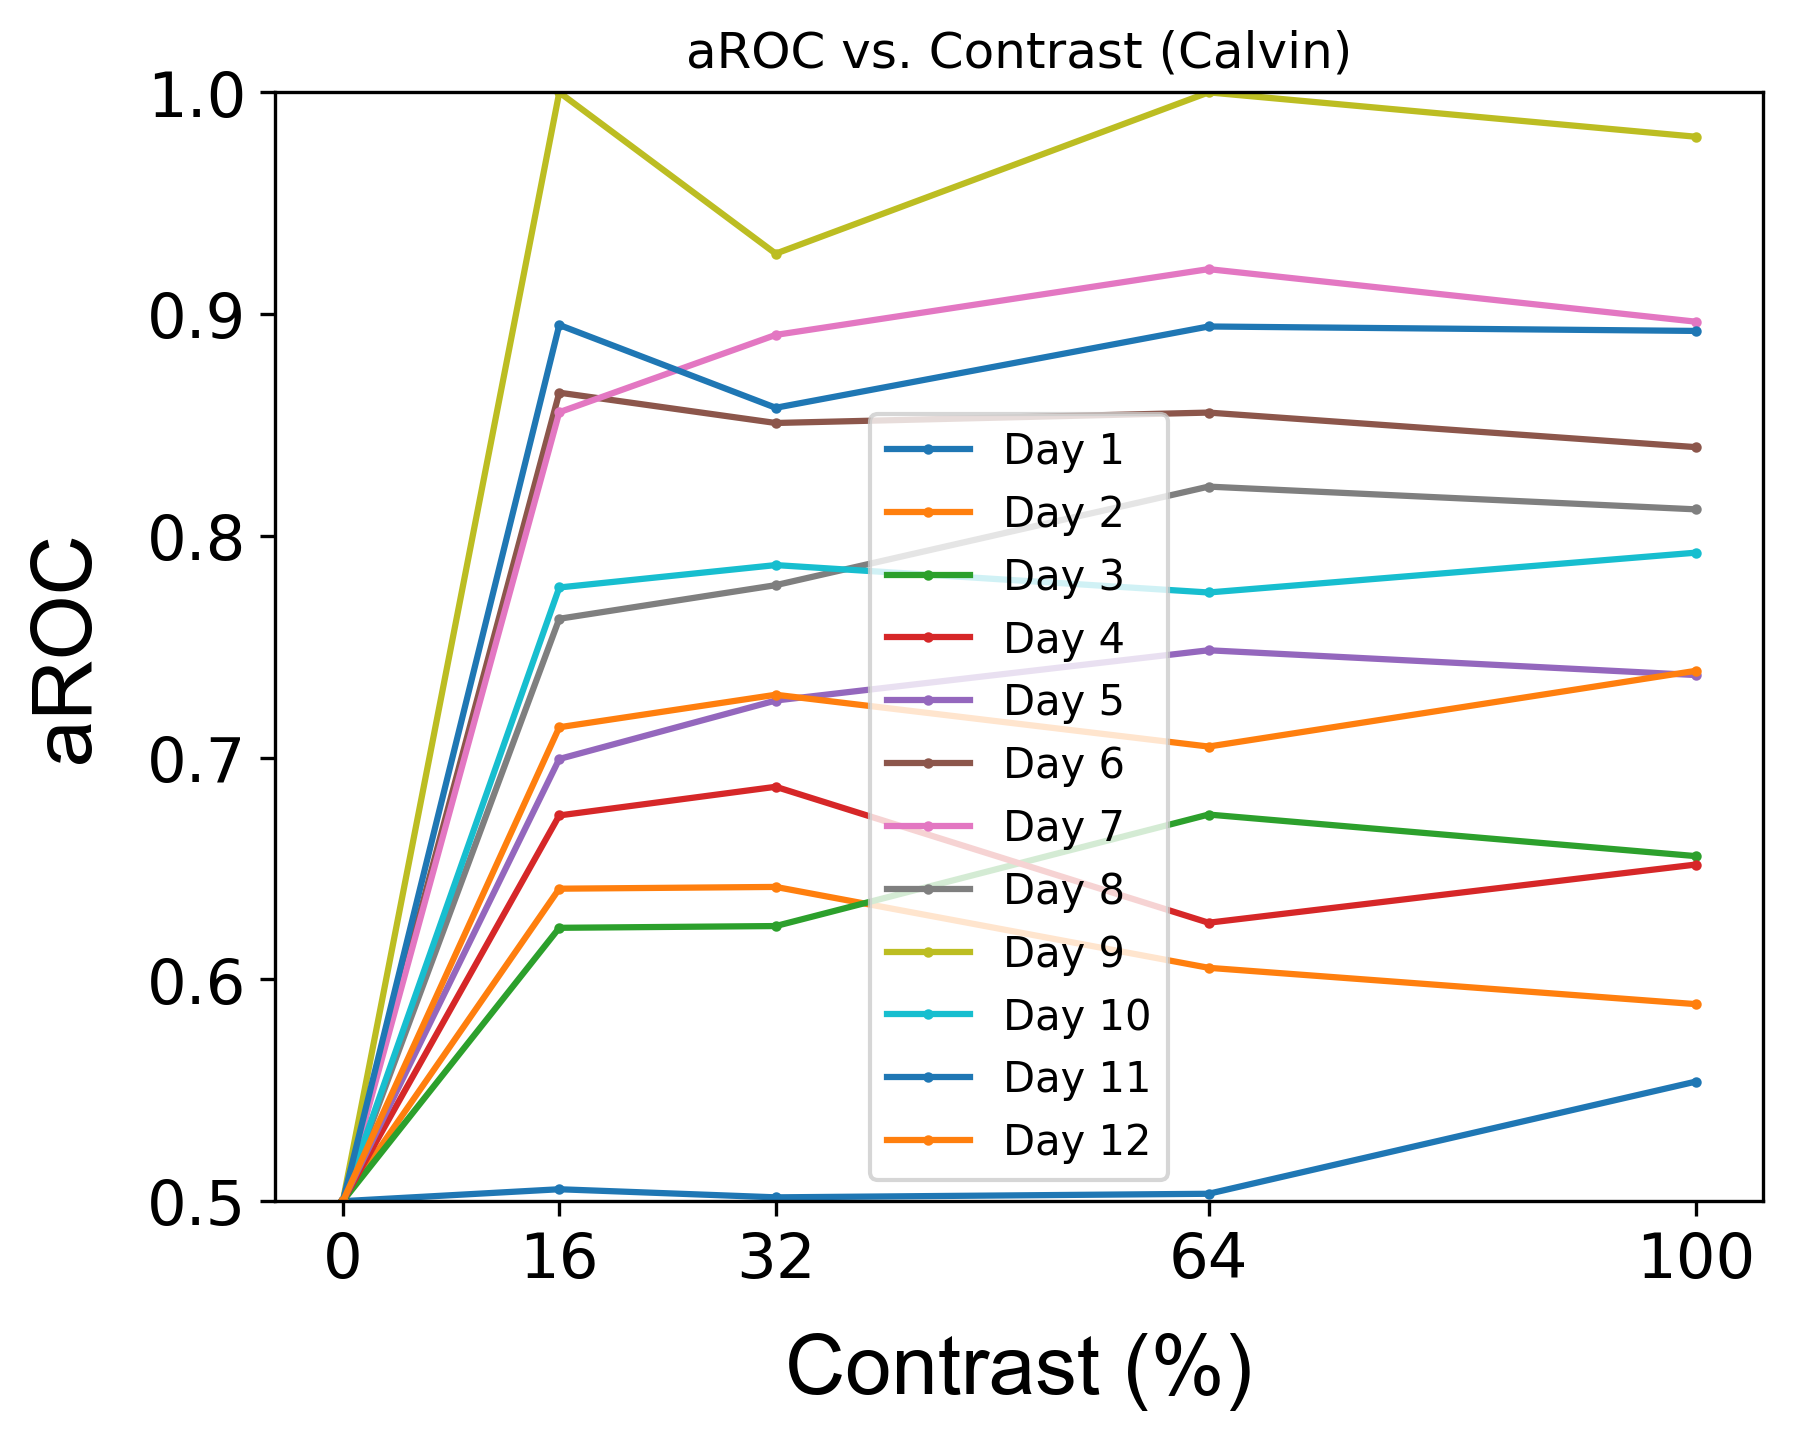

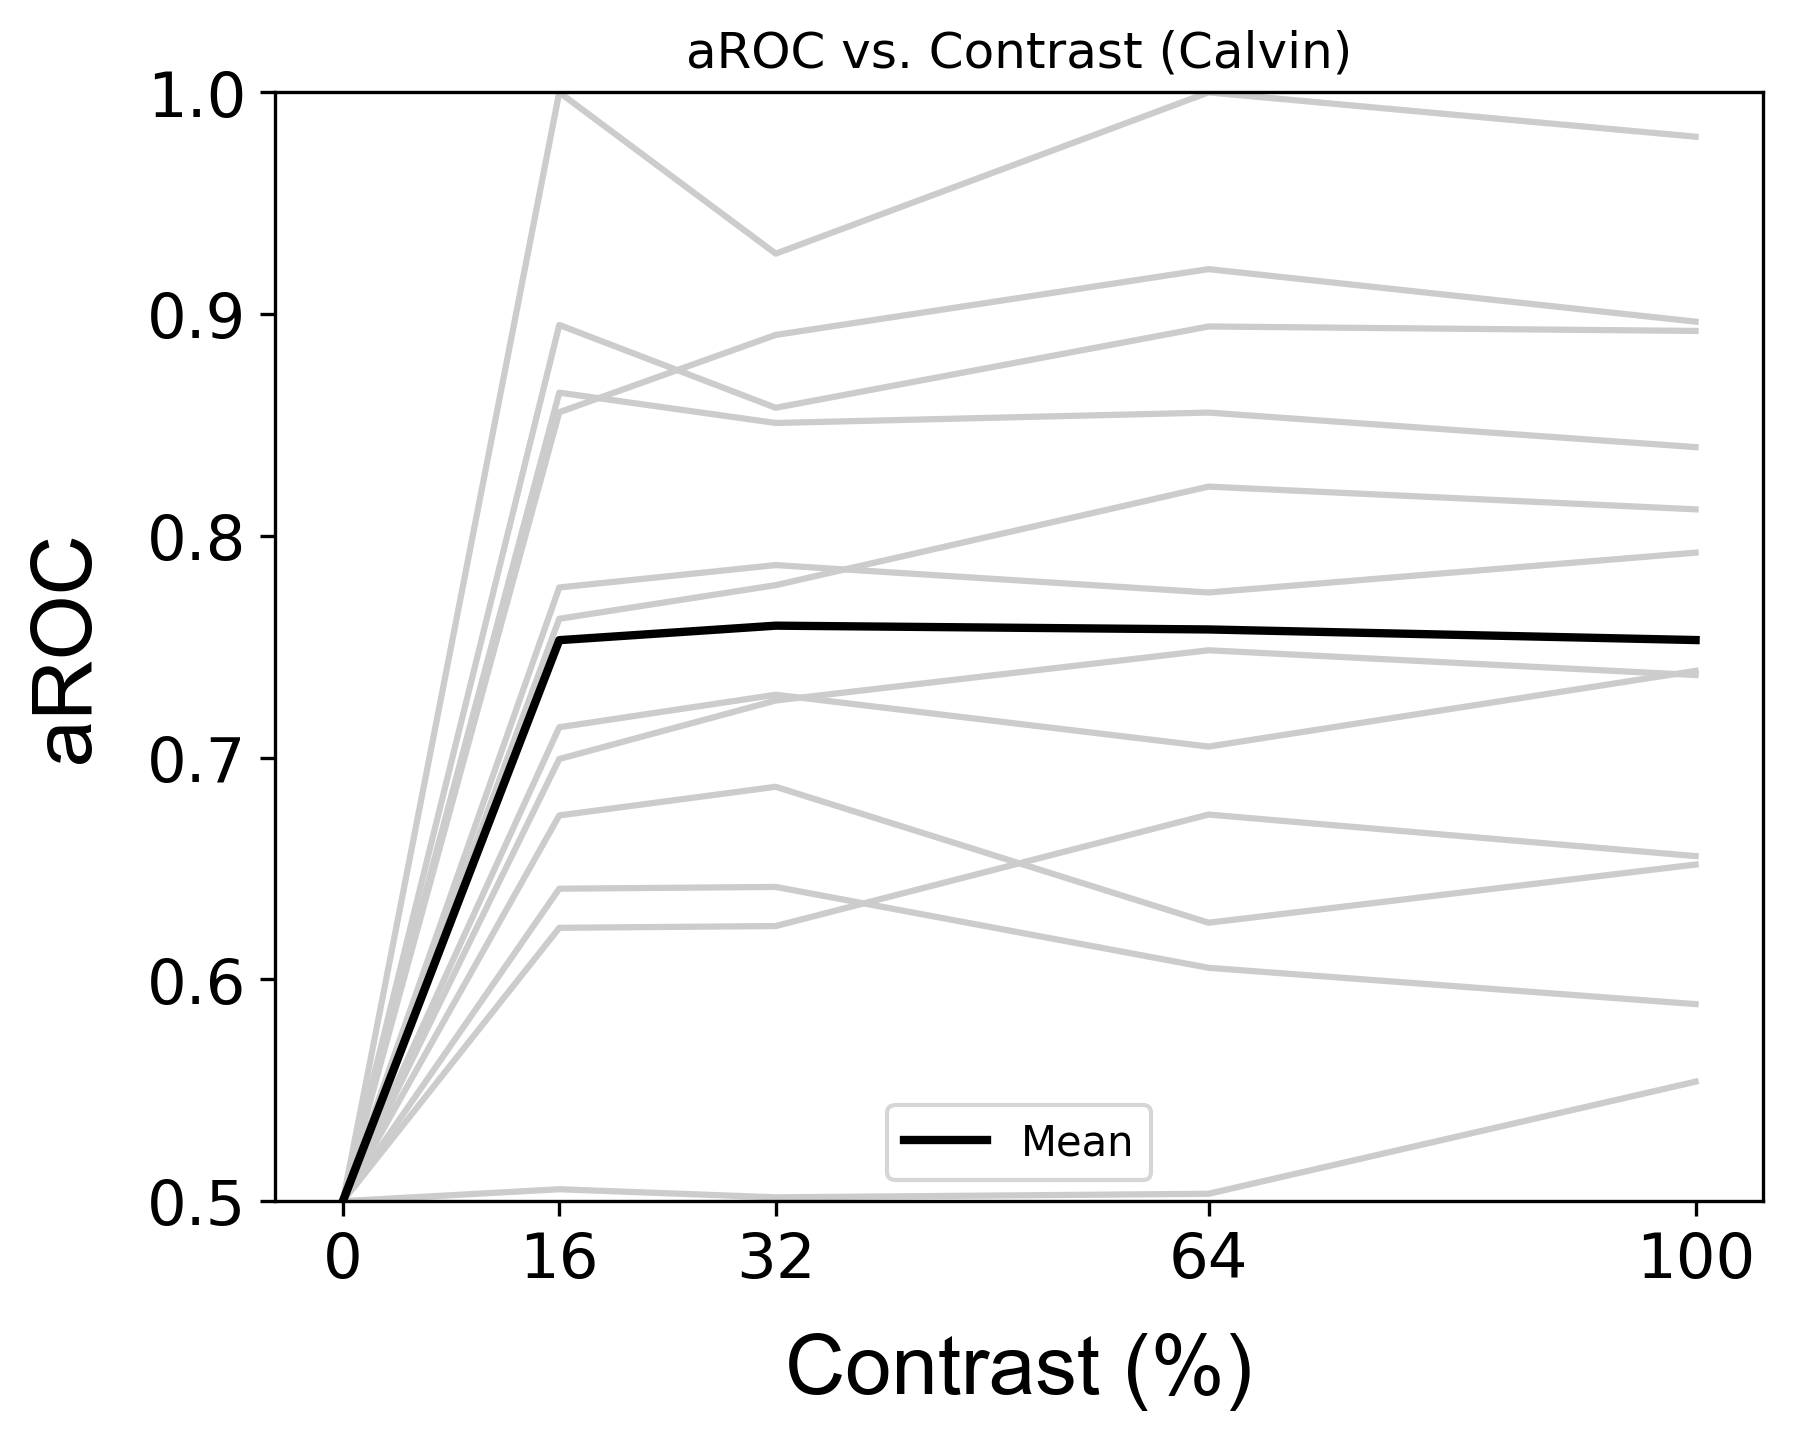

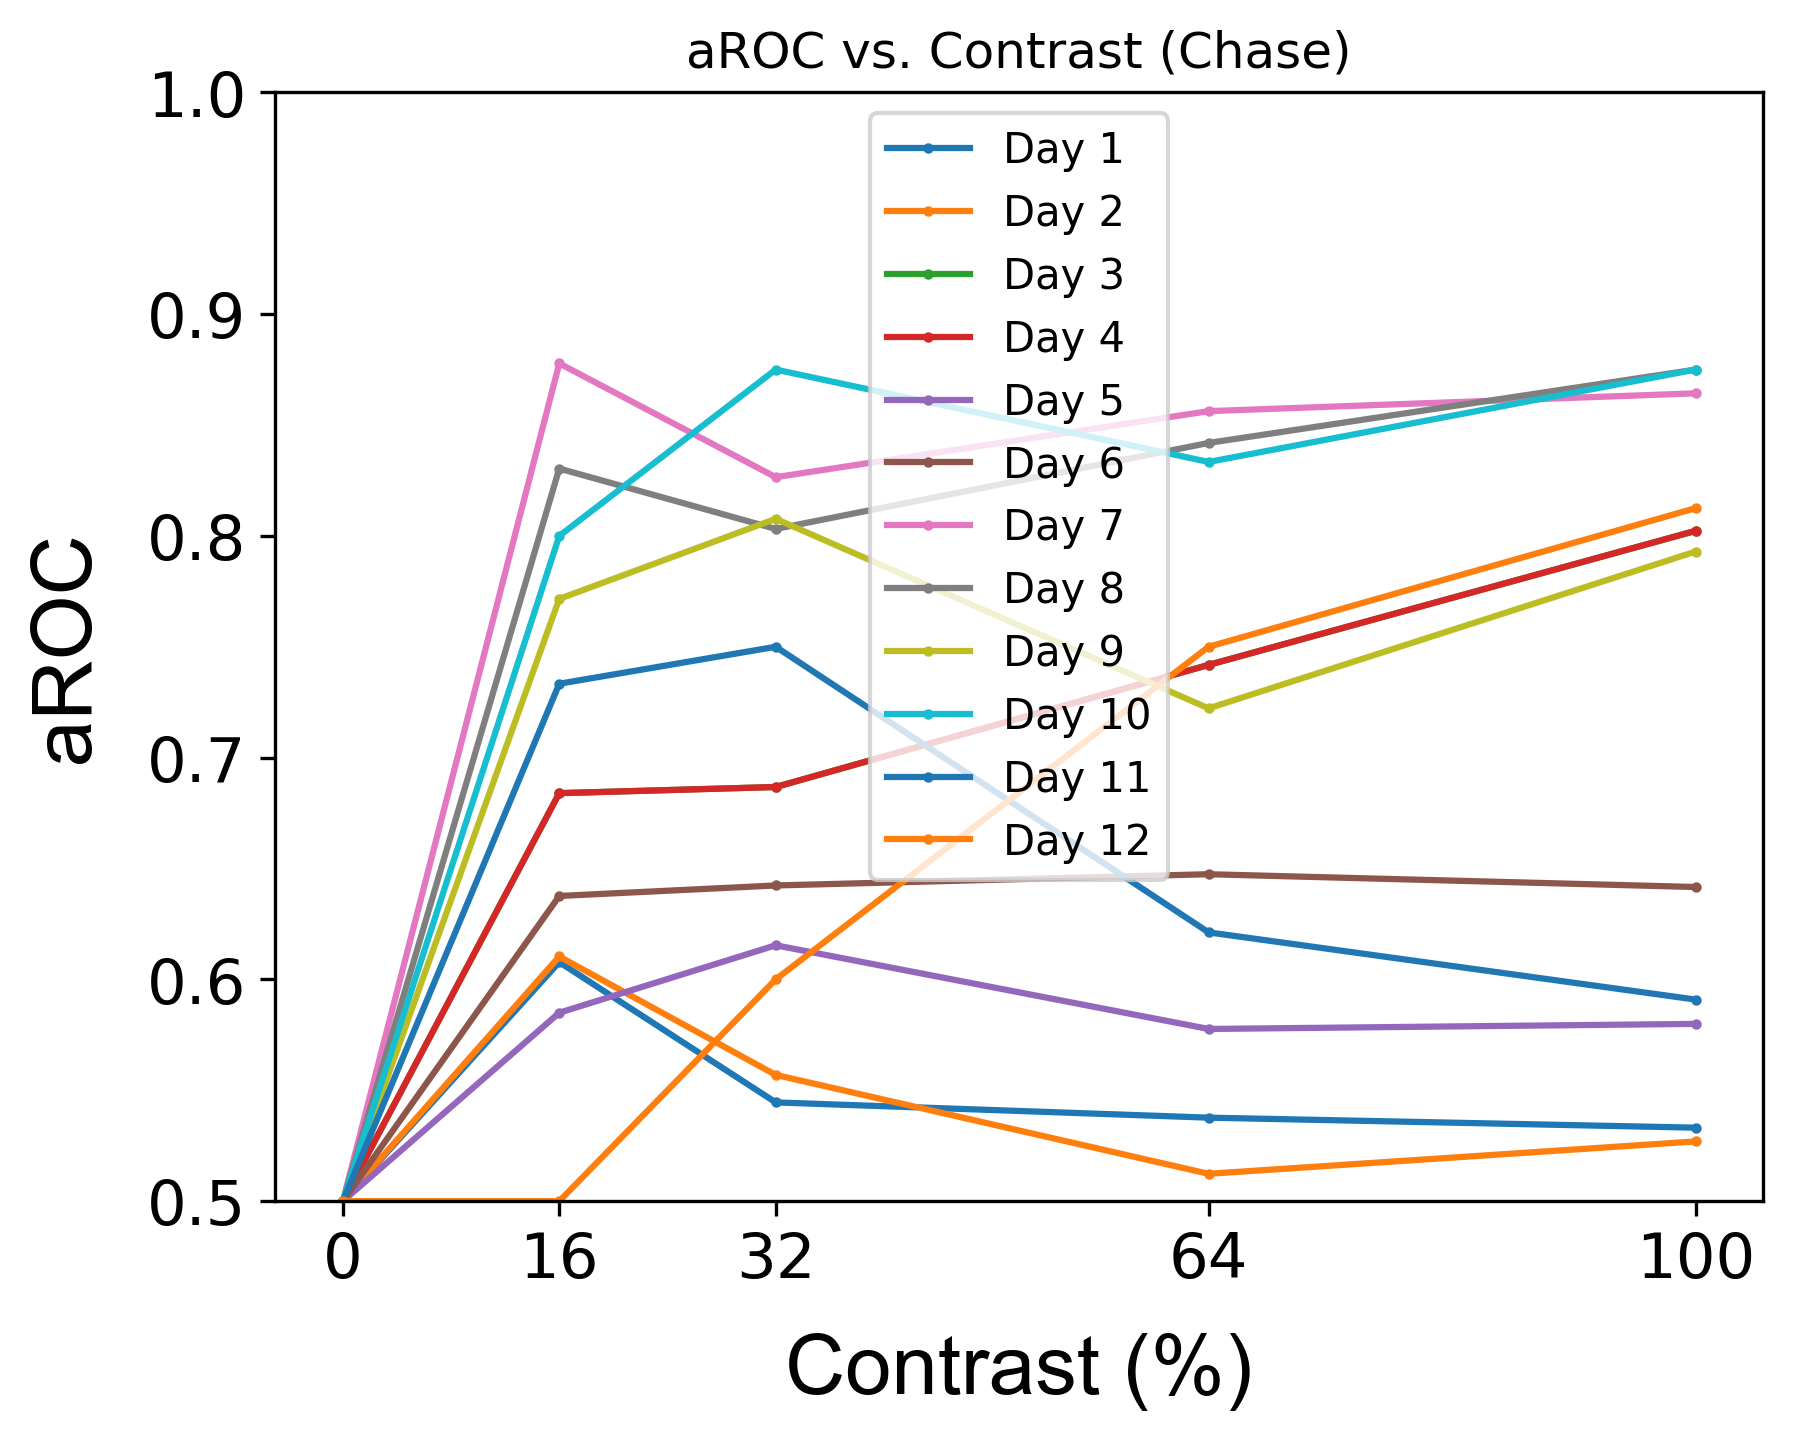

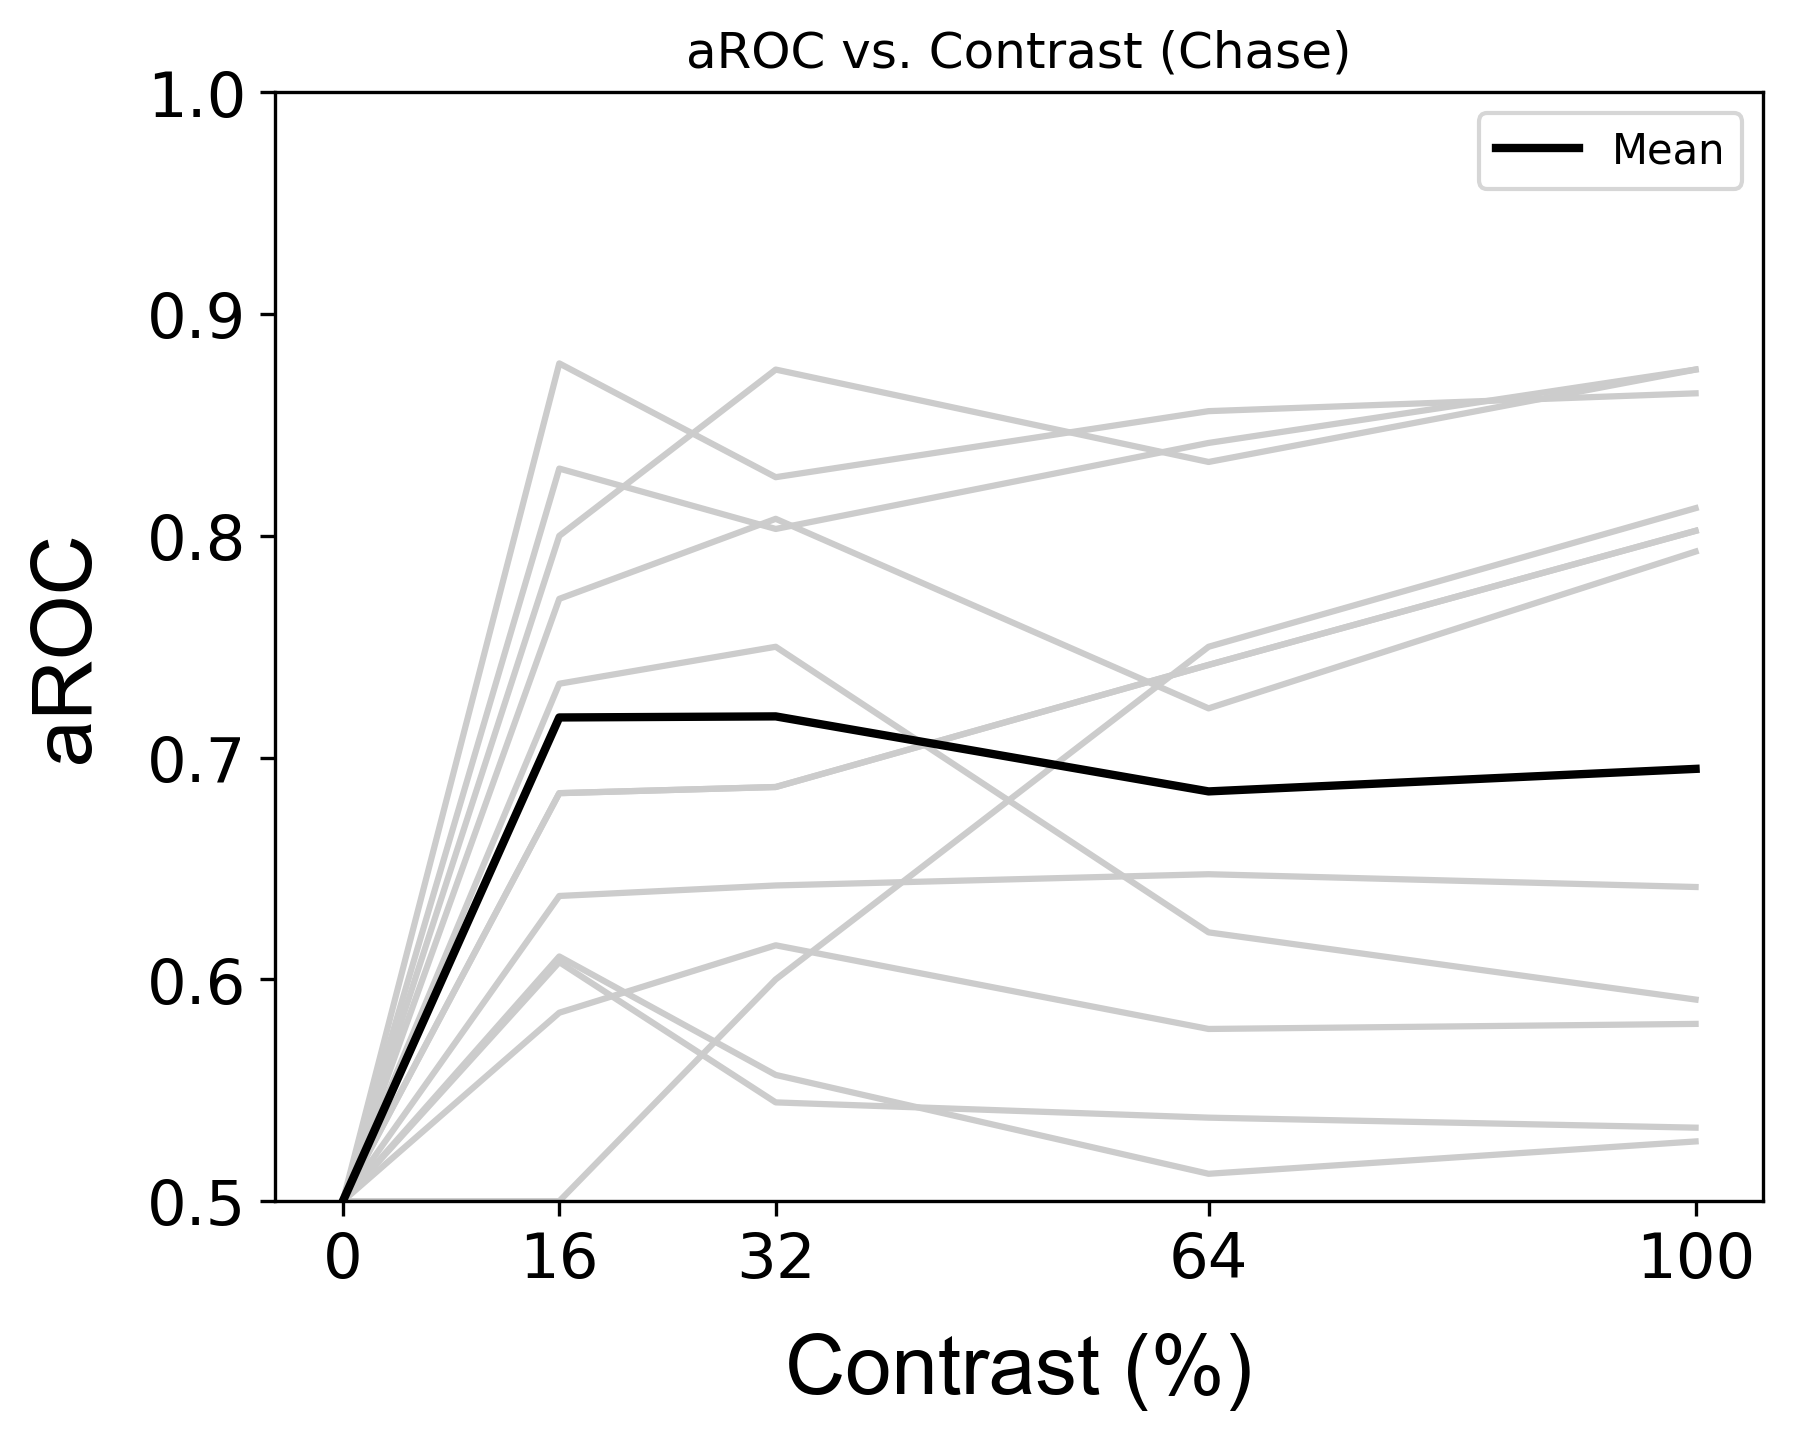

In [1]:
# aROC vs Contrast
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# names = ['Charlie', 'Conner', 'Clive', 'Cole', 'Cooper', 'Calvin', 'Chase']
names = ['Cole', 'Calvin', 'Chase']

mean_aROC_dict = {}

for name in names:
    # Directory where CSV files are located
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Trial_table'
    # directory = f'/Users/zhangpan/MasterProject/{name}/Trial_table_learned'

    # Initialize dictionaries to store contrast and aROC for each day
    contrasts_dict = {}
    aROC_dict = {}
    days=[]

    # Iterate over CSV files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            
            # Extract day number from filename
            day = int(filename.split('_')[3].replace('Day', ''))
            days.append(day)
            
            # Read CSV file
            df = pd.read_csv(file_path)

            # include the delay period before Vstim
            df['fl_latency']= df['fl_latency'] + 0.25

            # Calculate cumulative prob for blank trials (FA)
            bin_size = 0.1  # Define the bin size for fl_latency
            bins = np.arange(0, 4.45, bin_size)

            FA_df = df[(df['stim_contrast'] == 0) & (df['false_alarm'] == 1)].sort_values(by='fl_latency').reset_index(drop=True)
            # Calculate cumulative probability for FA trials
            FA_cumulative_prob = []
            for b in bins:
                count = len(FA_df[FA_df['fl_latency'] <= b])
                # Check if denominator is zero before division
                if len(FA_df) != 0:
                    prob = count / len(FA_df)
                else:
                    prob = 0
                FA_cumulative_prob.append(prob)

            FA_cumulative_prob = np.array(FA_cumulative_prob)

            # Get aROC for each contrast
            aROC = []

            # Get unique contrasts
            unique_contrasts = df['stim_contrast'].unique()
            # unique_contrasts = list(filter(lambda x: x != 0, unique_contrasts))

            for contrast in unique_contrasts:
                if contrast == 0:
                    total_area = 0.5
                else:
                    # Filter DataFrame for hit trials and FA trials
                    hit_df = df[(df['stim_contrast'] == contrast) & (df['hit'] == 1)].sort_values(by='fl_latency').reset_index(drop=True)
                    
                    # Calculate cumulative probability for hit trials
                    hit_cumulative_prob = []
                    for b in bins:
                        count = len(hit_df[hit_df['fl_latency'] <= b])
                        # Check if denominator is zero before division
                        if len(hit_df) != 0:
                            prob = count / len(hit_df)
                        else:
                            prob = 0
                        hit_cumulative_prob.append(prob)

                    hit_cumulative_prob = np.array(hit_cumulative_prob)

                    # Calculate aROC (AUC)
                    # total_area = np.trapz(hit_cumulative_prob, FA_cumulative_prob)
                    total_area = np.trapz(FA_cumulative_prob, hit_cumulative_prob)

                
                    if total_area <= 0.5:
                        total_area = 1 - total_area
                    else:
                        total_area = total_area

                aROC.append(total_area)

               
            
            # Store contrast and aROC for the day
            contrasts_dict[day] = unique_contrasts
            aROC_dict[day] = aROC

    # Plot aROC vs contrast
    fig, ax = plt.subplots(dpi=300)
    # fig.set_size_inches(8, 6)

    # Sort the keys of contrasts_dict for the legend
    sorted_days = sorted(contrasts_dict.keys())

    # Plot individual lines for each day
    for day in sorted_days:
        contrasts = contrasts_dict[day]
        aROC = aROC_dict[day]
        sorted_data = sorted(zip(contrasts, aROC), key=lambda x: x[0])
        sorted_contrasts, sorted_aROC = zip(*sorted_data)
        ax.plot(sorted_contrasts, sorted_aROC, marker='o', markersize=1.5, linestyle='-', label=f'Day {day}')   

    ax.set_title(f'aROC vs. Contrast ({name})')
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_ylabel('aROC', labelpad=10, size=20, family='Arial')
    ax.set_xlabel('Contrast (%)', labelpad=10, size=20, family='Arial')

    ax.set_ylim(0.5,1)
    # Set contrast values as x-axis ticks and labels
    ax.set_xticks(list(contrasts_dict.values())[0])  # Use contrast values from the first day
    ax.set_xticklabels([f'{val*100:.0f}' for val in list(contrasts_dict.values())[0]])  # Convert to percentage

    ax.legend()


    # Plot with mean

    fig, ax = plt.subplots(dpi=300)
    # fig.set_size_inches(8, 6)

    # Sort the keys of contrasts_dict for the legend
    sorted_days = sorted(contrasts_dict.keys())

    # Plot individual lines for each day (light color)
    for day in sorted_days:
        contrasts = contrasts_dict[day]
        aROC = aROC_dict[day]
        sorted_data = sorted(zip(contrasts, aROC), key=lambda x: x[0])
        sorted_contrasts, sorted_aROC = zip(*sorted_data)
        color = (0.8, 0.8, 0.8)
        ax.plot(sorted_contrasts, sorted_aROC, linestyle='-', color=color)   

    # Plot black mean line
    mean_contrasts = pd.concat([pd.Series(contrasts) for contrasts in contrasts_dict.values()]).unique()
    mean_aROC = pd.concat([pd.Series(aROC) for aROC in aROC_dict.values()]).groupby(level=0).mean()
    sorted_mean_data = sorted(zip(mean_contrasts, mean_aROC), key=lambda x: x[0])
    sorted_mean_contrasts, sorted_mean_aROC = zip(*sorted_mean_data)
    ax.plot(sorted_mean_contrasts, sorted_mean_aROC, color='black', linewidth=2, linestyle='-', label='Mean')

    ax.set_ylim(0.5, 1)
    ax.set_title(f'aROC vs. Contrast ({name})')
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_ylabel('aROC', labelpad=10, size=20, family='Arial')
    ax.set_xlabel('Contrast (%)', labelpad=10, size=20, family='Arial')

    # Set contrast values as x-axis ticks and labels
    ax.set_xticks(list(contrasts_dict.values())[0])  # Use contrast values from the first day
    ax.set_xticklabels([f'{val*100:.0f}' for val in list(contrasts_dict.values())[0]])  # Convert to percentage

    ax.legend()

    mean_aROC_dict[name] = [sorted_mean_contrasts, sorted_mean_aROC]


print(mean_aROC_dict)



# Group aROC vs contrast (n=7)

mean_aROC is [0.5        0.75111385 0.75315194 0.74053894 0.74283851]
sem_aROC is [0.         0.01513219 0.01501349 0.02330806 0.02060131]


Text(0.05, 0.95, 'n = 7')

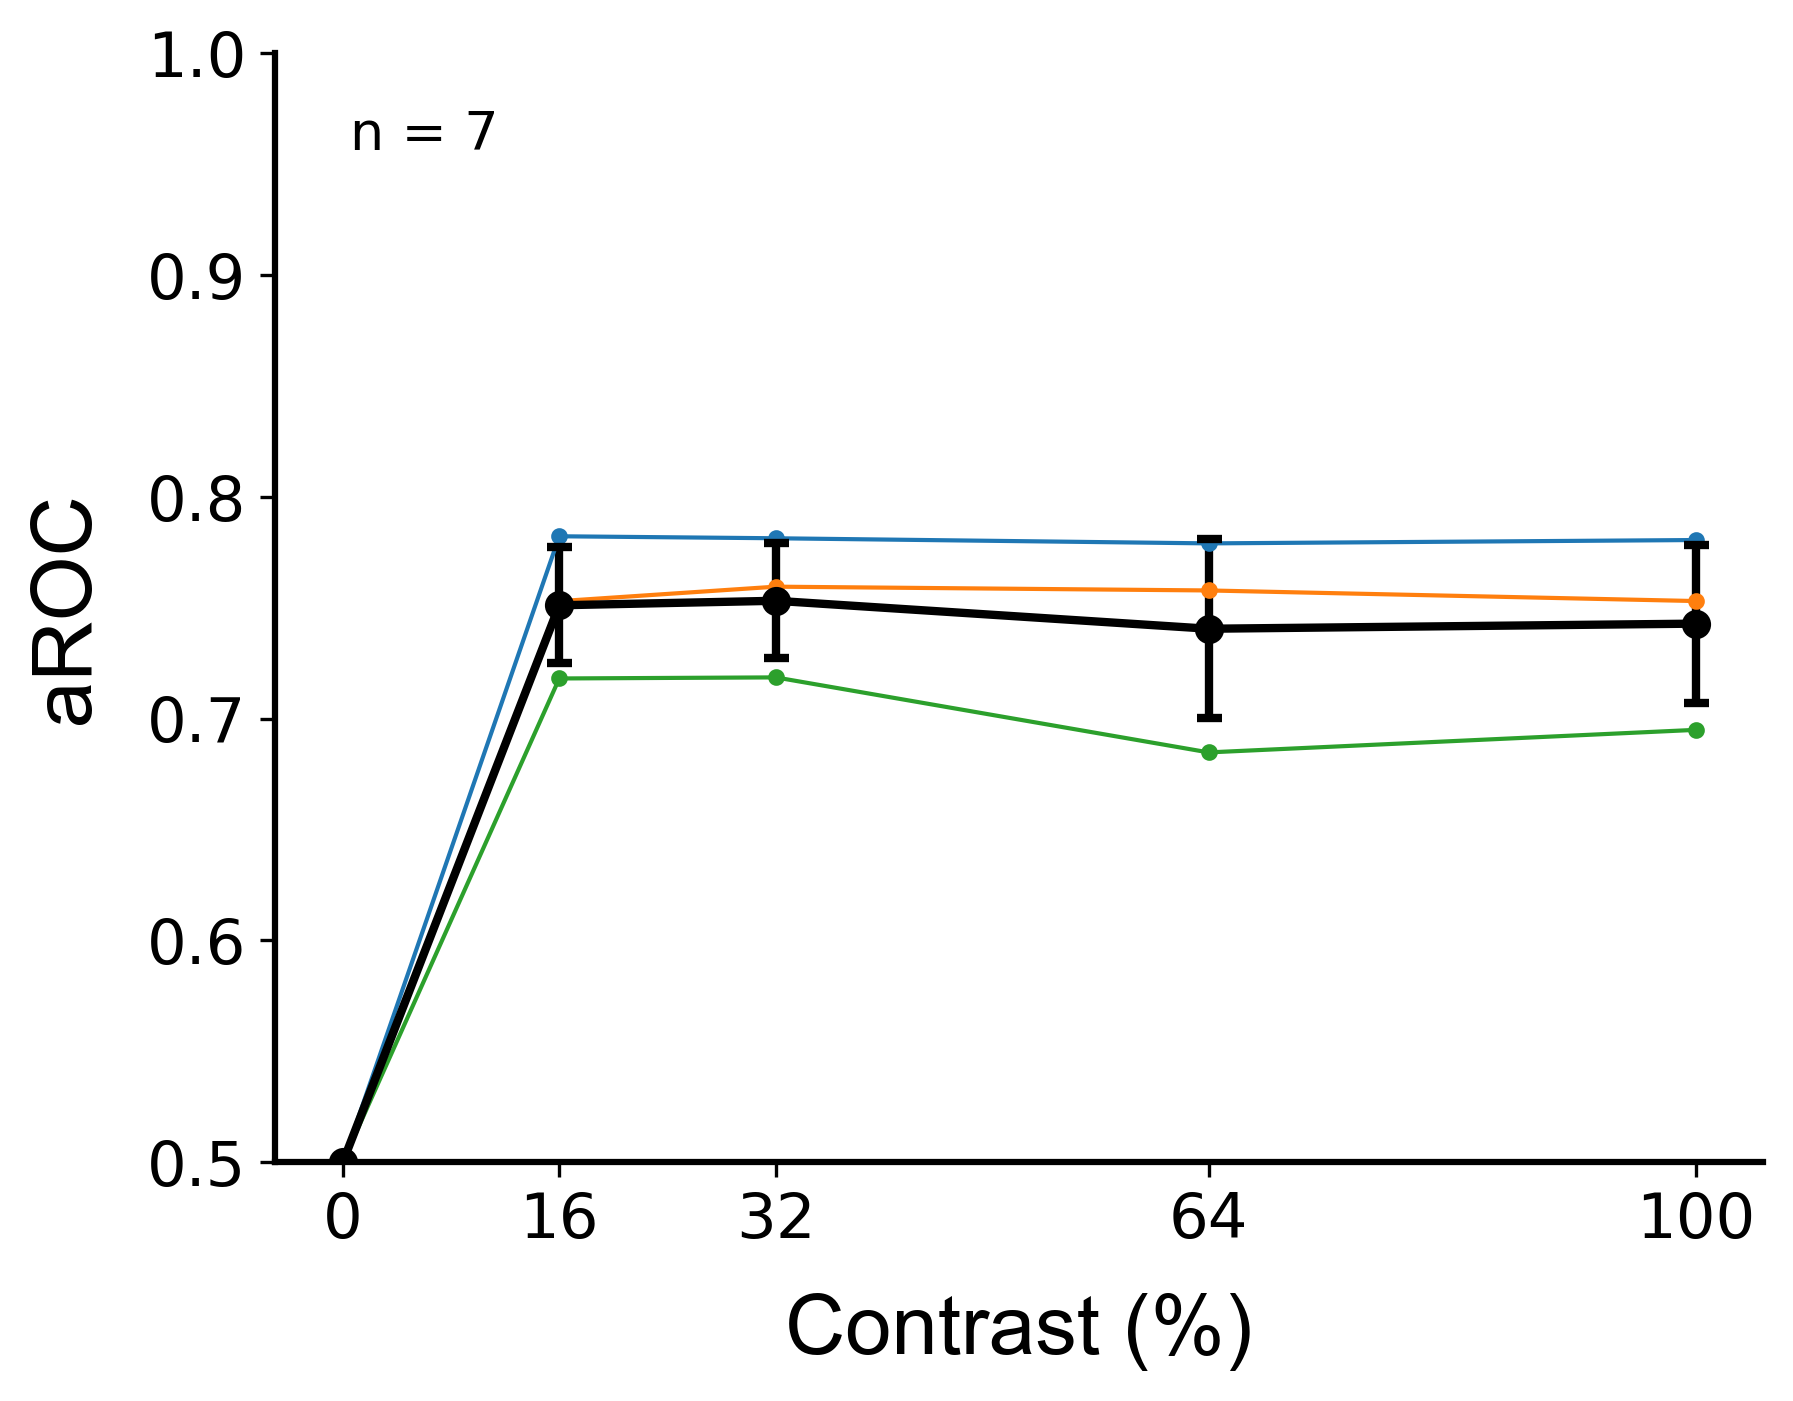

In [4]:
# Plot the overall aROC across mice
fig, ax = plt.subplots(dpi=300)
# fig.set_size_inches(6,6)

for name, (contrast, aROC) in mean_aROC_dict.items():

    ax.plot(contrast, aROC, linewidth=1, linestyle='-', marker='o', markersize=3, label=name)

# Calculate mean and standard deviation
mean_contrast = np.mean([values[0] for values in mean_aROC_dict.values()], axis=0)
mean_aROC = np.mean([values[1] for values in mean_aROC_dict.values()], axis=0)
std_aROC = np.std([values[1] for values in mean_aROC_dict.values()], axis=0)

sem_aROC = std_aROC / np.sqrt(3)

print(f'mean_aROC is {mean_aROC}')
print(f'sem_aROC is {sem_aROC}')
# Plot mean line
ax.plot(mean_contrast, mean_aROC, linewidth=2, linestyle='-', color='black', label='Mean aROC')

# Plot error bars
ax.errorbar(mean_contrast, mean_aROC, yerr=std_aROC, fmt='o', color='black', capsize=3, capthick=2, elinewidth=2)

ax.set_ylim(0.5,1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_title('Mean aROC vs. Contrast')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Set contrast values as x-axis ticks and labels
ax.set_xticks(list(contrasts_dict.values())[0])  # Use contrast values from the first day
ax.set_xticklabels([f'{val*100:.0f}' for val in list(contrasts_dict.values())[0]])  # Convert to percentage

ax.set_ylabel('aROC', labelpad=10, size=20, family='Arial')
ax.set_xlabel('Contrast (%)', labelpad=10, size=20, family='Arial')
# ax.legend()

ax.text(0.05, 0.95, f'n = 7', fontsize=13, ha='left', va='top', transform=ax.transAxes)


# (demo) Probability of lick vs contrast

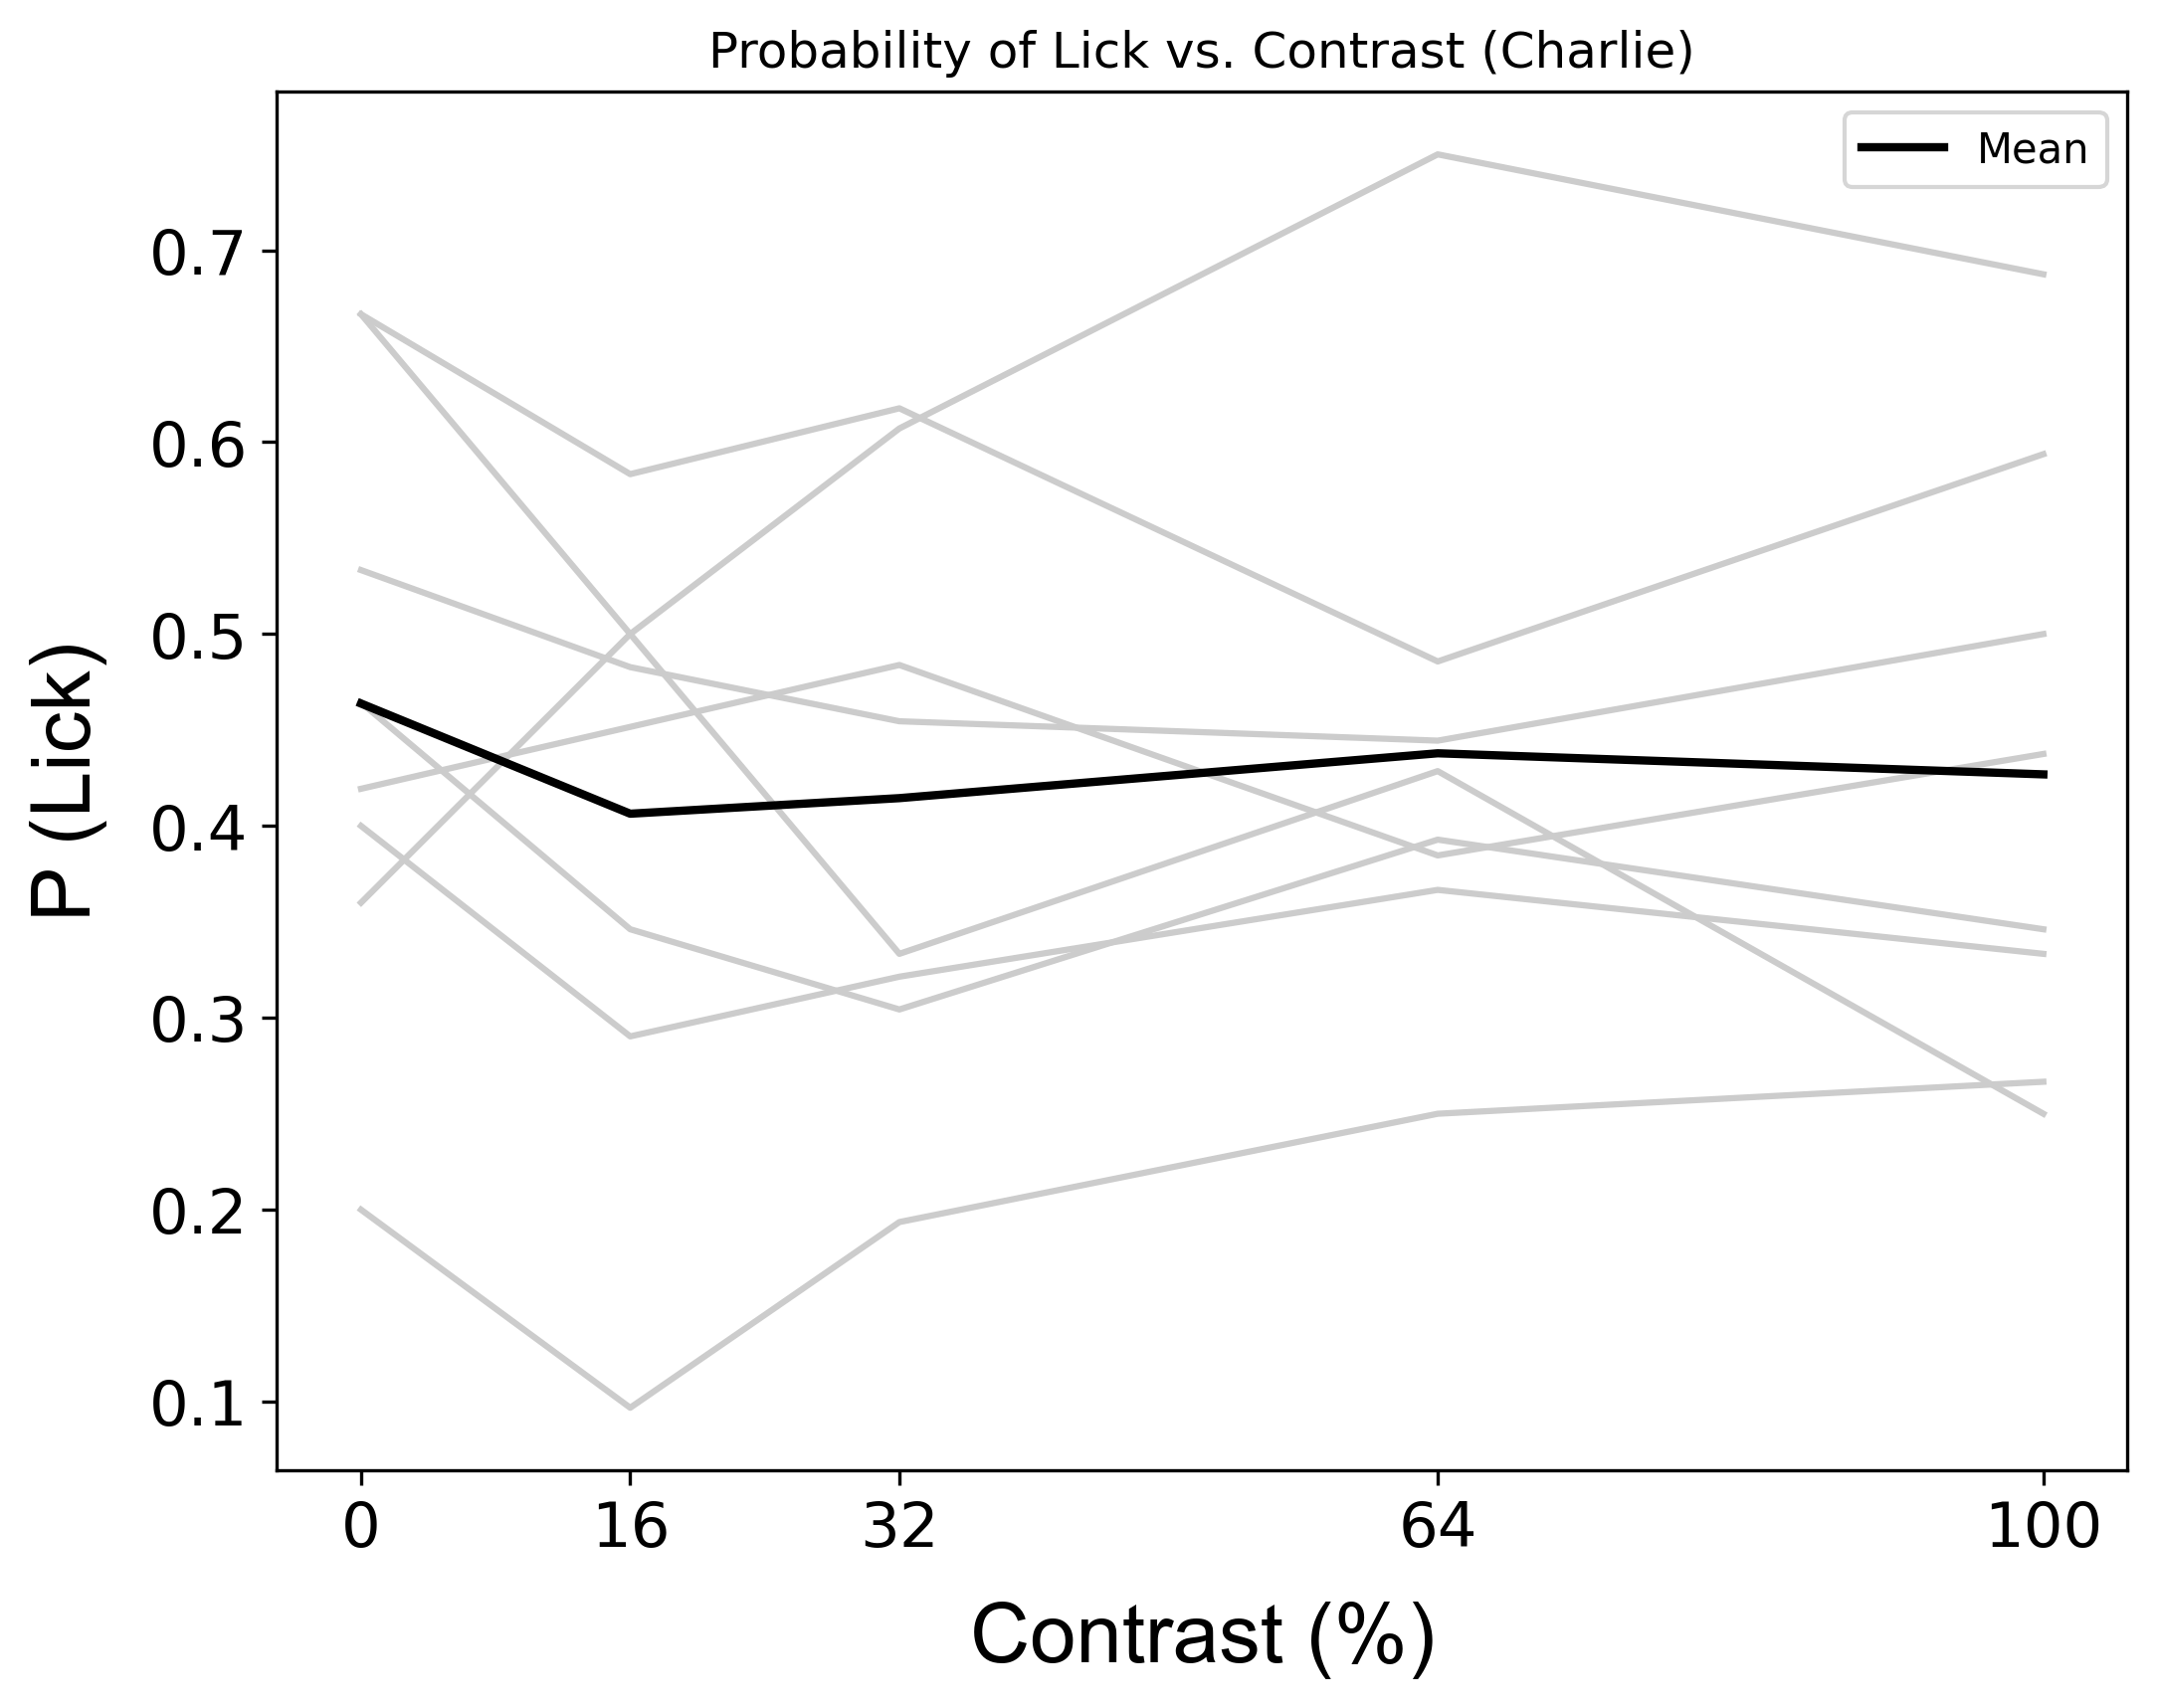

In [48]:
# Probability of licking (wrong!) vs contrast - maybe show motivated to lick?
# Directory where CSV files are located
directory = '/Users/zhangpan/MasterProject/Charlie/Trial_table'

# Initialize dictionaries to store contrast and probability of licking for each day
contrasts_dict = {}
prob_lick_dict = {}

# Iterate over CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        
        # Extract day number from filename
        day = int(filename.split('_')[2].replace('Day', ''))
        
        # Read CSV file
        df = pd.read_csv(file_path)
        
        # Calculate probability of licking for each contrast
        prob_lick = df.groupby('stim_contrast')['fl_latency'].apply(lambda x: (~x.isnull()).mean())
        
        # Store contrast and probability of licking for the day
        contrasts_dict[day] = prob_lick.index
        prob_lick_dict[day] = prob_lick.values

# Plotting
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(8, 6)

# Sort the keys of contrasts_dict for the legend
sorted_days = sorted(contrasts_dict.keys())

# # Plot individual lines for each day
# for day in sorted_days:
#     contrasts = contrasts_dict[day]
#     prob_lick = prob_lick_dict[day]
#     ax.plot(contrasts, prob_lick,  marker='o', linestyle='-', label=f'Day {day}')  

# With Mean plot

# Plot individual lines for each day
for day in sorted_days:
    contrasts = contrasts_dict[day]
    prob_lick = prob_lick_dict[day]
    color = (0.8, 0.8, 0.8)
    ax.plot(contrasts, prob_lick, color = color, linestyle='-')  # Lighter lines

# Plot black mean line
mean_contrasts = pd.concat([pd.Series(contrasts) for contrasts in contrasts_dict.values()]).unique()
mean_prob_lick = pd.concat([pd.Series(prob_lick) for prob_lick in prob_lick_dict.values()]).groupby(level=0).mean()
ax.plot(mean_contrasts, mean_prob_lick, color='black', linewidth=2, linestyle='-', label='Mean')  # Black mean line

ax.set_title('Probability of Lick vs. Contrast (Charlie)')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylabel('P (Lick)', labelpad=10, size=20, family='Arial')
ax.set_xlabel('Contrast (%)', labelpad=10, size=20, family='Arial')

# Set contrast values as x-axis ticks and labels
ax.set_xticks(list(contrasts_dict.values())[0])  # Use contrast values from the first day
ax.set_xticklabels([f'{val*100:.0f}' for val in list(contrasts_dict.values())[0]])  # Convert to percentage

ax.legend()
